In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
# calling biomarkers
bloodbiomk1_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk1_20231117.csv"
bloodbiomk1 = pd.read_csv(bloodbiomk1_file_path)
bloodbiomk1 = pd.DataFrame(bloodbiomk1)

bloodbiomk2_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk2_20231117.csv"
bloodbiomk2 = pd.read_csv(bloodbiomk2_file_path)
bloodbiomk2 = pd.DataFrame(bloodbiomk2)

csfbiomk1_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\csfbiomk1_20231117.csv"
csfbiomk1 = pd.read_csv(csfbiomk1_file_path)
csfbiomk1 = pd.DataFrame(csfbiomk1)

csfbiomk2_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\csfbiomk2_20231117.csv"
csfbiomk2 = pd.read_csv(csfbiomk2_file_path)
csfbiomk2 = pd.DataFrame(csfbiomk2)

csfbiomk3_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\csfbiomk3_20231117.csv"
csfbiomk3 = pd.read_csv(csfbiomk3_file_path)
csfbiomk3 = pd.DataFrame(csfbiomk3)


In [3]:
# Check for null values in each column
bloodbiomk2_nulls = bloodbiomk2.isnull().sum()

bloodbiomk2_nulls_df = pd.DataFrame({
    'Column': bloodbiomk2_nulls.index,
    'Number of Nulls': bloodbiomk2_nulls.values
})

bloodbiomk2_nulls_df_transposed = bloodbiomk2_nulls_df.T
bloodbiomk2_nulls_df_sorted = bloodbiomk2_nulls_df.sort_values(by='Number of Nulls', ascending=False)

print("Null values in bloodbiomk2 (sorted):")
print(bloodbiomk2_nulls_df_sorted)

# print("Null values in bloodbiomk2:")
# print(bloodbiomk2_nulls_df)
# bloodbiomk2_nulls_df_transposed.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk2_nulls.csv", index=False)
bloodbiomk2_nulls_df_sorted.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk2_nulls_sorted.csv", index=False)


Null values in bloodbiomk2 (sorted):
              Column  Number of Nulls
14              Qalb               60
15             s_alb               60
12       chiiseas_pg               56
7         totyr_foot               56
8        chiiseas_pf               56
..               ...              ...
3        exposurebin                0
1              visit                0
5   racecat_combined                0
6           eduyears                0
0         subject_id                0

[132 rows x 2 columns]


In [4]:
# Finding nulls and group them based on their labels
null_counts = bloodbiomk2.isnull()

null_counts['checkin_bin'] = bloodbiomk2['checkin_bin']

nulls_by_label = null_counts.groupby('checkin_bin').sum()

nulls_by_label = nulls_by_label.rename(columns=lambda x: f'Nulls in {x}')

print("Number of nulls by label:")
print(nulls_by_label)

nulls_by_label.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk2_nulls_by_label.csv")


Number of nulls by label:
             Nulls in subject_id  Nulls in visit  Nulls in exposurebin  \
checkin_bin                                                              
1                              0               0                     0   
2                              0               0                     0   
3                              0               0                     0   

             Nulls in age_decade  Nulls in racecat_combined  \
checkin_bin                                                   
1                              0                          0   
2                              0                          0   
3                              0                          0   

             Nulls in eduyears  Nulls in totyr_foot  Nulls in chiiseas_pf  \
checkin_bin                                                                 
1                            0                    0                     0   
2                            0                    0     

In [5]:
# Calculate the mean for each column, ignoring NaNs
# Replace nulls with label means

for column in bloodbiomk2.columns:
    if column != 'checkin_bin':  # Skip the label column

        averages = bloodbiomk2.groupby('checkin_bin')[column].mean()
        
        # Replace nulls for each label separately
        for label in averages.index:
            bloodbiomk2.loc[(bloodbiomk2['checkin_bin'] == label) & (bloodbiomk2[column].isnull()), column] = averages[label]

print(bloodbiomk2.head())


   subject_id  visit  checkin_bin  exposurebin  age_decade  racecat_combined  \
0      1001.0      1            2            1         1.0               5.0   
1      1002.0      1            2            1         1.0               5.0   
2      1003.0      1            2            1         1.0               5.0   
3      1004.0      1            1            1         2.0               5.0   
4      1005.0      1            3            0         2.0               5.0   

   eduyears  totyr_foot  chiiseas_pf  chiiyrs_pf  ...  p_IL_7_cv  p_IL_7  \
0      16.0         7.0       4335.4      2167.7  ...      3.060    3.06   
1      15.0        14.0      10363.1      5708.1  ...      2.440   12.30   
2      18.0        12.0       6685.4      4863.9  ...      3.960    1.87   
3      16.0        16.0       7701.2      6448.9  ...      5.940    9.81   
4      21.0         NaN          NaN         NaN  ...      0.428    8.12   

   p_TNF_beta_cv  p_TNF_beta  p_VEGF_A_cv  p_VEGF_A  p_asyn_cv

In [6]:
bloodbiomk2.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk2_nullreplaced.csv")


In [7]:
bloodbiomk2 = bloodbiomk2.drop(columns=bloodbiomk2.loc[:,'subject_id':'chiiyrs_pg'].columns)
# bloodbiomk2 = bloodbiomk2.drop(columns='p_PDGFRbeta_FLAG_other') # This is not for this dataset unless you find a column where there are too many nulls

bloodbiomk2.head()

Qalb     s_alb  p_IL_17A_F_cv  p_IL_17A_F  p_IL_17B_cv  p_IL_17B  \
0  7.852013  3.912500           5.43       2.190         1.63      1.18   
1  6.994813  3.556088           6.84       3.460         4.52      2.30   
2  6.994813  3.556088           2.49       0.126         2.63      2.30   
3  7.867197  3.414635           1.05       8.280         5.71      2.95   
4  7.429948  3.378848          18.90       1.180         2.58      1.16   

   p_IL_17C_cv  p_IL_17C  p_IL_17D_cv  p_IL_17D  ...  p_IL_7_cv  p_IL_7  \
0         7.39      1.59        14.40     28.40  ...      3.060    3.06   
1         3.30      2.23         8.79     34.30  ...      2.440   12.30   
2         7.44     17.50        27.00      9.01  ...      3.960    1.87   
3         9.27      1.94         6.47     35.30  ...      5.940    9.81   
4         3.81      6.84        26.20     26.10  ...      0.428    8.12   

   p_TNF_beta_cv  p_TNF_beta  p_VEGF_A_cv  p_VEGF_A  p_asyn_cv    p_asyn  \
0          6.040      0.1210        0.943      16.6       0.51  178000.0   
1          0.331      0.2850        2.640      55.8      12.60  170000.0   
2         15.400      0.8180        5.680      25.3       0.14   79500.0   
3          1.860      0.0472        0.192      62.5       5.33  117000.0   
4          0.306      0.1560        5.370      99.2       4.54  101000.0   

        p_Hb  dxcte_asyn_p_flag_dv  
0   37538.80                   0.0  
1   26355.70                   0.0  
2  148871.00                   0.0  
3   20893.80                   0.0  
4    8102.65                   0.0  

[5 rows x 118 columns]

In [8]:
# # This part is for those cases where the values are not meaningful (all of them are 1 or 0 or null vallues)
# bloodbiomk2 = bloodbiomk2.drop(columns=['p_Ab40_FLAG_below_ref_range',
#                               'p_Ab42_FLAG_below_ref_range',
#                               'p_GFAP_FLAG_below_ref_range', 
#                               'p_NfL_FLAG_below_ref_range',
#                               'dxcte_totaltau_plasma_flag_dv'])
# bloodbiomk2.info()

In [9]:
# bloodbiomk2.head(50)
# bloodbiomk2.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk2_check.csv")


In [10]:
# # Calculate the mean for each column, ignoring NaNs
# mean_values = bloodbiomk2.mean()

# bloodbiomk2 = bloodbiomk2.fillna(mean_values)

# bloodbiomk2.head()

In [11]:
# bloodbiomk2.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\bloodbiomk2_edited.csv", index=True)


In [8]:
# calling Neuropsychiatric Measurements

briefa_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\briefa_20231117.csv"
briefa = pd.read_csv(briefa_file_path)
briefa = pd.DataFrame(briefa)


In [9]:
briefa.head()

subject_id  visit  checkin_bin  exposurebin  age_decade  racecat_combined  \
0        1001      1            2            1           1                 5   
1        1002      1            2            1           1                 5   
2        1003      1            2            1           1                 5   
3        1004      1            1            1           2                 5   
4        1005      1            3            0           2                 5   

   eduyears  totyr_foot  chiiseas_pf  chiiyrs_pf  ...  activityorg  getover  \
0      16.0         7.0       4335.4      2167.7  ...            2        1   
1      15.0        14.0      10363.1      5708.1  ...            3        3   
2      18.0        12.0       6685.4      4863.9  ...            3        3   
3      16.0        16.0       7701.2      6448.9  ...            1        1   
4      21.0         NaN          NaN         NaN  ...            1        2   

   onething  moodchange  consequence  workorg  upseteasy  impulsive  pickup  \
0         2           1            1        2          2          1       1   
1         3           2            3        3          3          3       2   
2         3           3            2        3          3          3       1   
3         1           1            1        1          2          1       1   
4         1           1            1        1          1          1       1   

   complete  
0         2  
1         3  
2         2  
3         1  
4         1  

[5 rows x 107 columns]

In [10]:
# Check for null values in each column
briefa_nulls = briefa.isnull().sum()

briefa_nulls_df = pd.DataFrame({
    'Column': briefa_nulls.index,
    'Number of Nulls': briefa_nulls.values
})

briefa_nulls_df_transposed = briefa_nulls_df.T

print("Null values in briefa:")
print(briefa_nulls_df)
briefa_nulls_df_transposed.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\briefa_nulls.csv", index=False)


Null values in briefa:
          Column  Number of Nulls
0     subject_id                0
1          visit                0
2    checkin_bin                0
3    exposurebin                0
4     age_decade                0
..           ...              ...
102      workorg                0
103    upseteasy                0
104    impulsive                0
105       pickup                0
106     complete                0

[107 rows x 2 columns]


In [11]:
briefa.head()

subject_id  visit  checkin_bin  exposurebin  age_decade  racecat_combined  \
0        1001      1            2            1           1                 5   
1        1002      1            2            1           1                 5   
2        1003      1            2            1           1                 5   
3        1004      1            1            1           2                 5   
4        1005      1            3            0           2                 5   

   eduyears  totyr_foot  chiiseas_pf  chiiyrs_pf  ...  activityorg  getover  \
0      16.0         7.0       4335.4      2167.7  ...            2        1   
1      15.0        14.0      10363.1      5708.1  ...            3        3   
2      18.0        12.0       6685.4      4863.9  ...            3        3   
3      16.0        16.0       7701.2      6448.9  ...            1        1   
4      21.0         NaN          NaN         NaN  ...            1        2   

   onething  moodchange  consequence  workorg  upseteasy  impulsive  pickup  \
0         2           1            1        2          2          1       1   
1         3           2            3        3          3          3       2   
2         3           3            2        3          3          3       1   
3         1           1            1        1          2          1       1   
4         1           1            1        1          1          1       1   

   complete  
0         2  
1         3  
2         2  
3         1  
4         1  

[5 rows x 107 columns]

In [12]:
briefa = briefa.drop(columns=briefa.loc[:,'subject_id':'chiiyrs_pg'].columns)
briefa = briefa.drop(columns=briefa.loc[:,'negativ':'complete'].columns)
briefa.head()

mi  tmi  gec  tgec  bri  tbri  inhibit  shift  emotcont  selfmon  \
0   75   64  114    57   39    46       12      9        11        7   
1  101   85  171    85   70    79       17     15        23       15   
2   90   77  158    79   68    77       15     14        27       12   
3   43   40   81    42   38    46        9      8        15        6   
4   43   39   81    41   38    45        9     11        12        6   

   initiate  workmem  planorg  taskmon  orgmat  
0        14       17       20       13      11  
1        19       24       27       15      16  
2        20       22       22       14      12  
3         9        8       11        7       8  
4        10        8       10        7       8

In [13]:
bloodbiomk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Columns: 118 entries, Qalb to dxcte_asyn_p_flag_dv
dtypes: float64(118)
memory usage: 217.7 KB


In [17]:
## I may need to completely delete this because the model then will be trained on the non-normalized data, so it's not correct
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# X = bloodbiomk2.copy()  

# models = {}
# predictions = {}

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

In [14]:
briefa.head()
briefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mi        236 non-null    int64
 1   tmi       236 non-null    int64
 2   gec       236 non-null    int64
 3   tgec      236 non-null    int64
 4   bri       236 non-null    int64
 5   tbri      236 non-null    int64
 6   inhibit   236 non-null    int64
 7   shift     236 non-null    int64
 8   emotcont  236 non-null    int64
 9   selfmon   236 non-null    int64
 10  initiate  236 non-null    int64
 11  workmem   236 non-null    int64
 12  planorg   236 non-null    int64
 13  taskmon   236 non-null    int64
 14  orgmat    236 non-null    int64
dtypes: int64(15)
memory usage: 27.8 KB


In [20]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Loop through each column in briefa and train a model
# for column in briefa.columns:
#     y = briefa[column]  # Get the label column
#     y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)
    
#     model = RandomForestRegressor(random_state=42)
#     model.fit(X_train, y_train)

#     models[column] = model

#     y_pred = model.predict(X_test)
#     predictions[column] = y_pred

#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
    
#     print(f"Column: {column}, Mean Squared Error: {mse}, Mean Absolute Error: {mae}, r2: {r2}")
    

In [15]:
import os
main_path = r'Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers'
folder_name = 'blood_biomk2_to_briefa'  
save_path = os.path.join(main_path, folder_name)
os.makedirs(save_path, exist_ok=True)


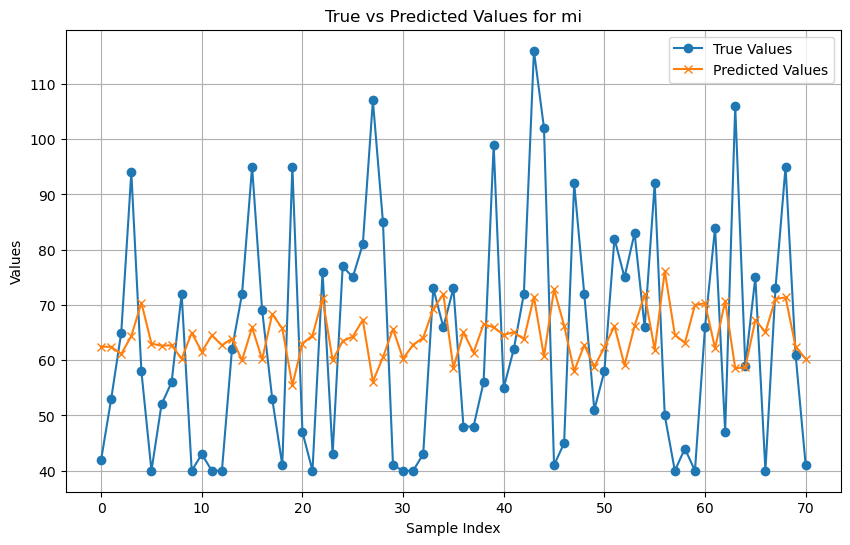

Column: mi, Mean Squared Error: 458.4522028169014, Mean Absolute Error: 18.150704225352115, R²: -0.08616518248154592


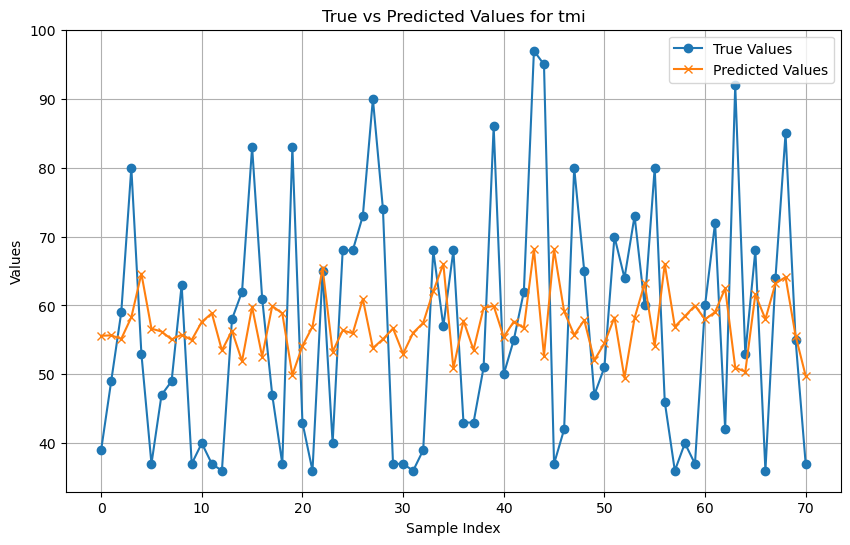

Column: tmi, Mean Squared Error: 310.82461408450706, Mean Absolute Error: 14.923380281690138, R²: -0.0440753714545401


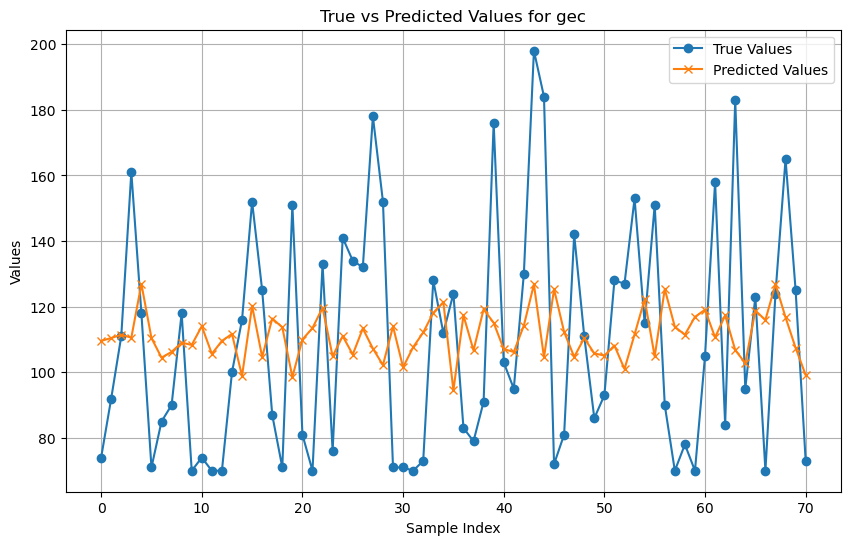

Column: gec, Mean Squared Error: 1269.0338492957746, Mean Absolute Error: 30.69816901408451, R²: -0.04407426524566893


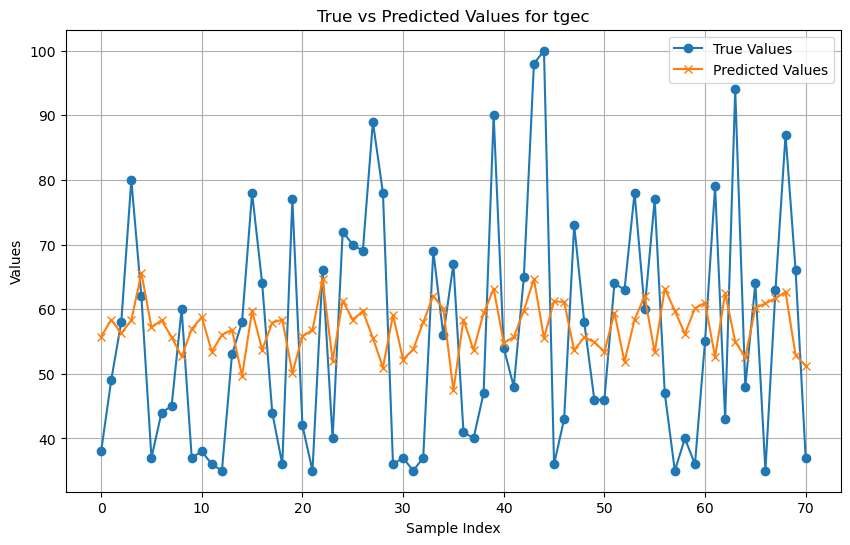

Column: tgec, Mean Squared Error: 328.5983845070423, Mean Absolute Error: 15.535633802816902, R²: -0.023881683528780506


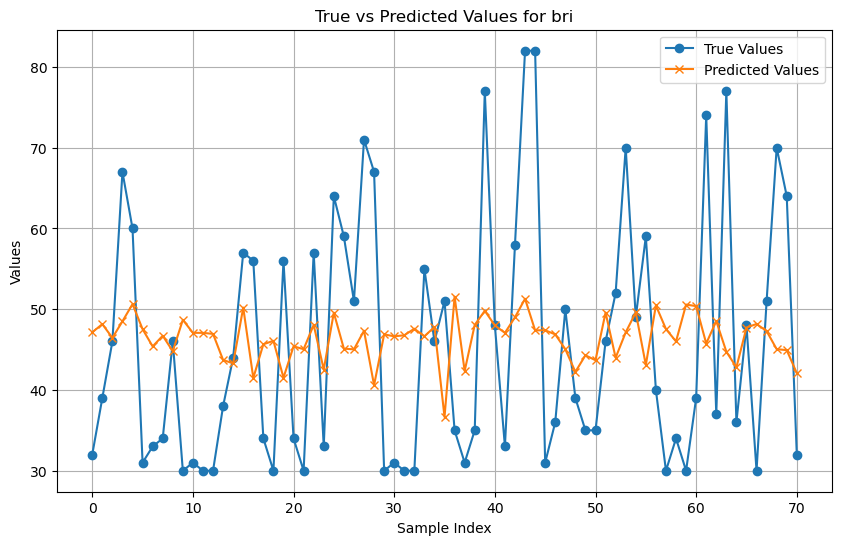

Column: bri, Mean Squared Error: 236.16827887323947, Mean Absolute Error: 13.279718309859154, R²: -0.02424965354311759


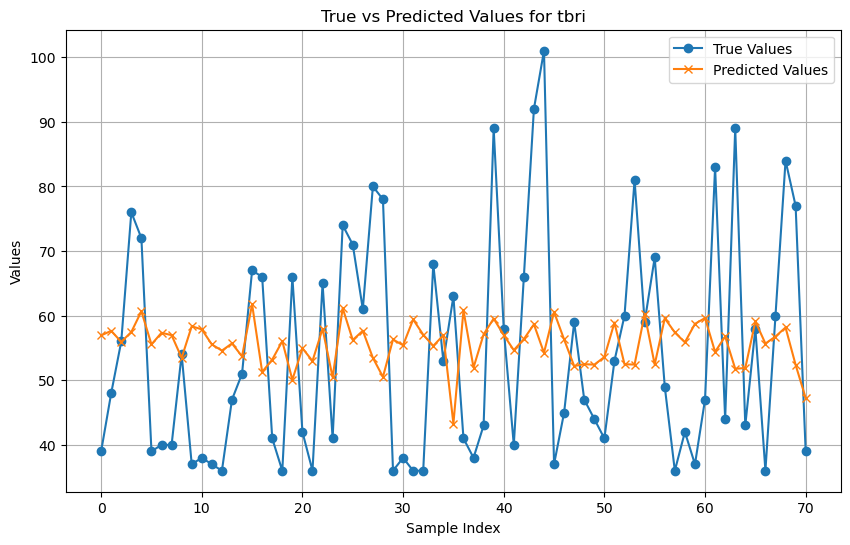

Column: tbri, Mean Squared Error: 312.0559464788733, Mean Absolute Error: 15.181690140845069, R²: -0.06709277789234336


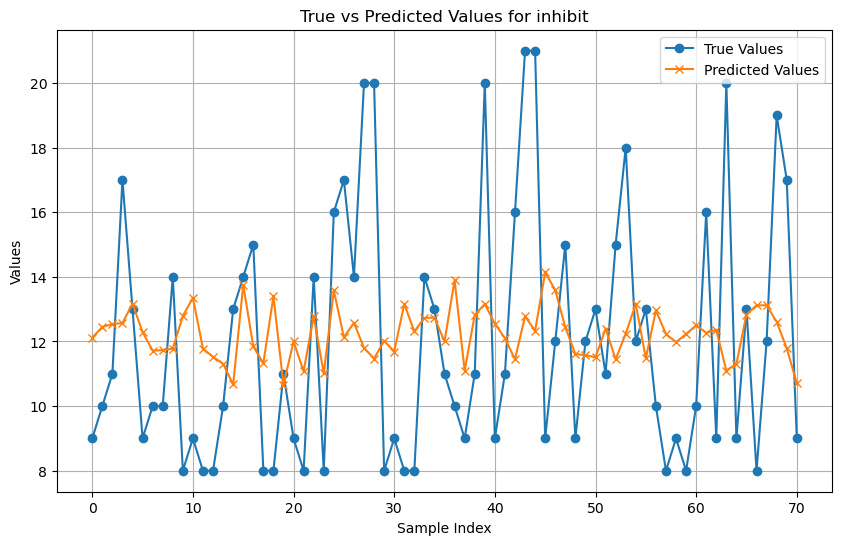

Column: inhibit, Mean Squared Error: 15.045695774647887, Mean Absolute Error: 3.247042253521127, R²: -0.029360663391329922


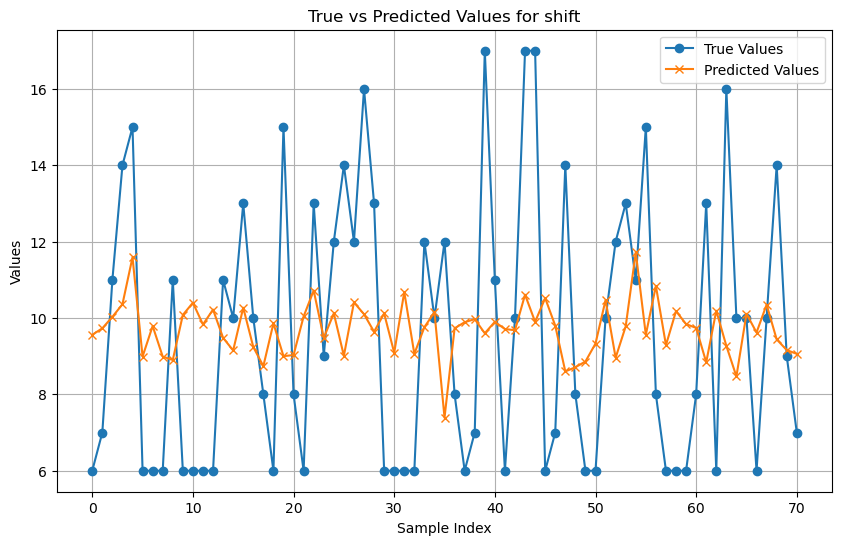

Column: shift, Mean Squared Error: 12.502125352112676, Mean Absolute Error: 3.058450704225352, R²: -0.028614556879386077


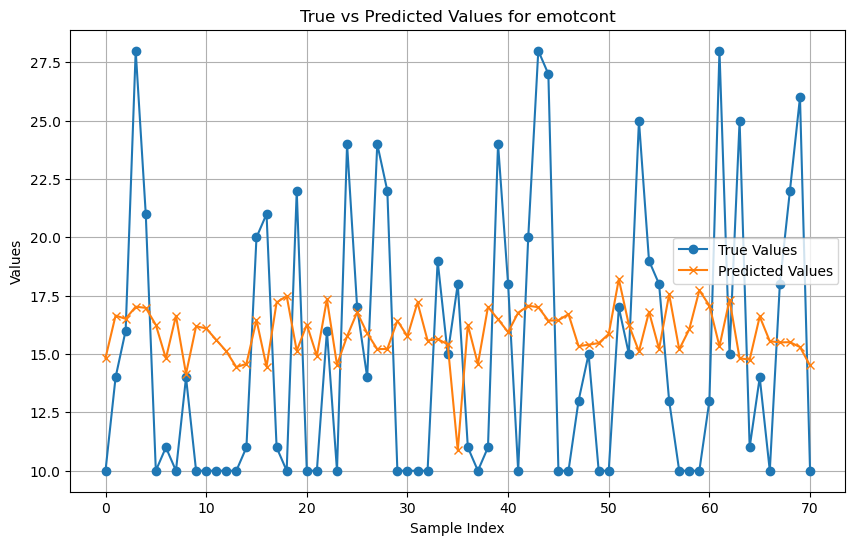

Column: emotcont, Mean Squared Error: 35.151164788732395, Mean Absolute Error: 5.218732394366197, R²: -0.06298228952956864


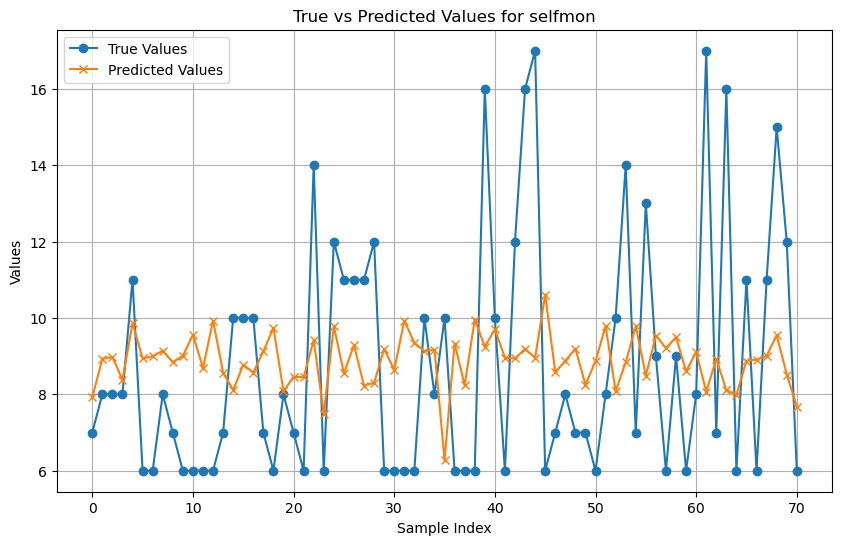

Column: selfmon, Mean Squared Error: 10.742333802816905, Mean Absolute Error: 2.7260563380281693, R²: -0.07937222842336089


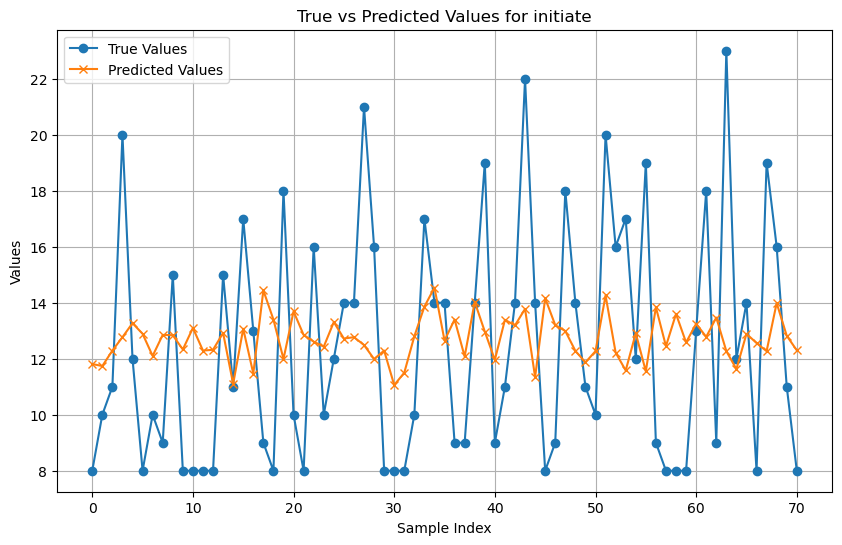

Column: initiate, Mean Squared Error: 17.69332112676056, Mean Absolute Error: 3.5971830985915494, R²: -0.014999110089445988


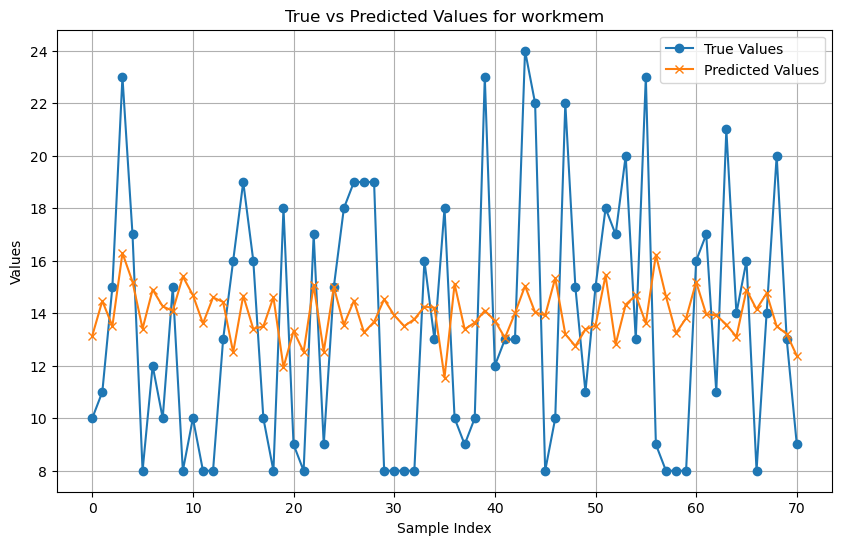

Column: workmem, Mean Squared Error: 23.512756338028172, Mean Absolute Error: 4.217042253521126, R²: -0.0274957930233366


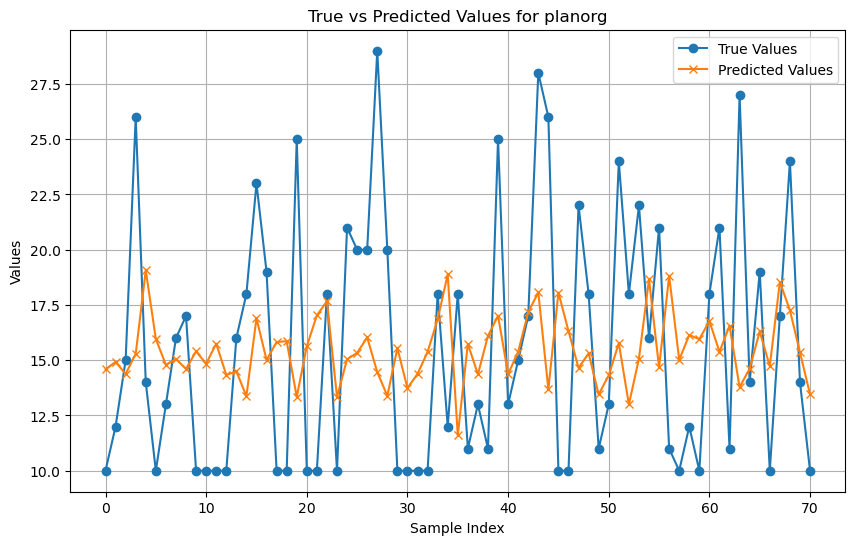

Column: planorg, Mean Squared Error: 33.829407042253514, Mean Absolute Error: 4.941267605633804, R²: -0.0978115160293549


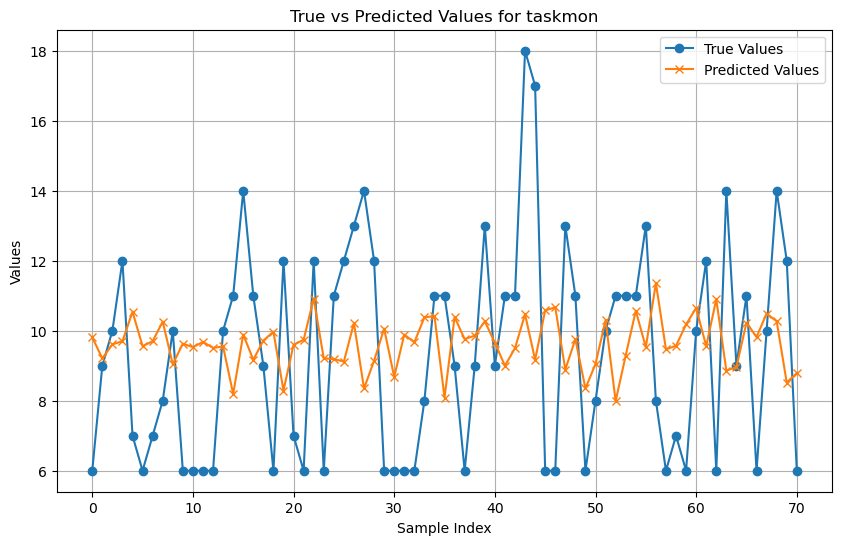

Column: taskmon, Mean Squared Error: 10.159302816901409, Mean Absolute Error: 2.7530985915492954, R²: -0.13685503240987407


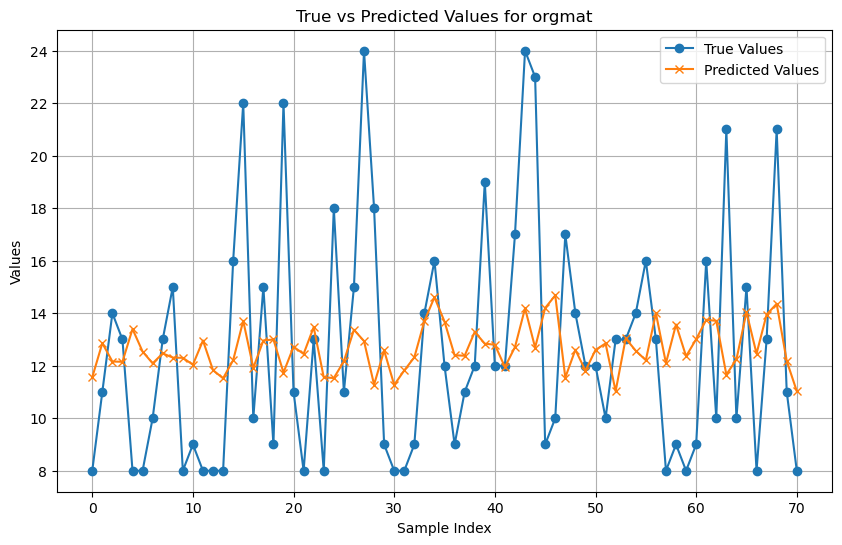

Column: orgmat, Mean Squared Error: 18.61647887323943, Mean Absolute Error: 3.4619718309859153, R²: 0.04131504750229886


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {}
predictions = {}

for column in briefa.columns:
    y = briefa[column]  
    X = bloodbiomk2

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)  
    X_test_scaled = scaler.transform(X_test) 
    
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    models[column] = model

    y_pred = model.predict(X_test_scaled)
    predictions[column] = y_pred

    plt.figure(figsize=(10, 6))
    plt.plot(y_test.reset_index(drop=True), label='True Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title(f'True vs Predicted Values for {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Values')
    plt.legend()
    plt.grid()
    
    file_name = f"{column}_true_vs_predicted.png"  
#     plt.savefig(os.path.join(save_path, file_name), bbox_inches='tight')  
    plt.show()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Column: {column}, Mean Squared Error: {mse}, Mean Absolute Error: {mae}, R²: {r2}")


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)

y_test_pred = model.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training MSE: {mse_train}, MAE: {mae_train}, R²: {r2_train}")
print(f"Testing MSE: {mse_test}, MAE: {mae_test}, R²: {r2_test}")

# Check for overfitting
if mse_train < mse_test:
    print("Possible overfitting: The model performs better on training data than on testing data.")
else:
    print("No overfitting detected: The model performs comparably on both datasets.")


Training MSE: 2.588094545454546, MAE: 1.3887272727272726, R²: 0.8593920888576696
Testing MSE: 18.61647887323943, MAE: 3.4619718309859153, R²: 0.04131504750229886
Possible overfitting: The model performs better on training data than on testing data.


In [20]:
briefa.head()

mi  tmi  gec  tgec  bri  tbri  inhibit  shift  emotcont  selfmon  \
0   75   64  114    57   39    46       12      9        11        7   
1  101   85  171    85   70    79       17     15        23       15   
2   90   77  158    79   68    77       15     14        27       12   
3   43   40   81    42   38    46        9      8        15        6   
4   43   39   81    41   38    45        9     11        12        6   

   initiate  workmem  planorg  taskmon  orgmat  
0        14       17       20       13      11  
1        19       24       27       15      16  
2        20       22       22       14      12  
3         9        8       11        7       8  
4        10        8       10        7       8

In [21]:
categories_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\categories.csv"
categories_df = pd.read_csv(categories_file_path)
new_column = categories_df['checkin_bin']
briefa['category'] = new_column
print(briefa.head())

bloodbiomk2['category'] = new_column
print(bloodbiomk2.head())


    mi  tmi  gec  tgec  bri  tbri  inhibit  shift  emotcont  selfmon  \
0   75   64  114    57   39    46       12      9        11        7   
1  101   85  171    85   70    79       17     15        23       15   
2   90   77  158    79   68    77       15     14        27       12   
3   43   40   81    42   38    46        9      8        15        6   
4   43   39   81    41   38    45        9     11        12        6   

   initiate  workmem  planorg  taskmon  orgmat  category  
0        14       17       20       13      11         2  
1        19       24       27       15      16         2  
2        20       22       22       14      12         2  
3         9        8       11        7       8         1  
4        10        8       10        7       8         3  
       Qalb     s_alb  p_IL_17A_F_cv  p_IL_17A_F  p_IL_17B_cv  p_IL_17B  \
0  7.852013  3.912500           5.43       2.190         1.63      1.18   
1  6.994813  3.556088           6.84       3.460         4.52  

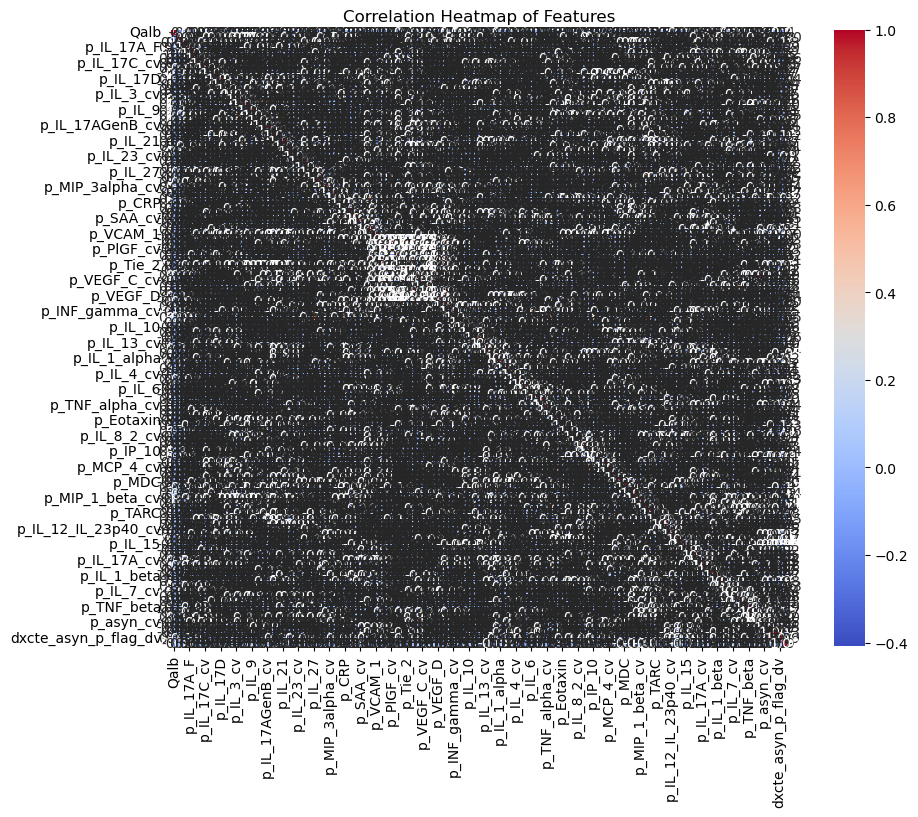

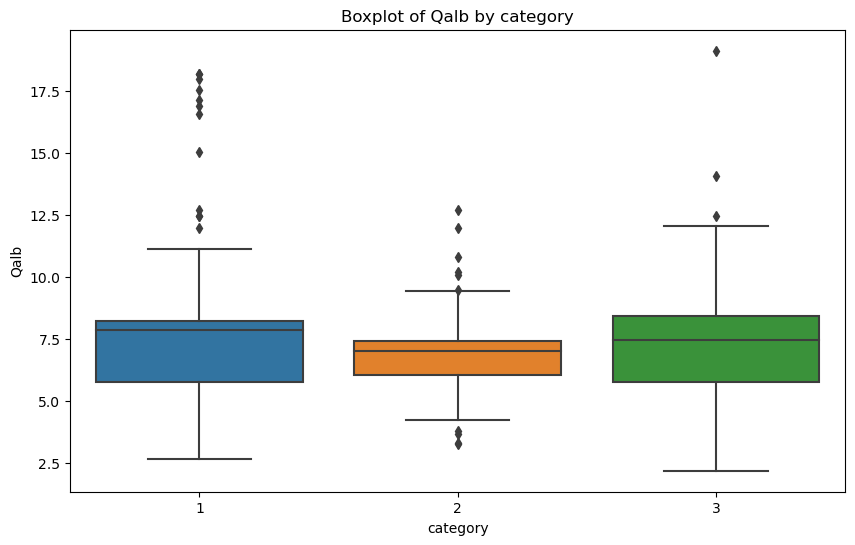

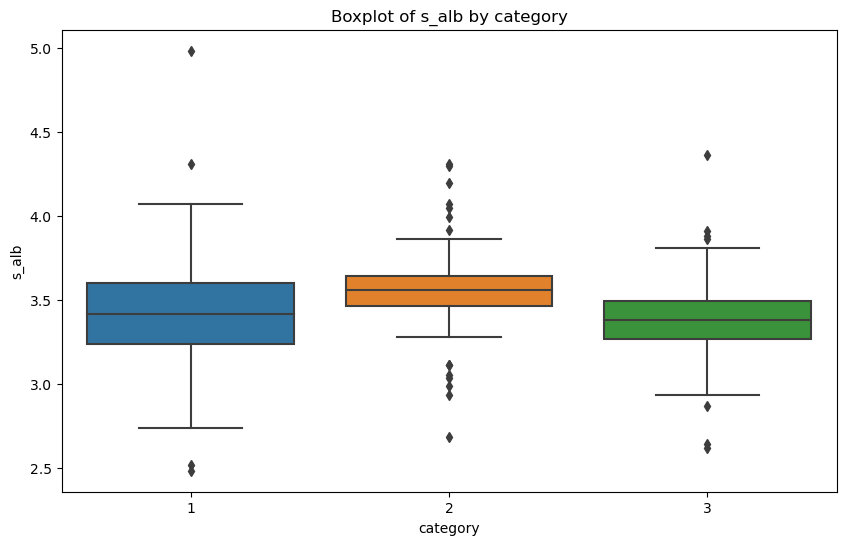

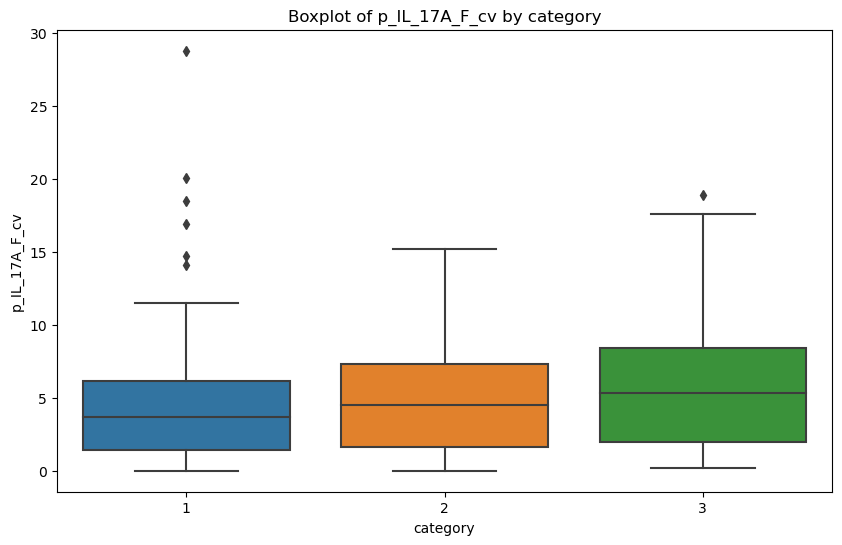

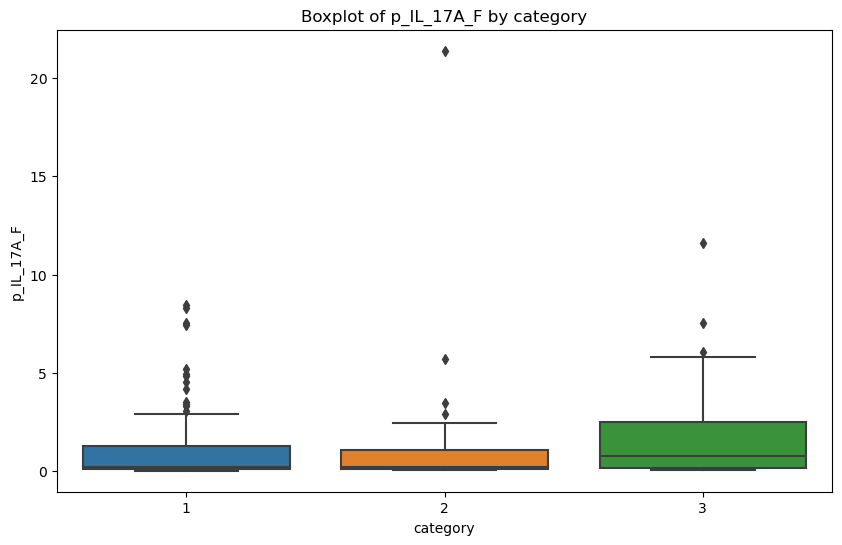

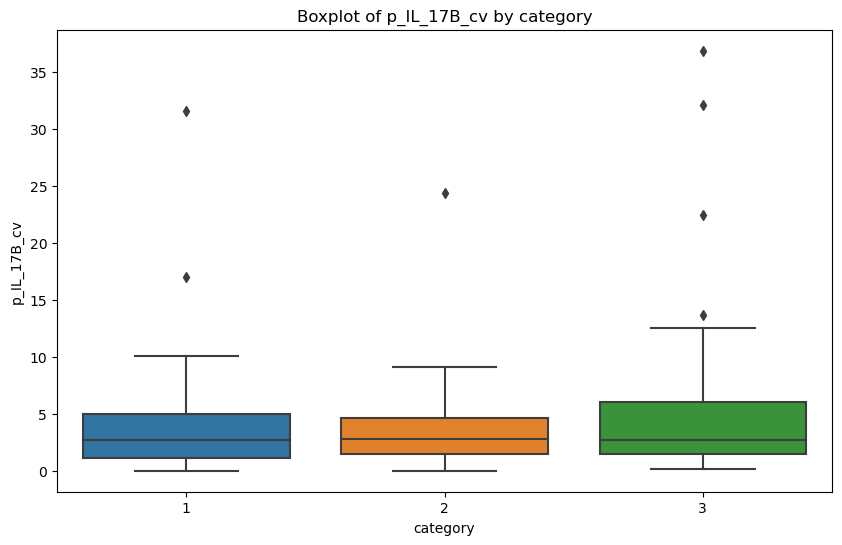

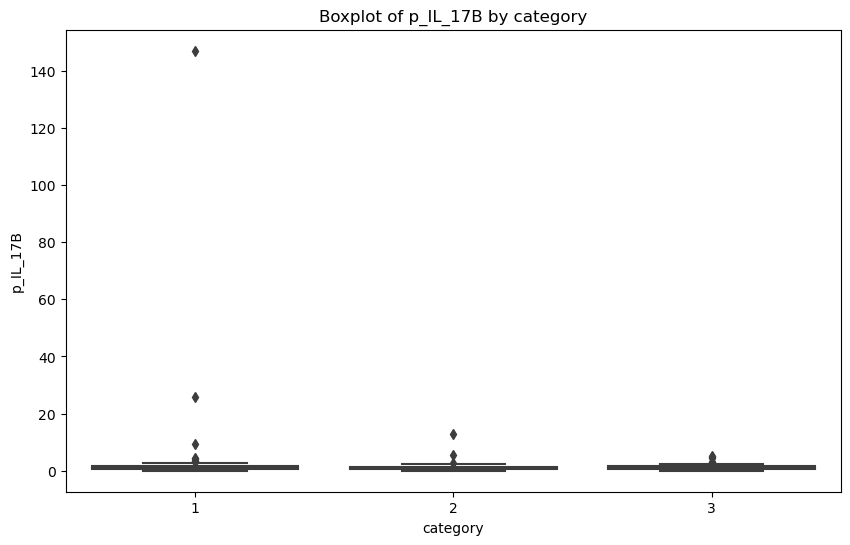

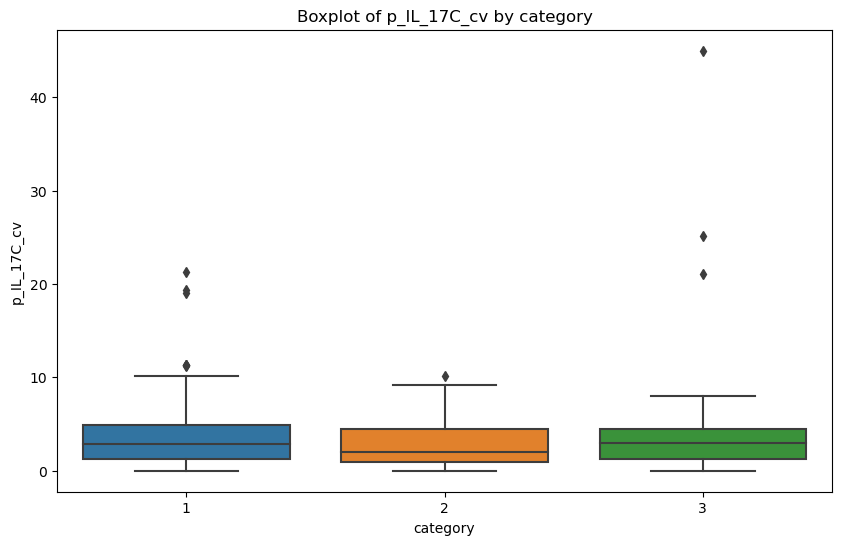

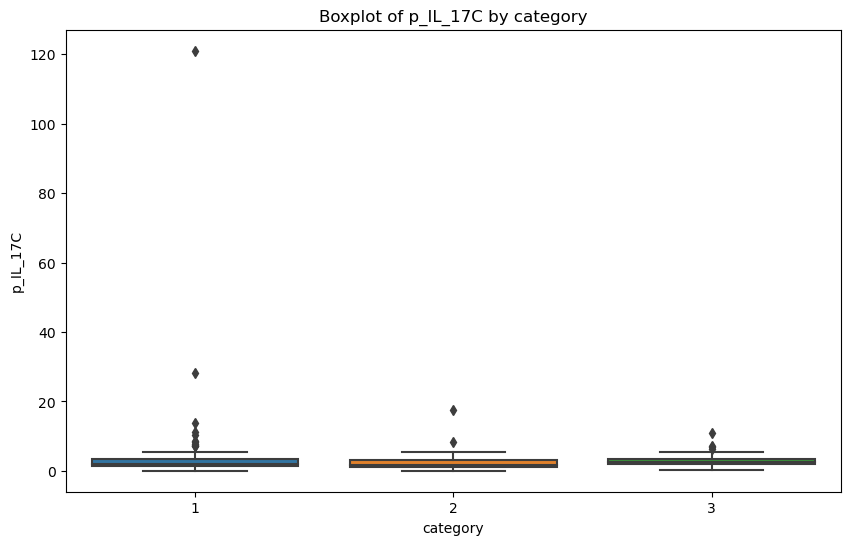

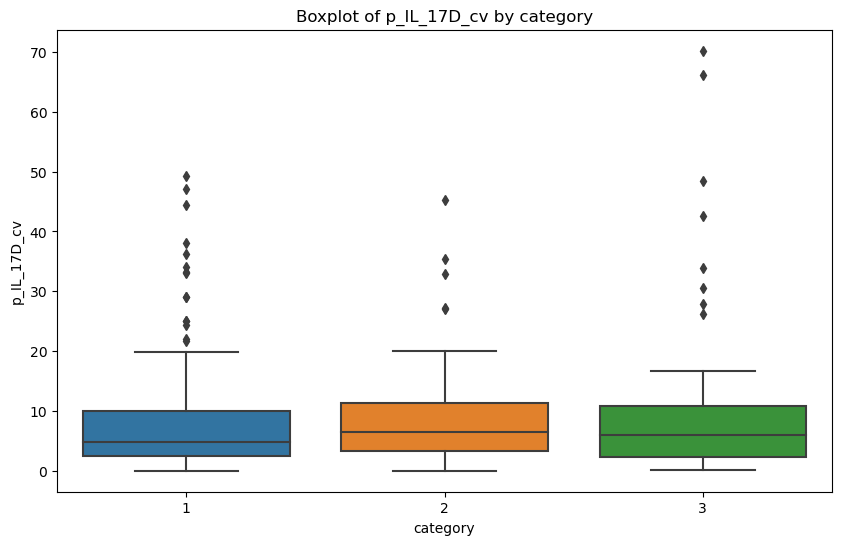

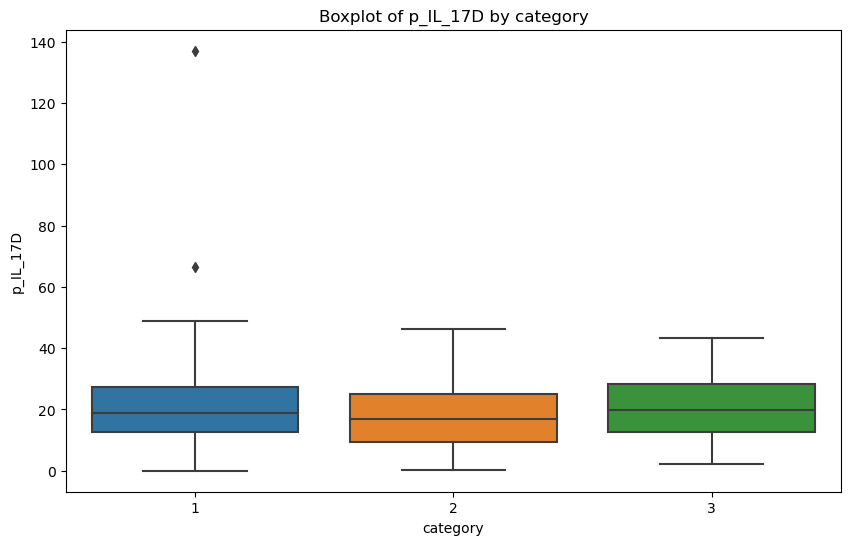

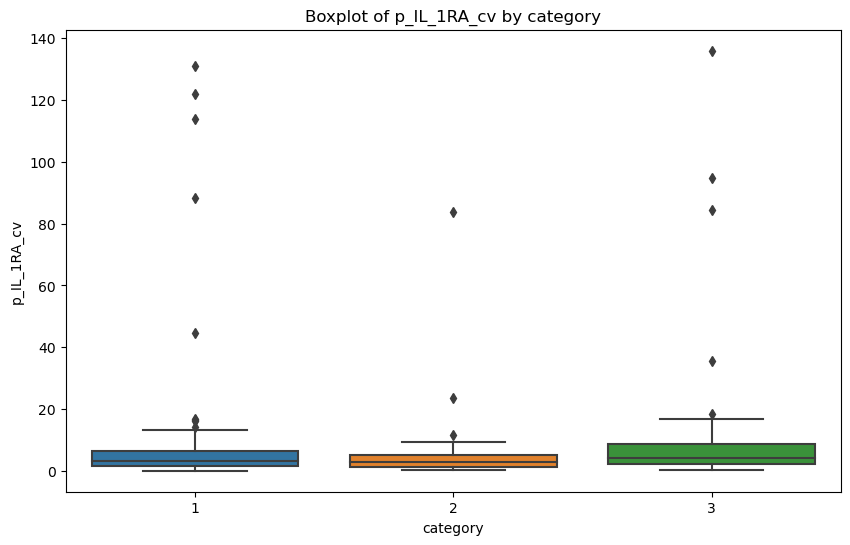

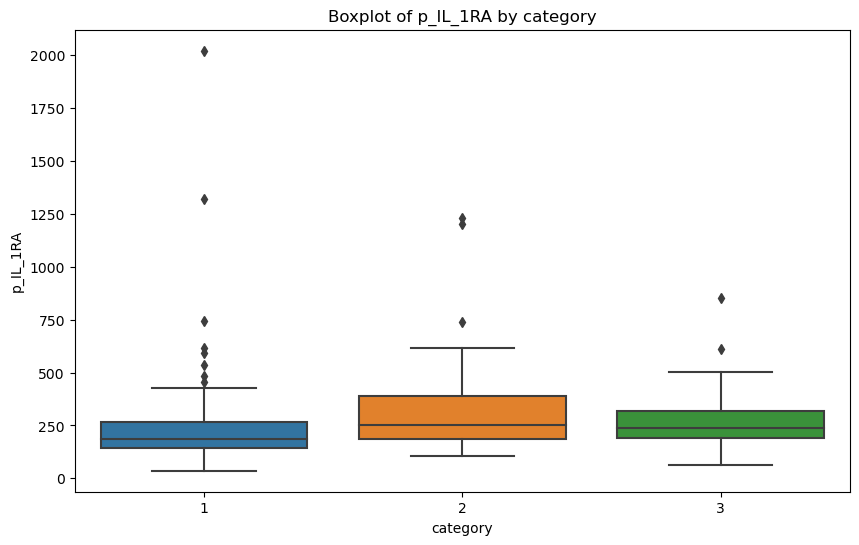

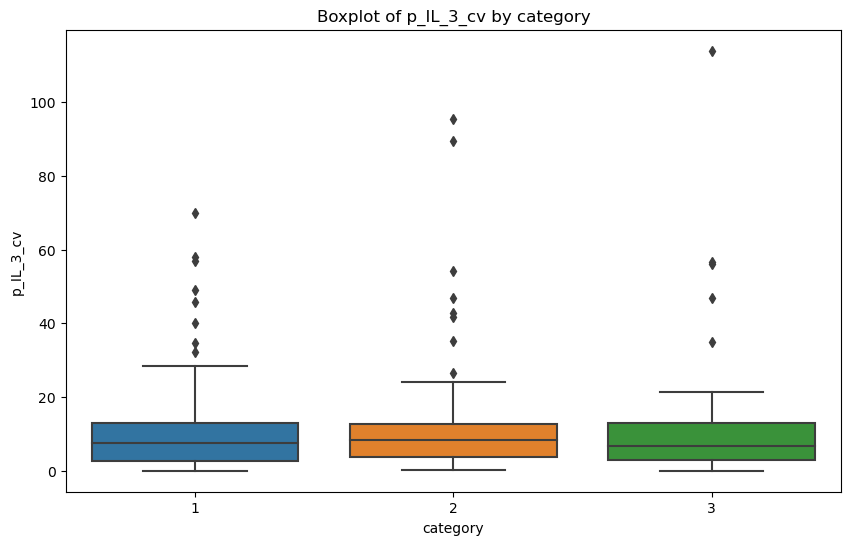

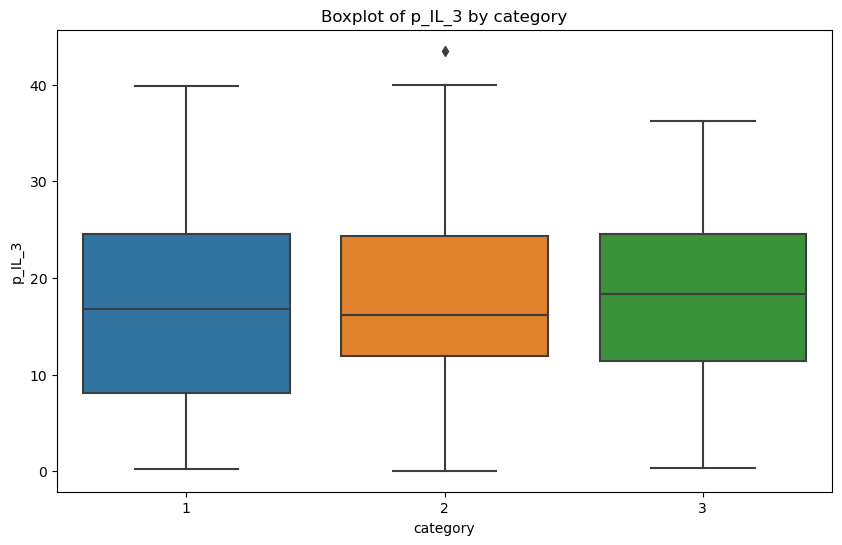

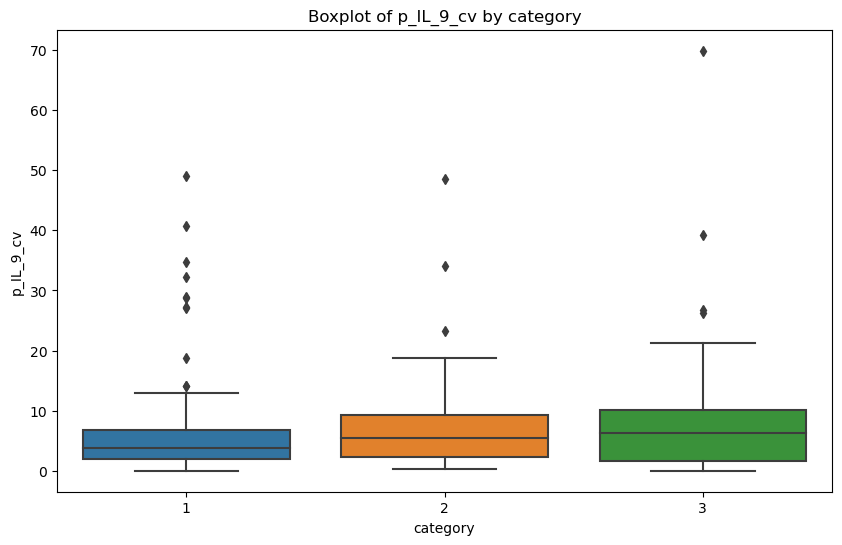

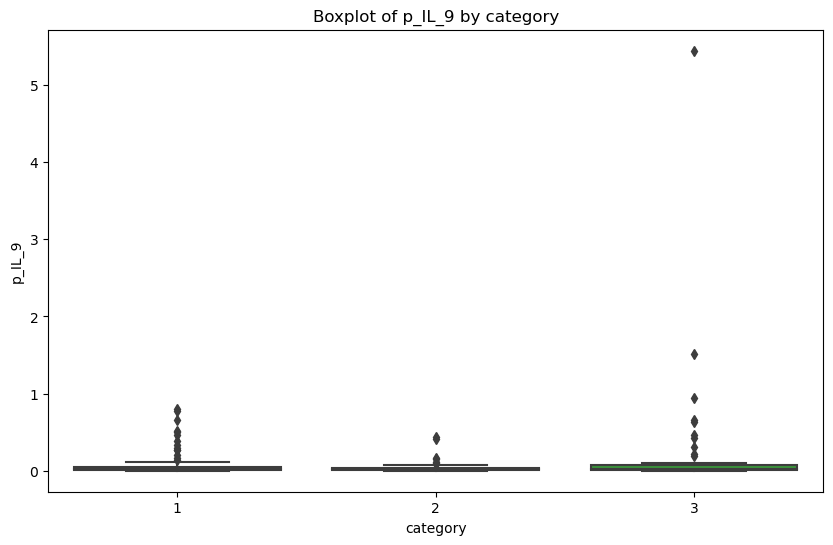

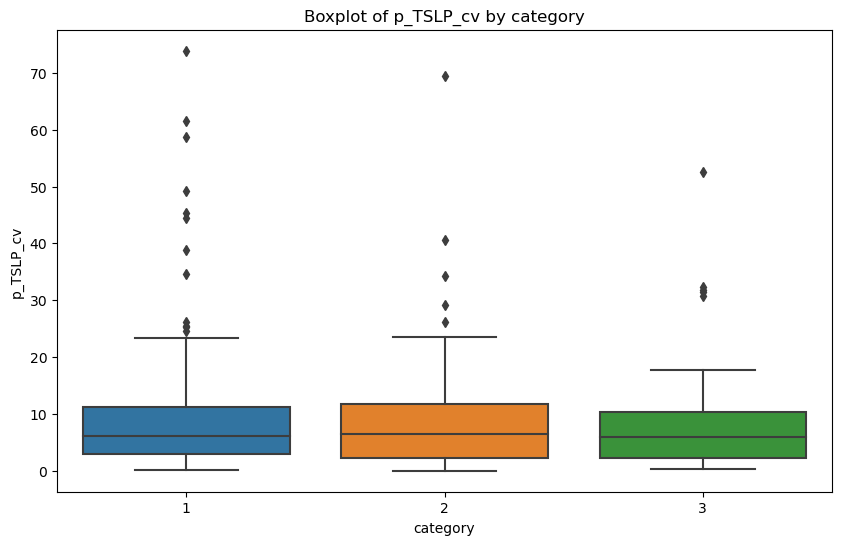

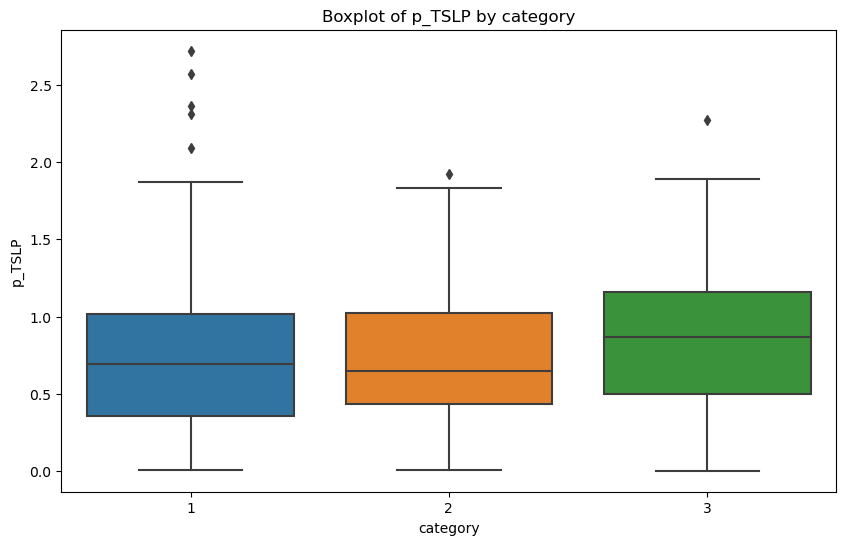

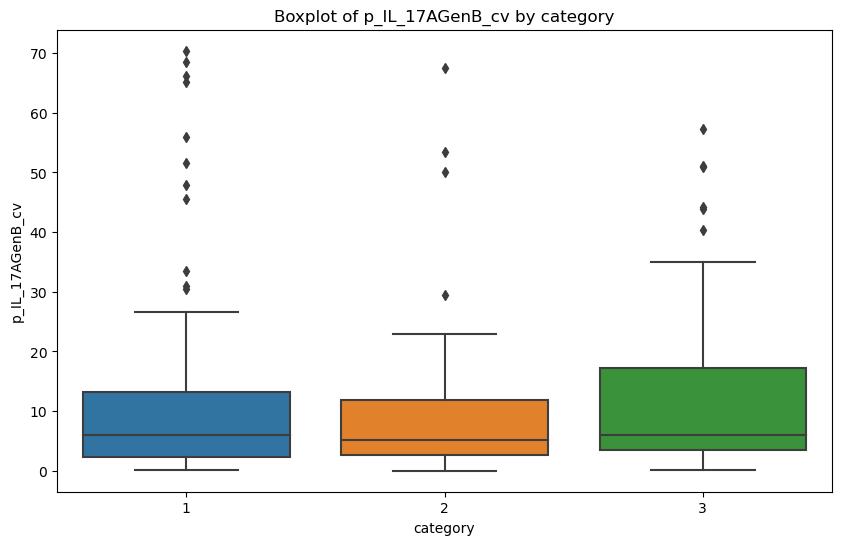

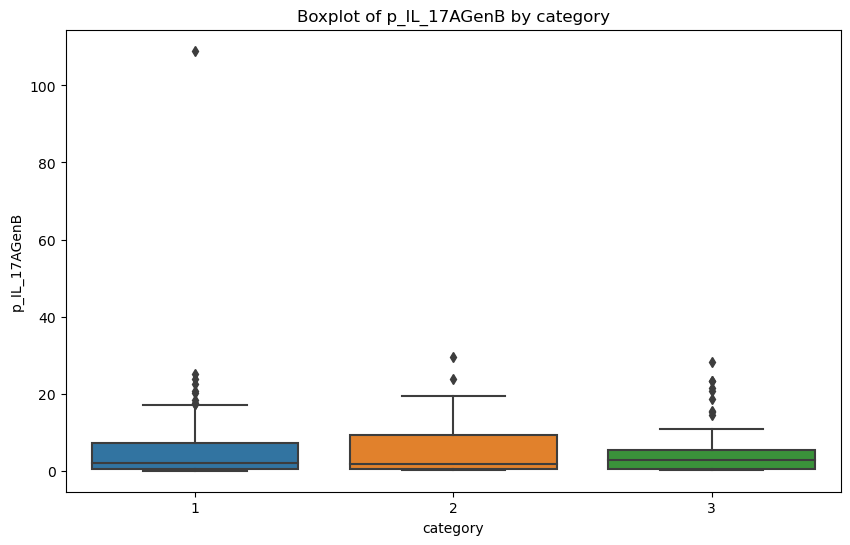

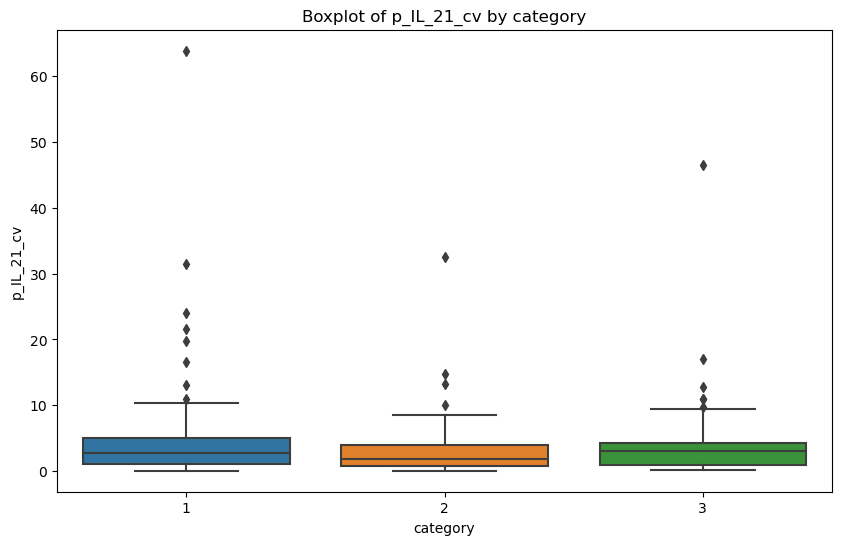

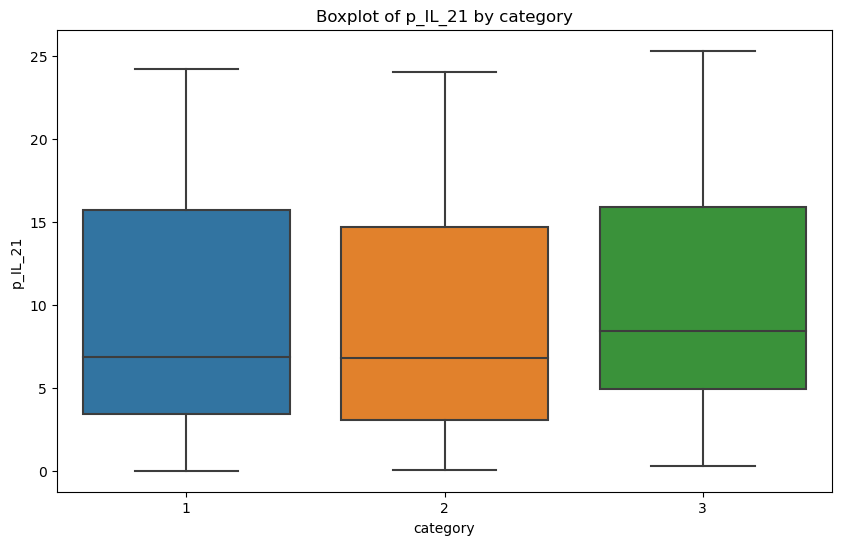

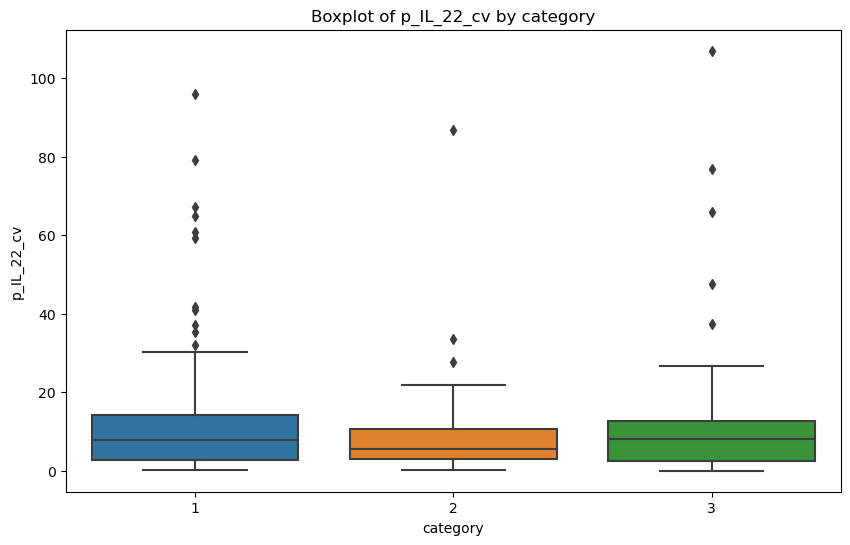

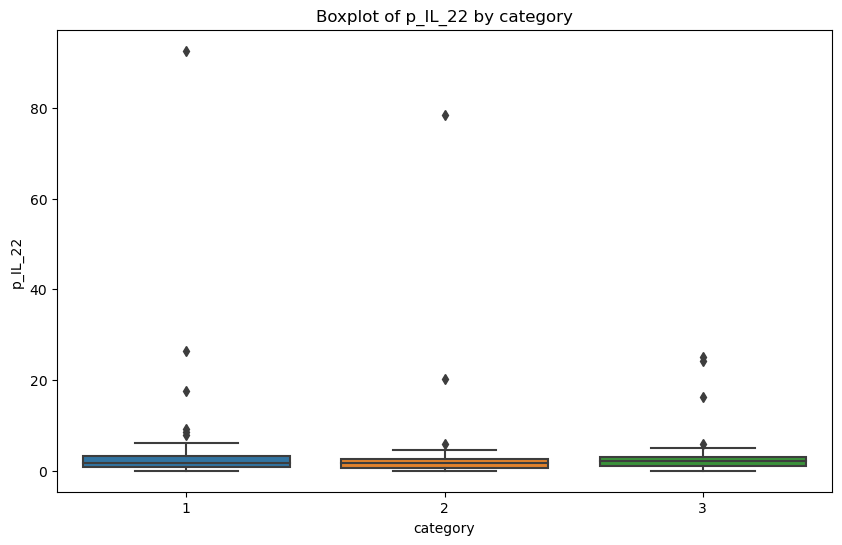

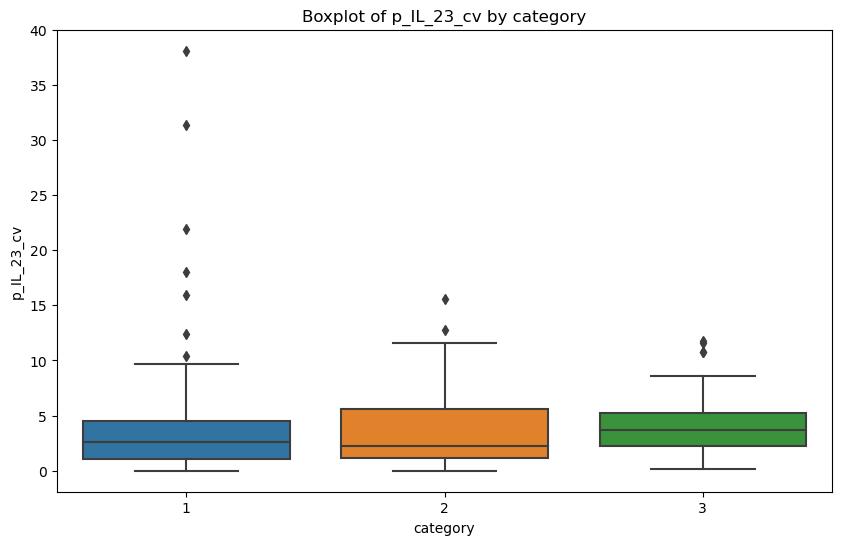

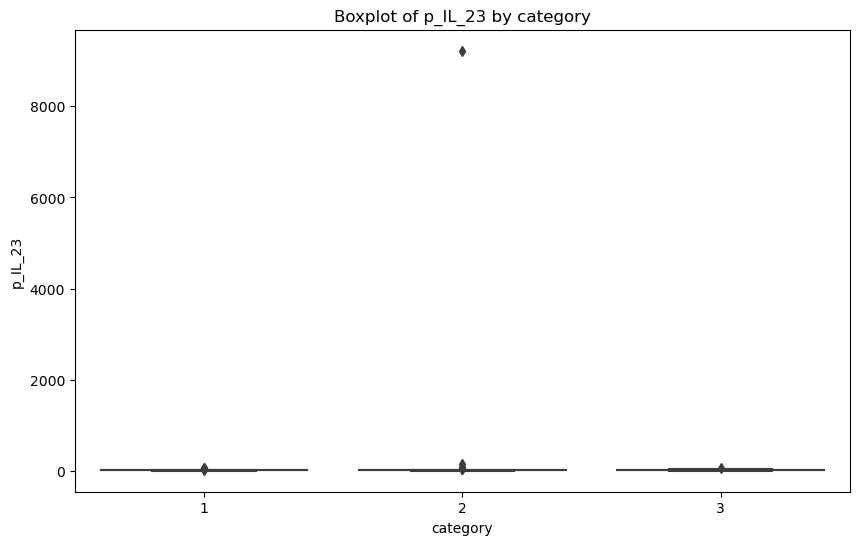

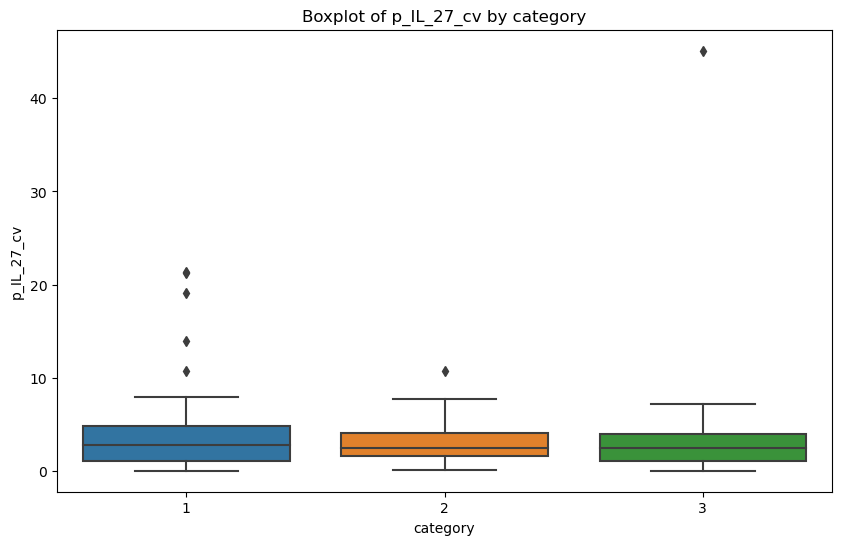

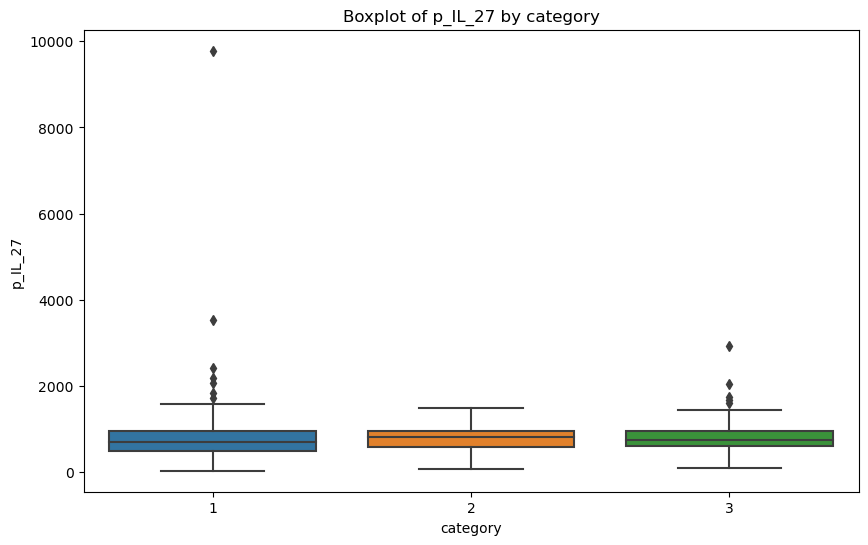

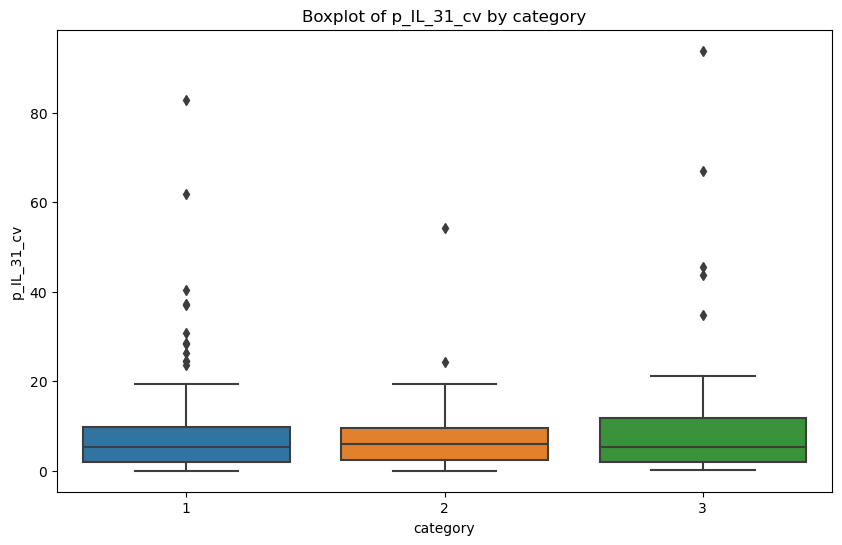

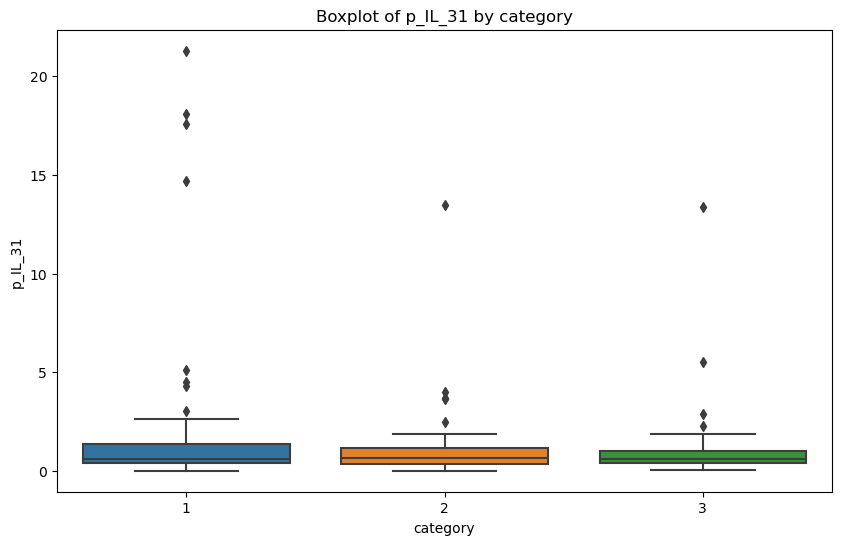

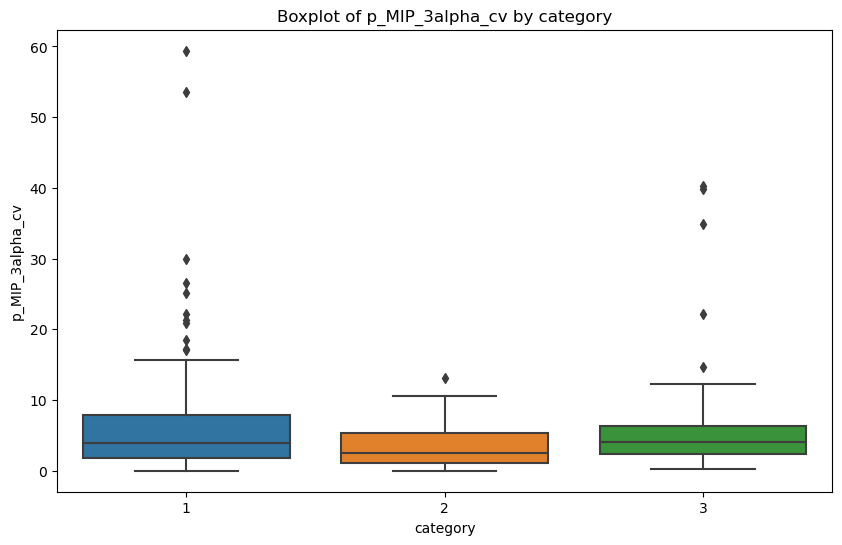

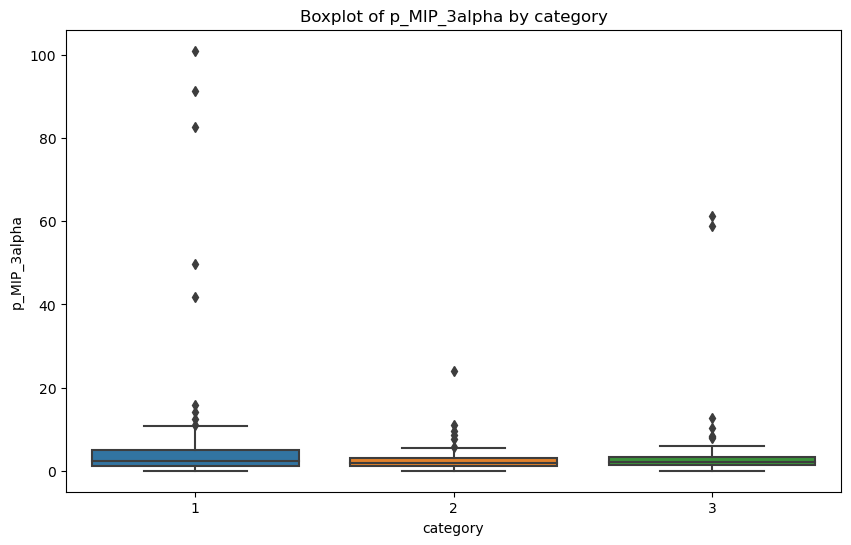

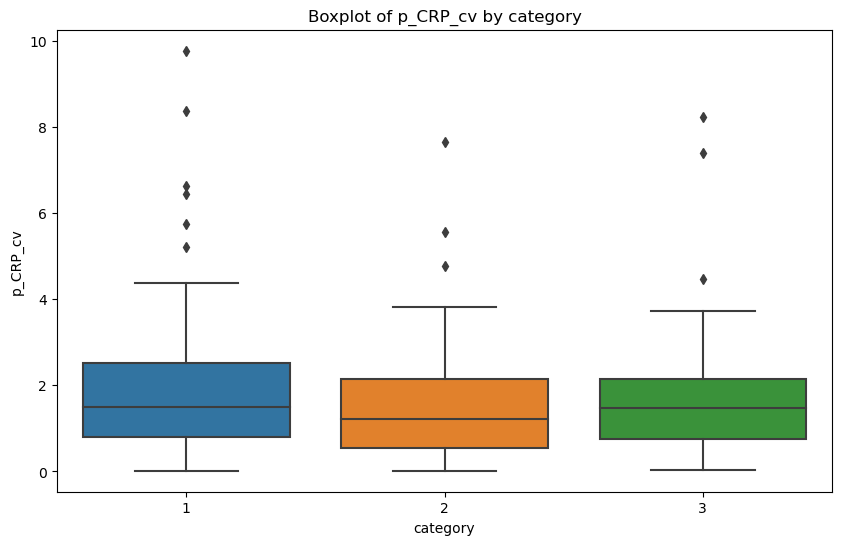

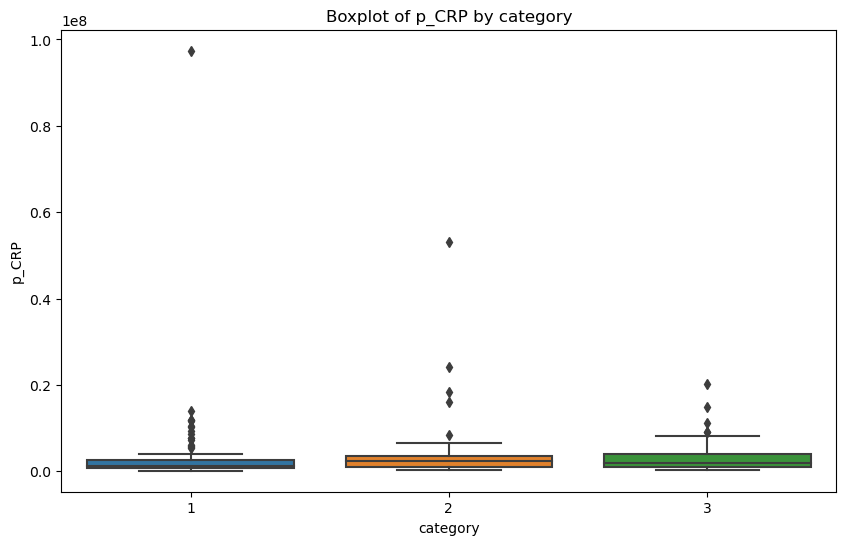

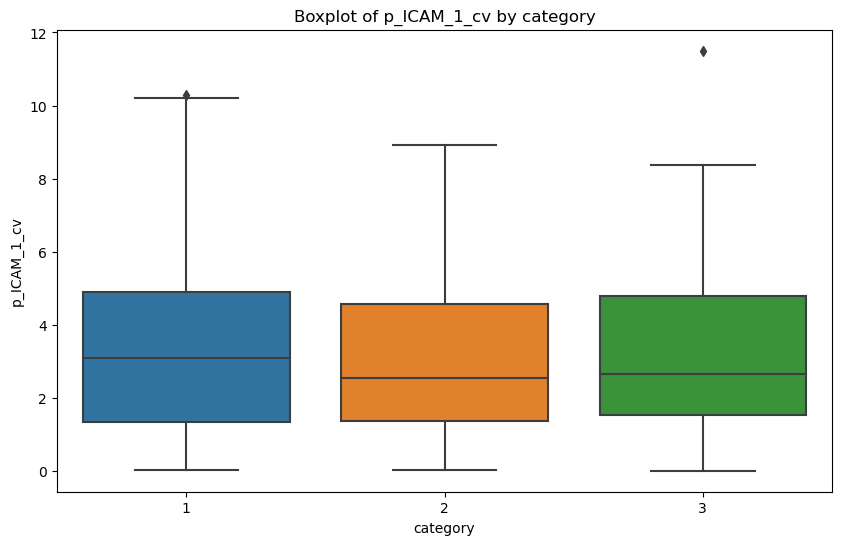

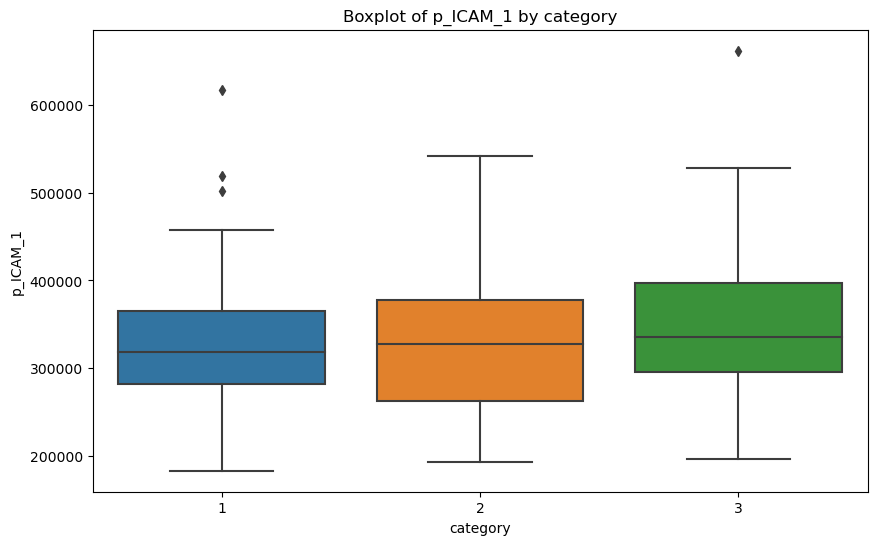

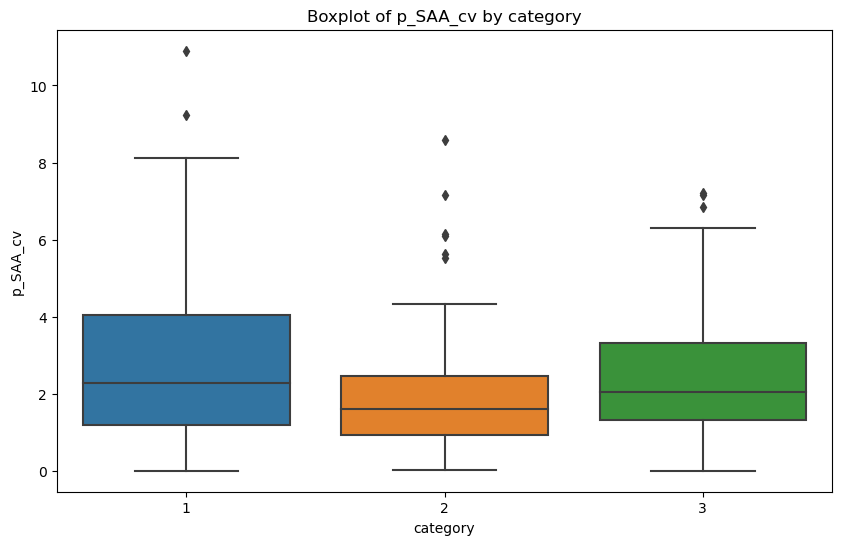

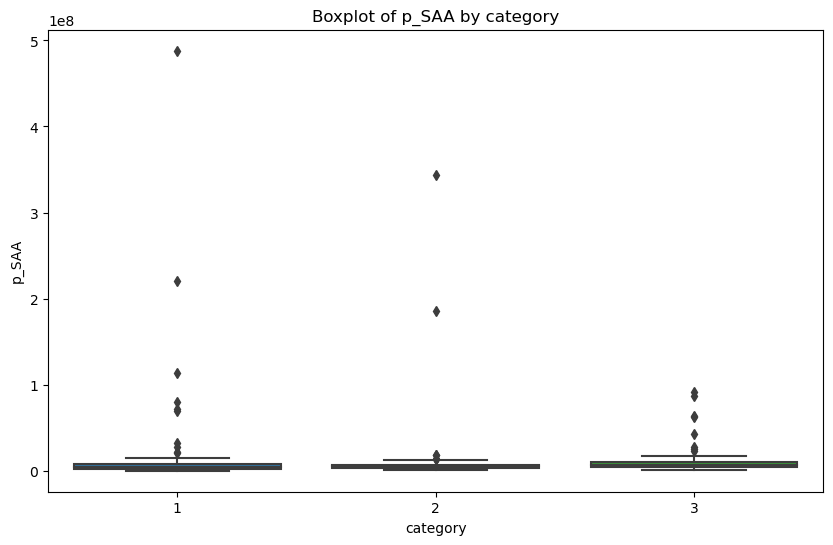

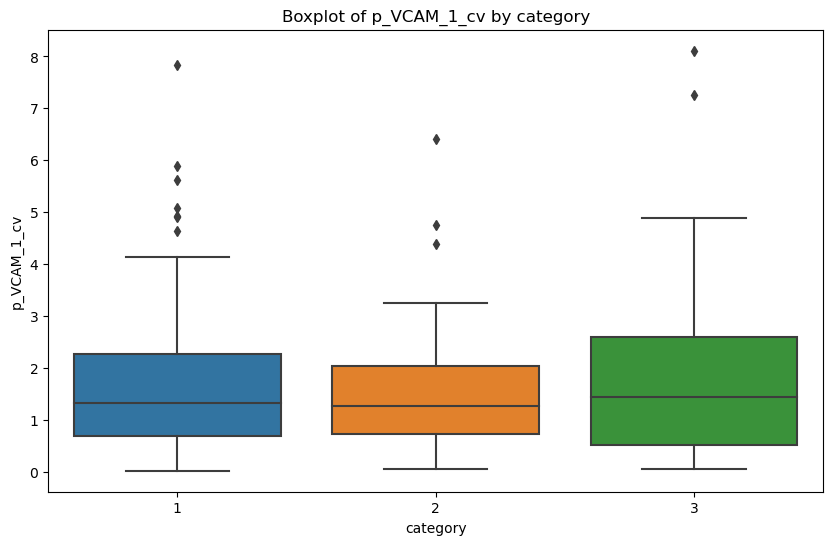

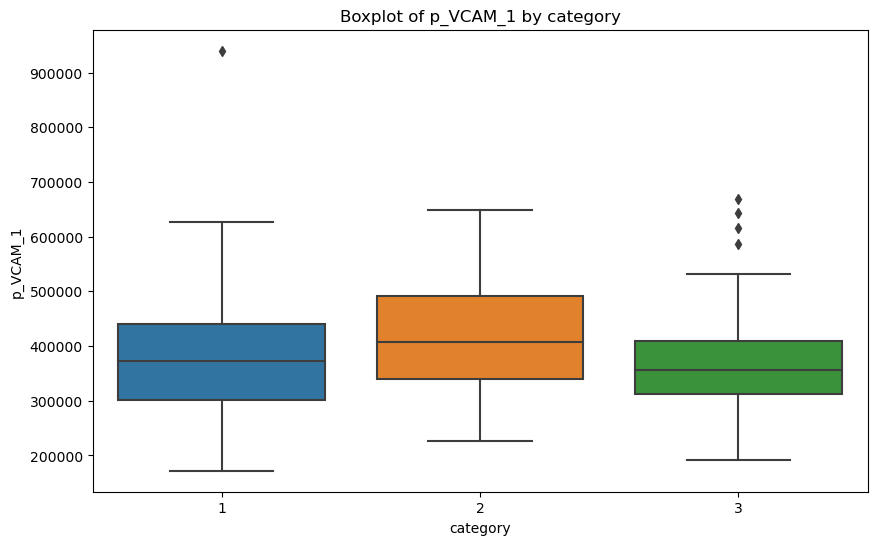

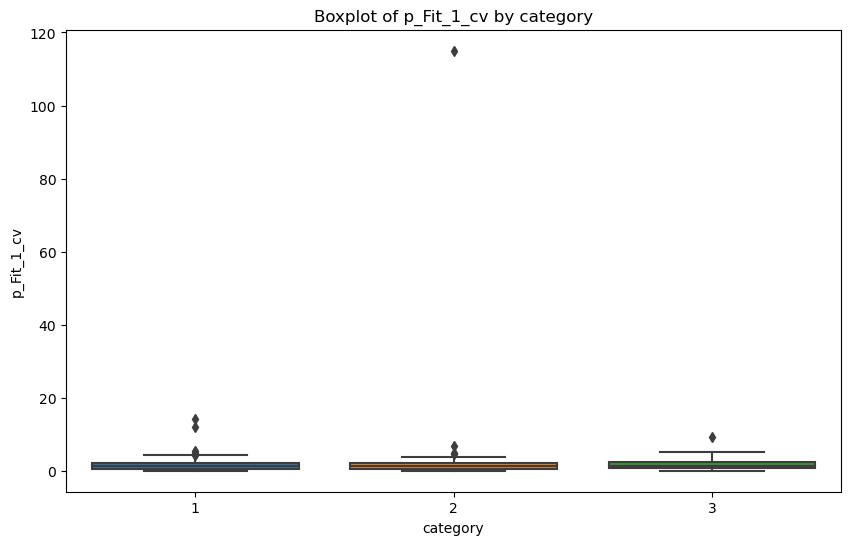

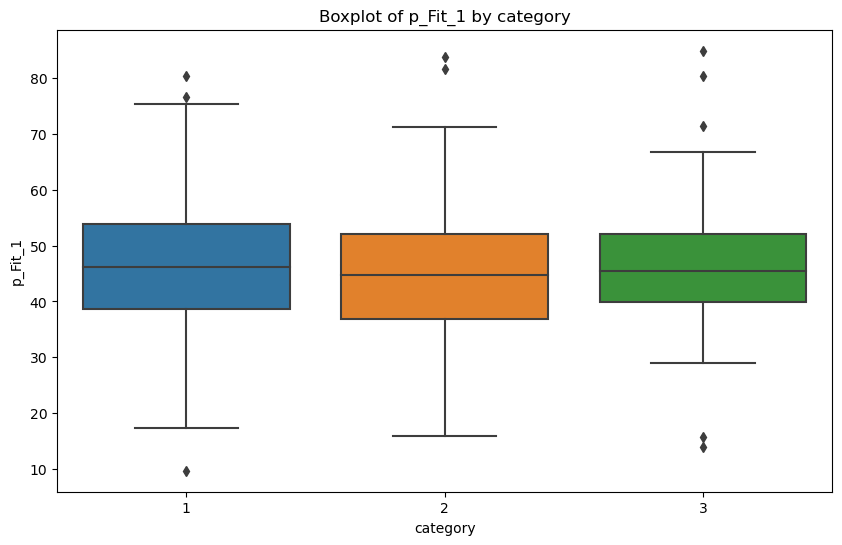

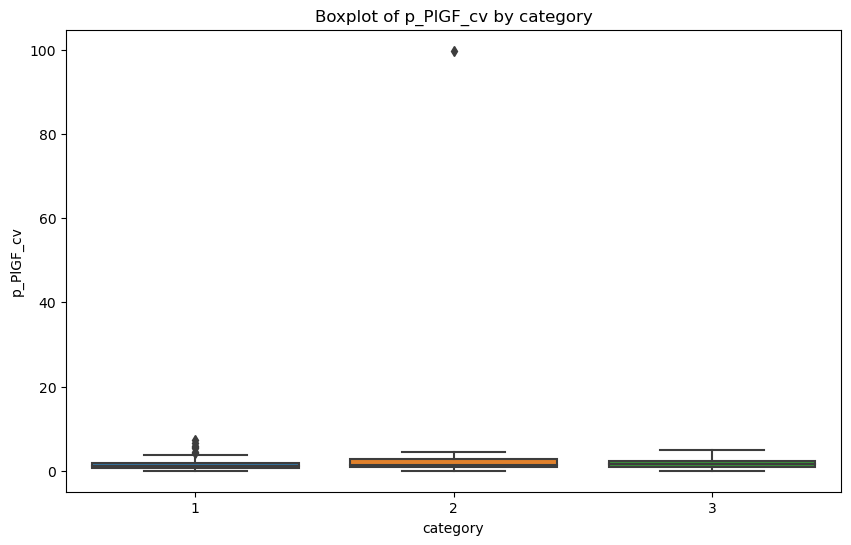

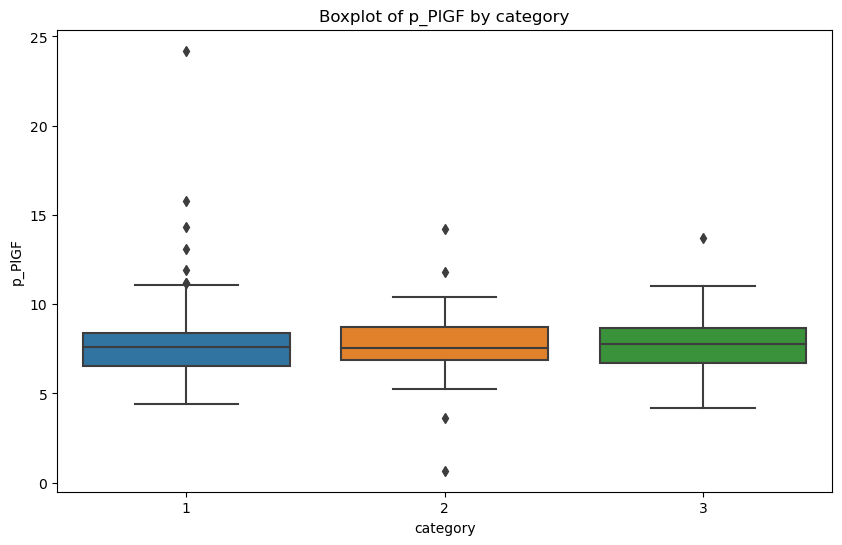

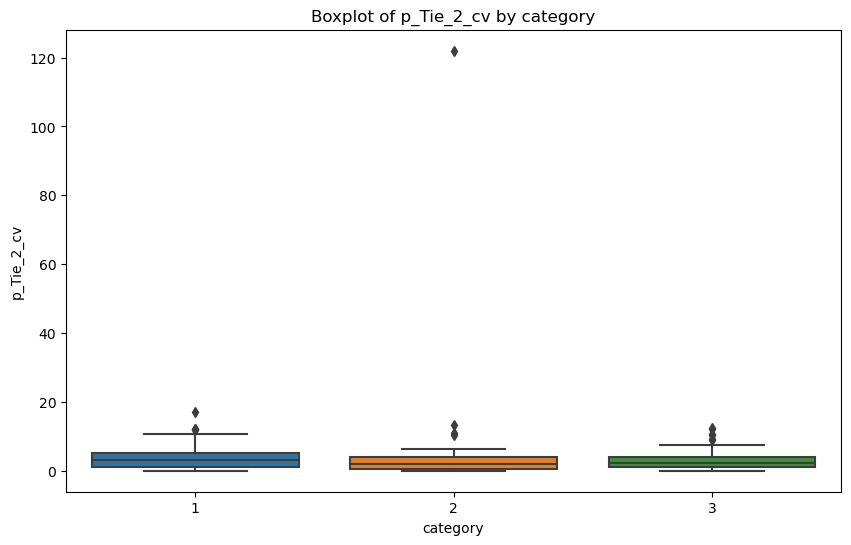

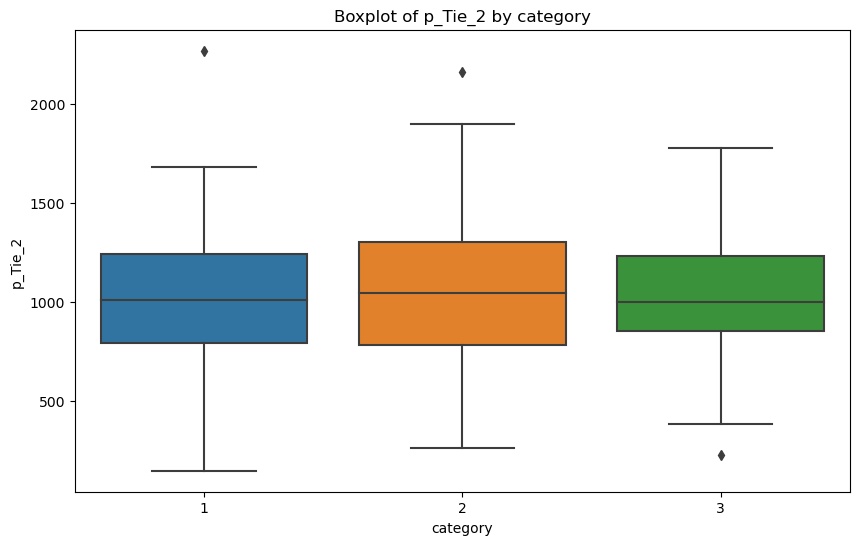

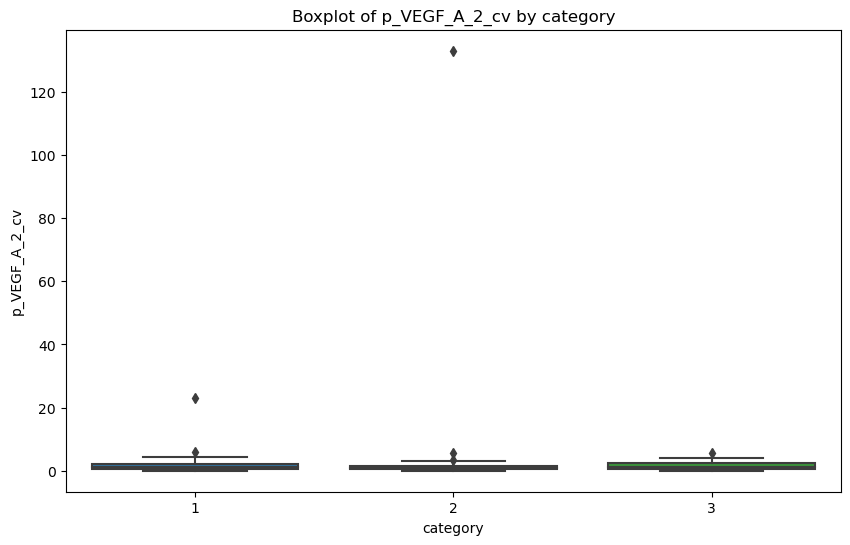

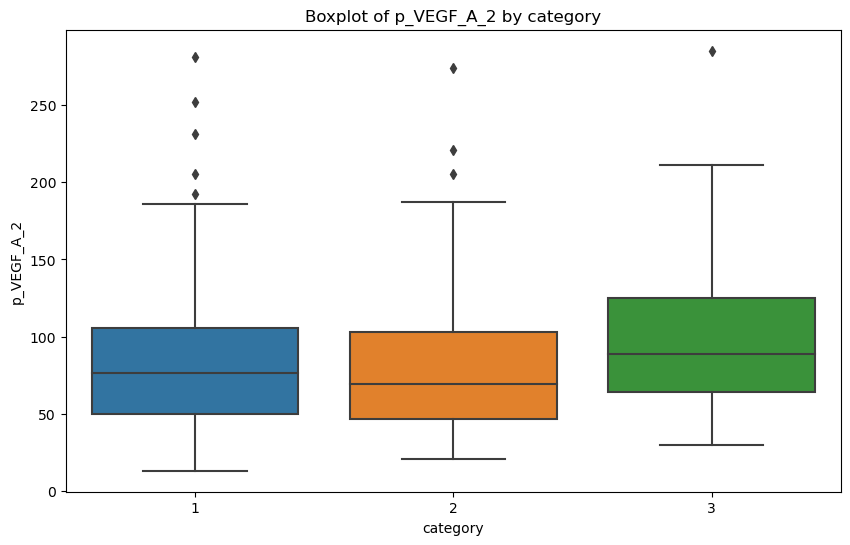

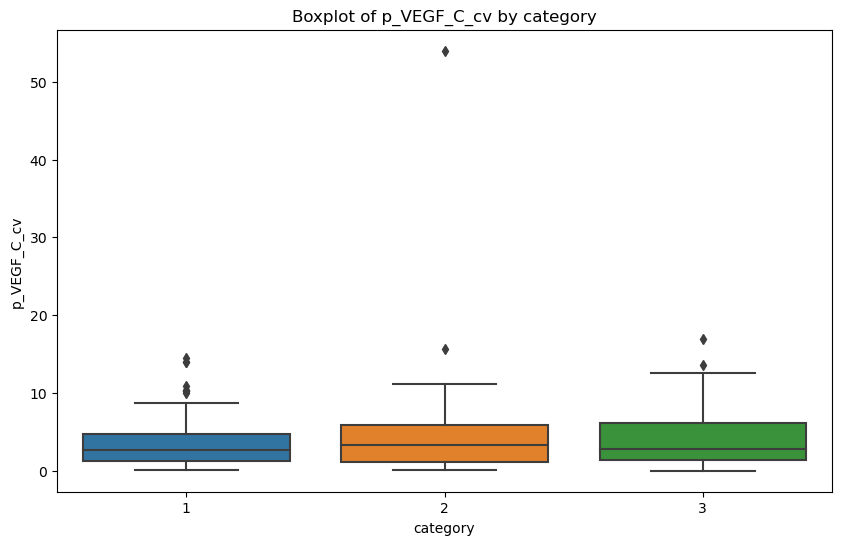

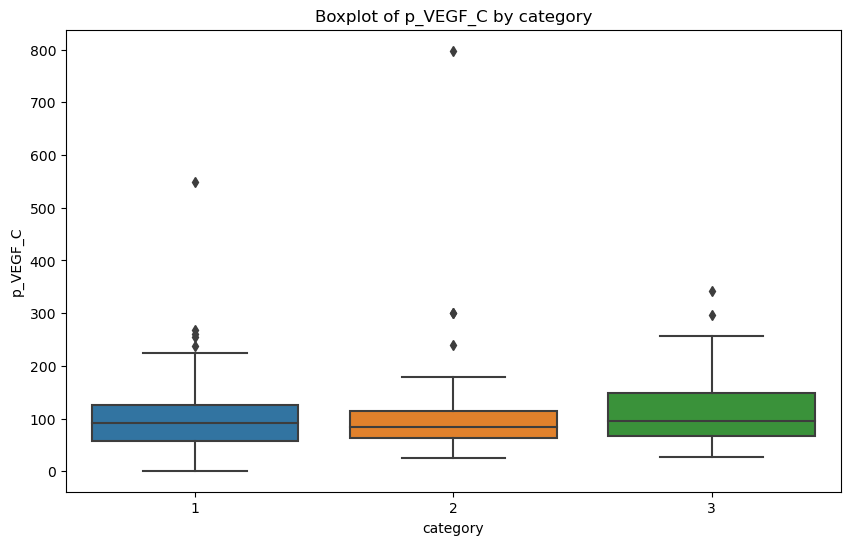

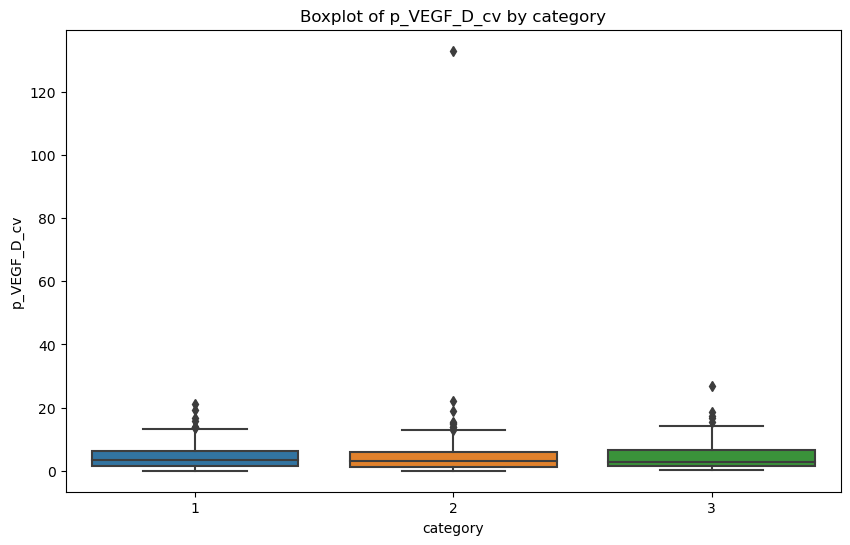

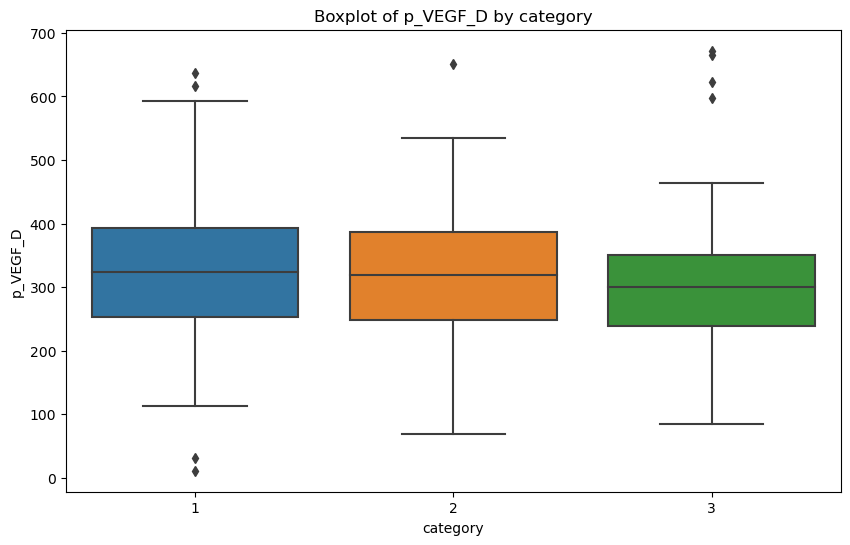

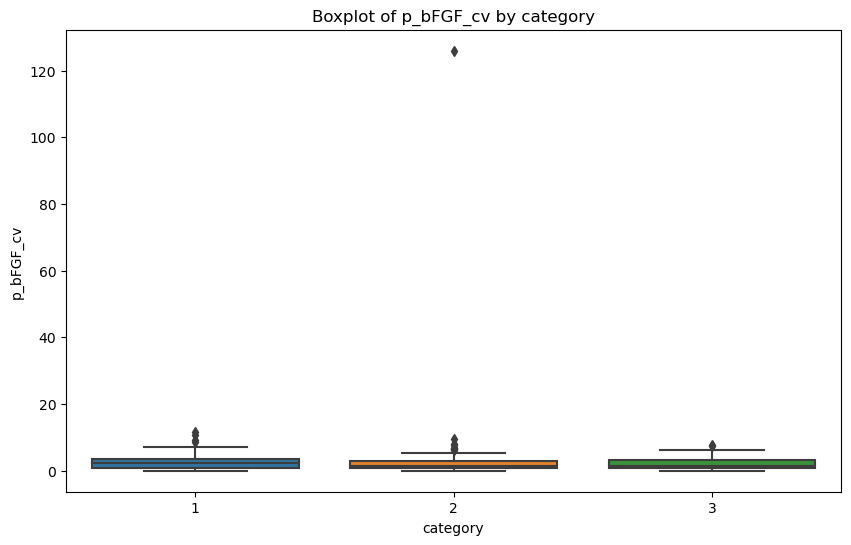

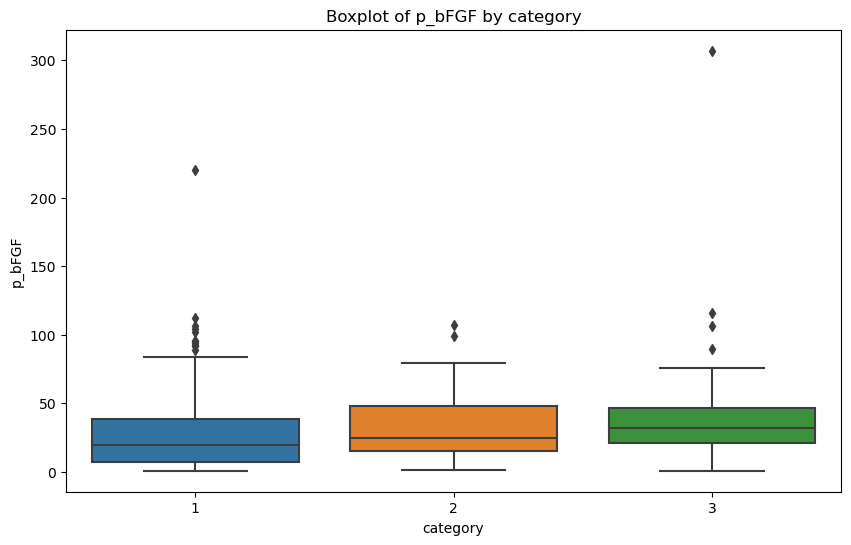

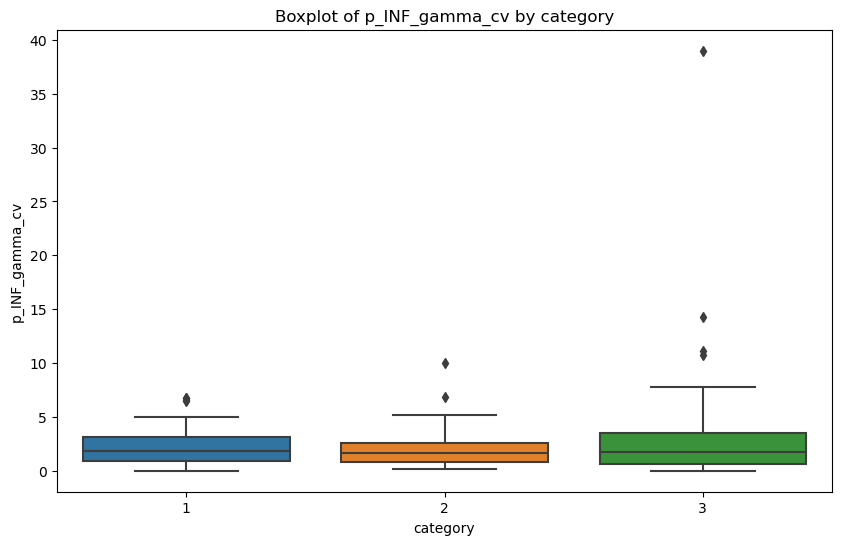

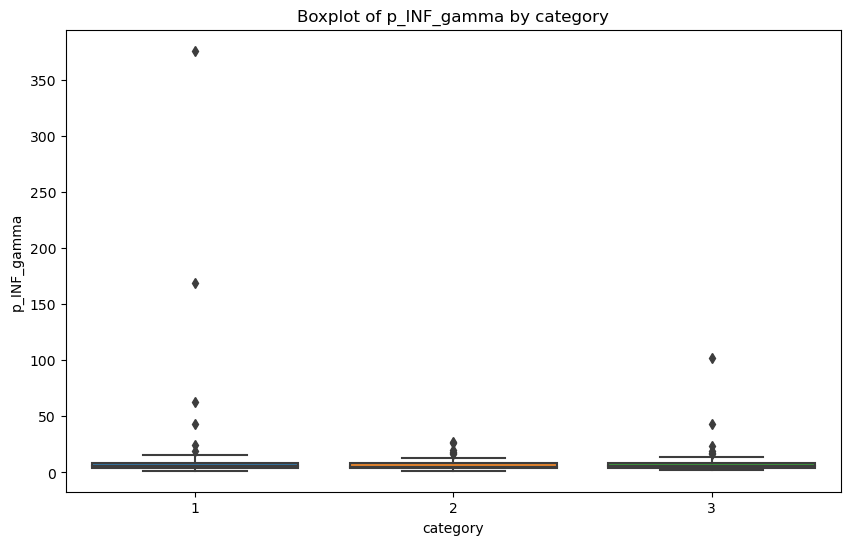

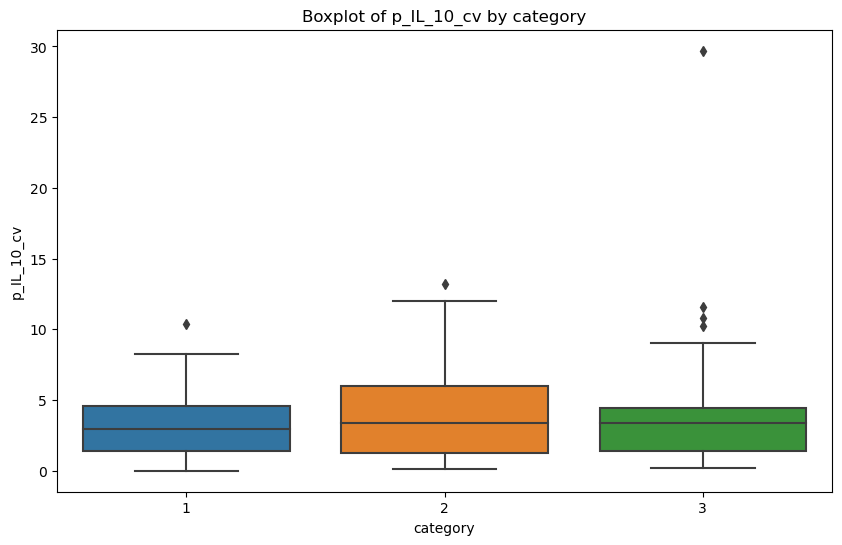

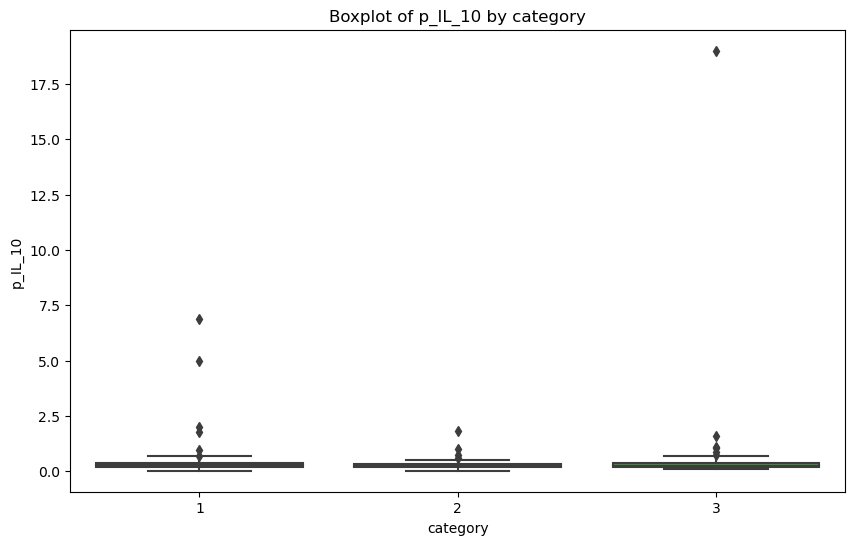

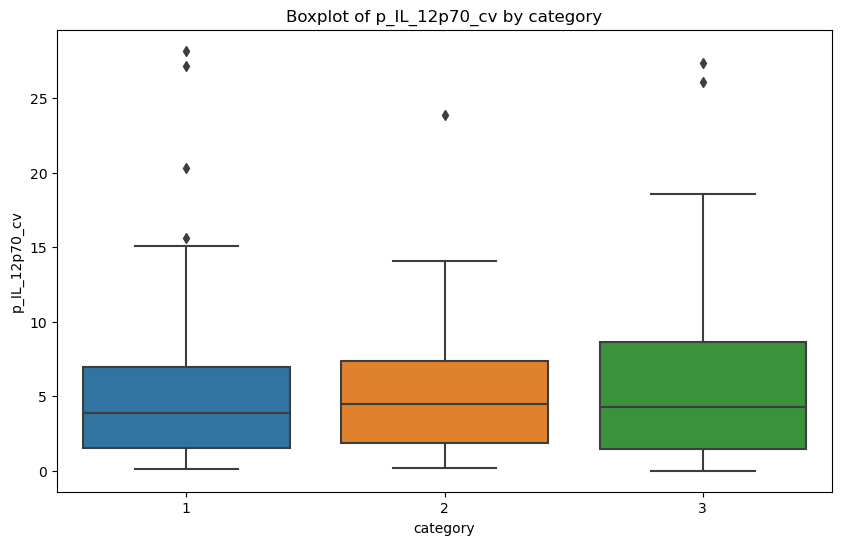

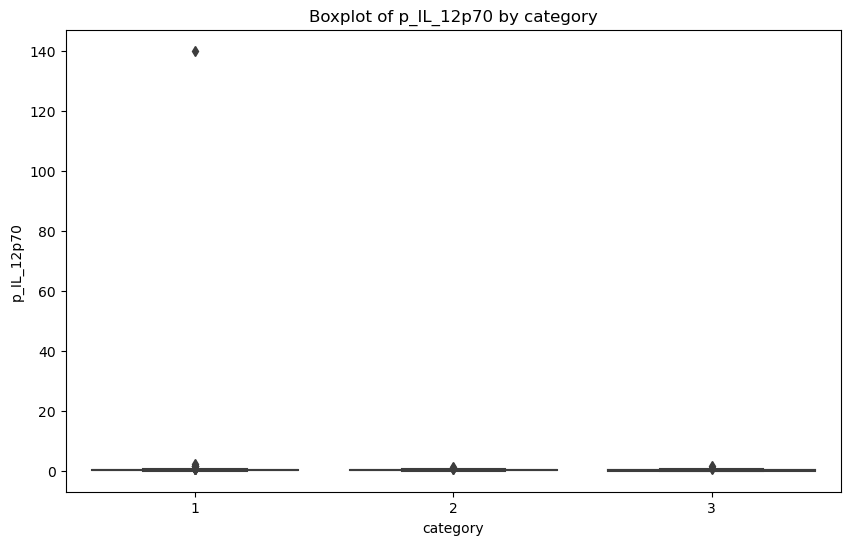

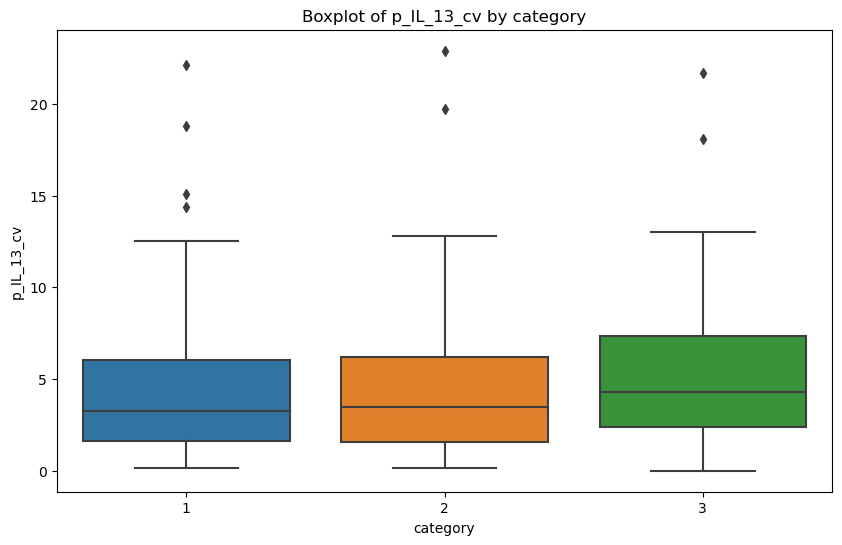

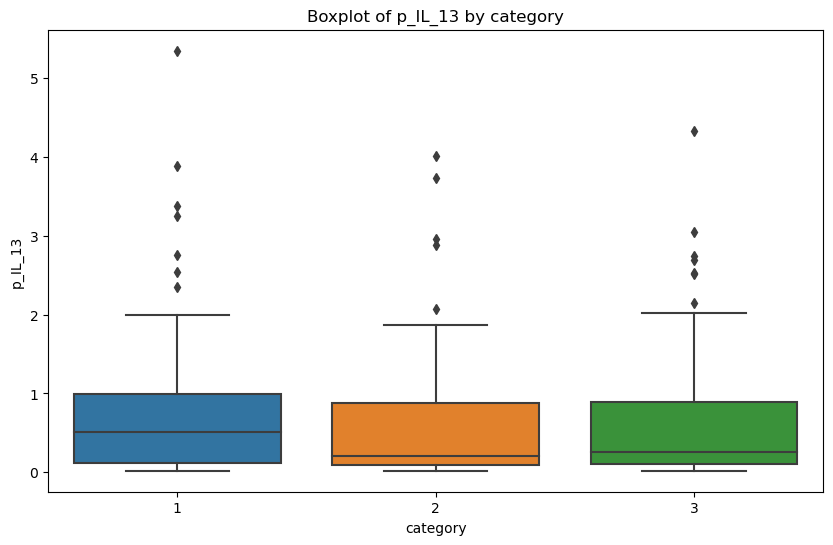

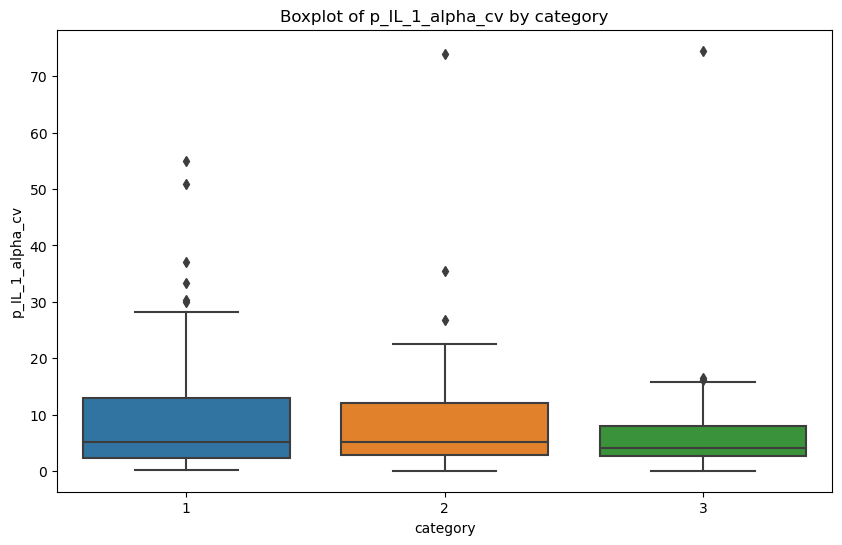

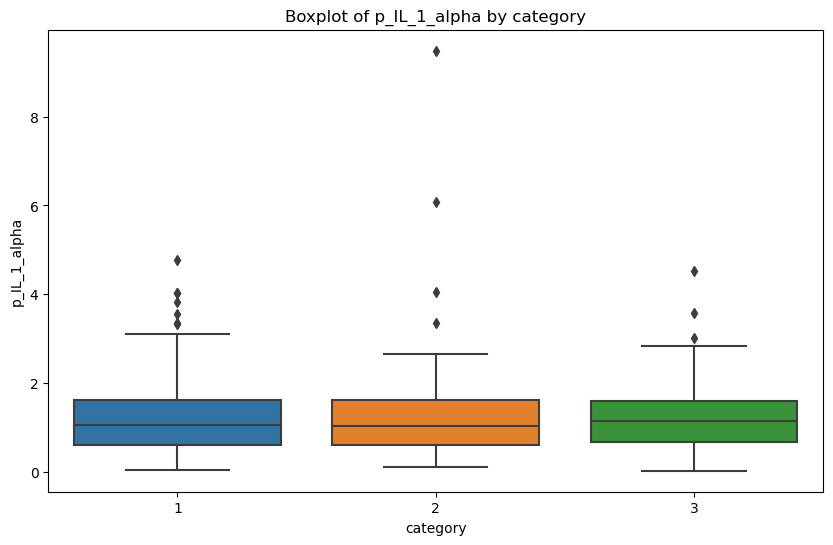

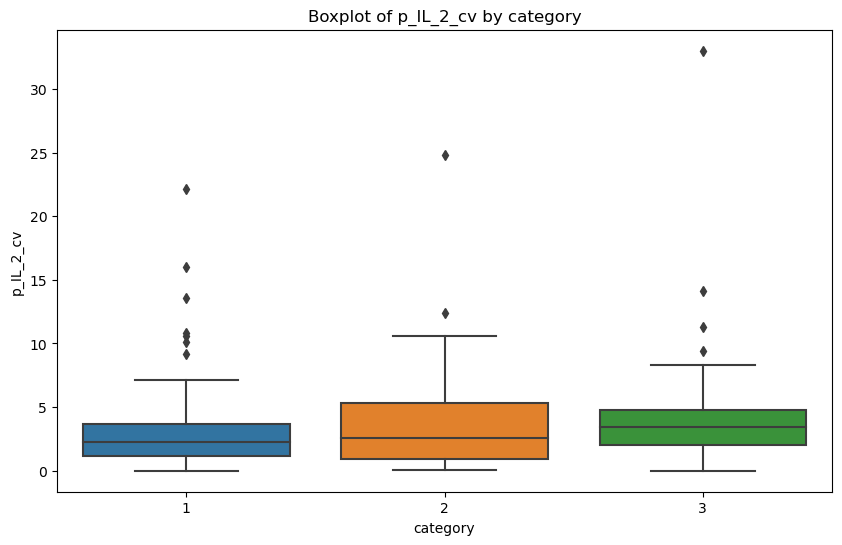

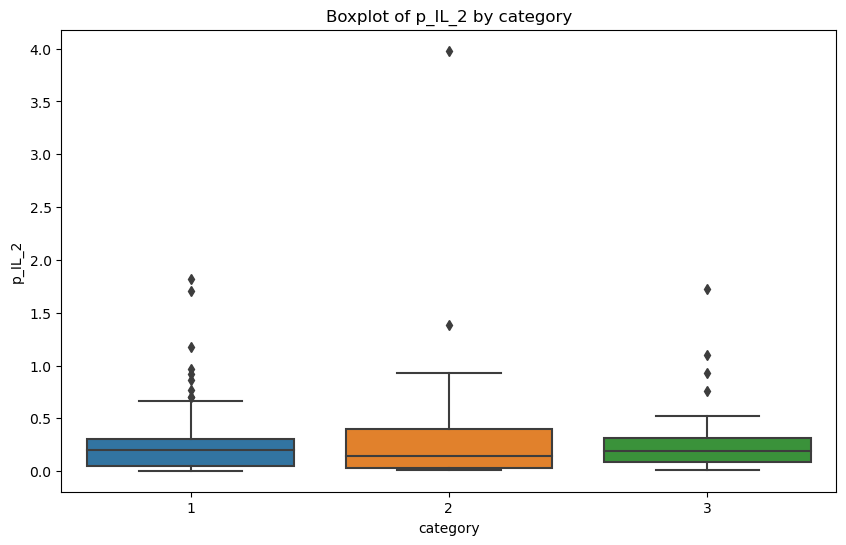

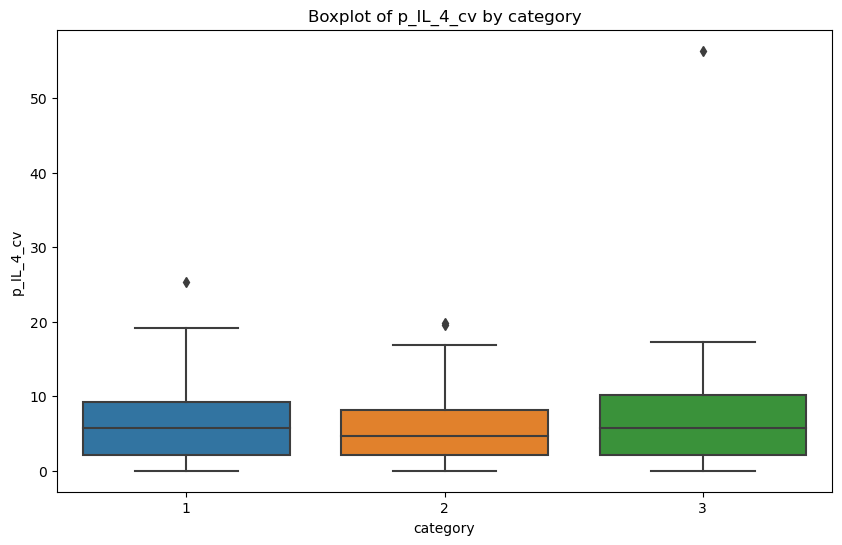

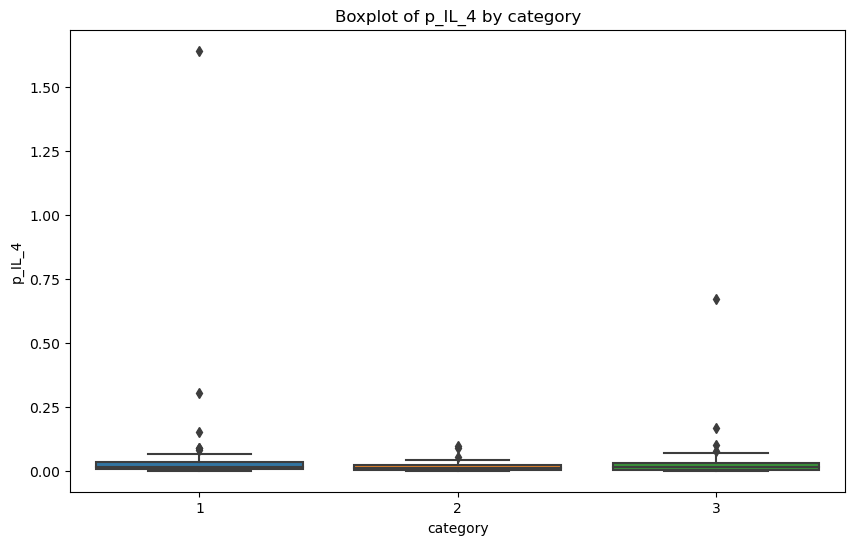

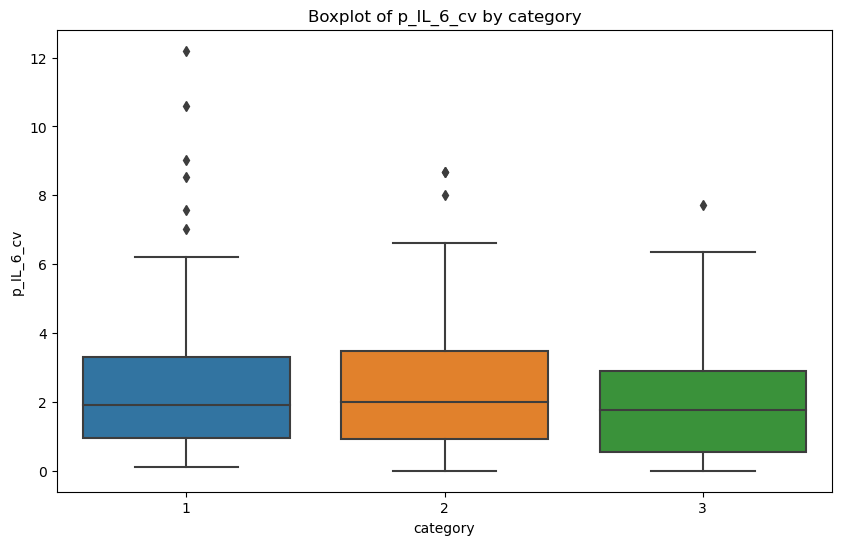

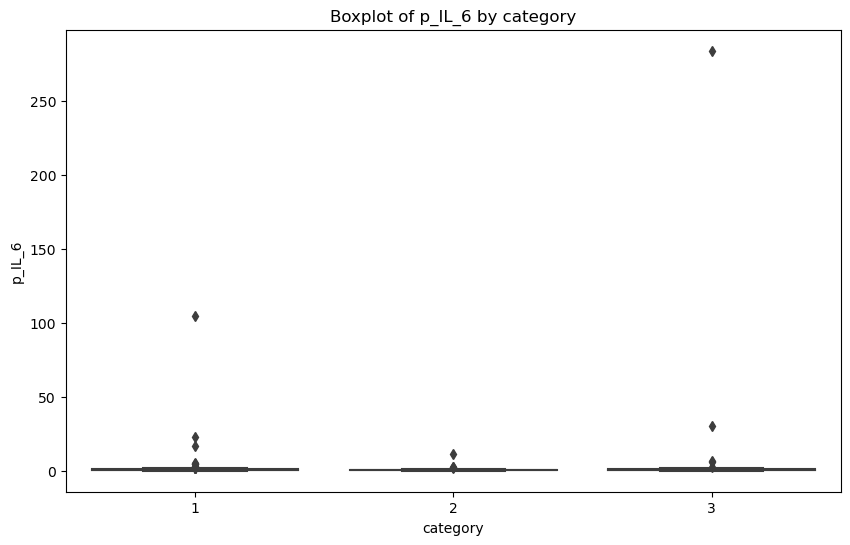

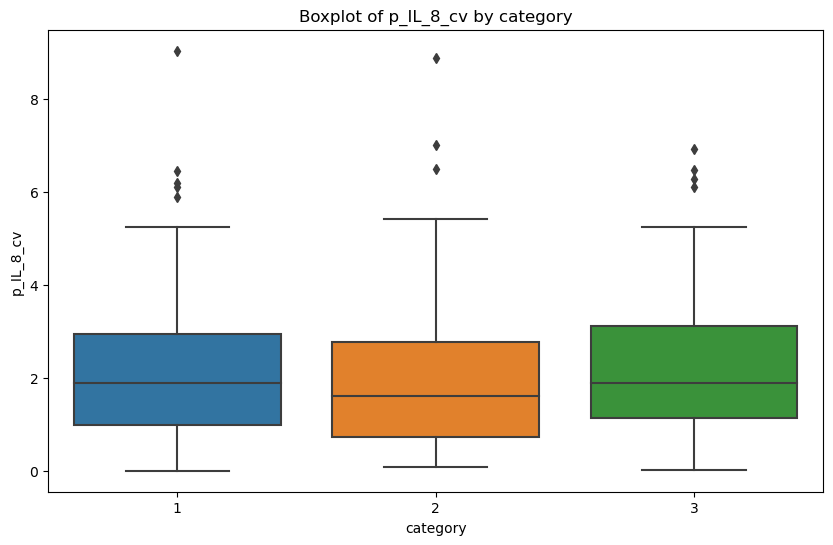

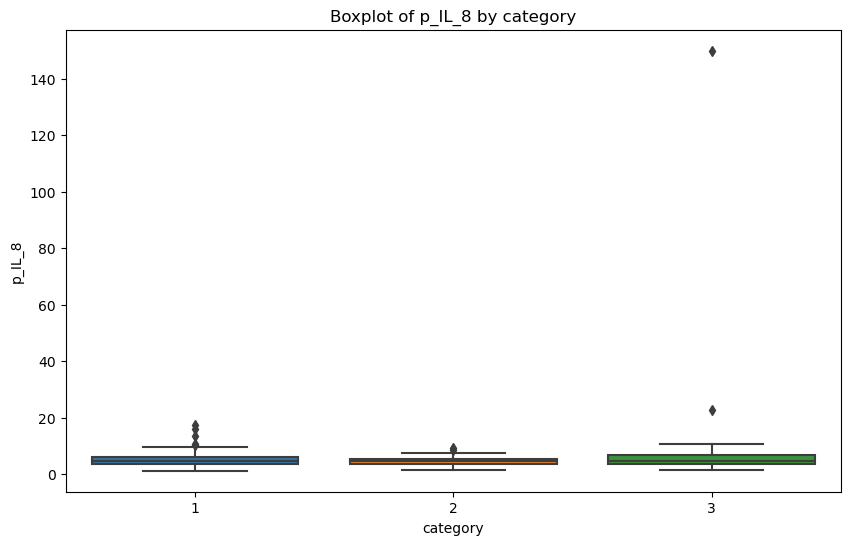

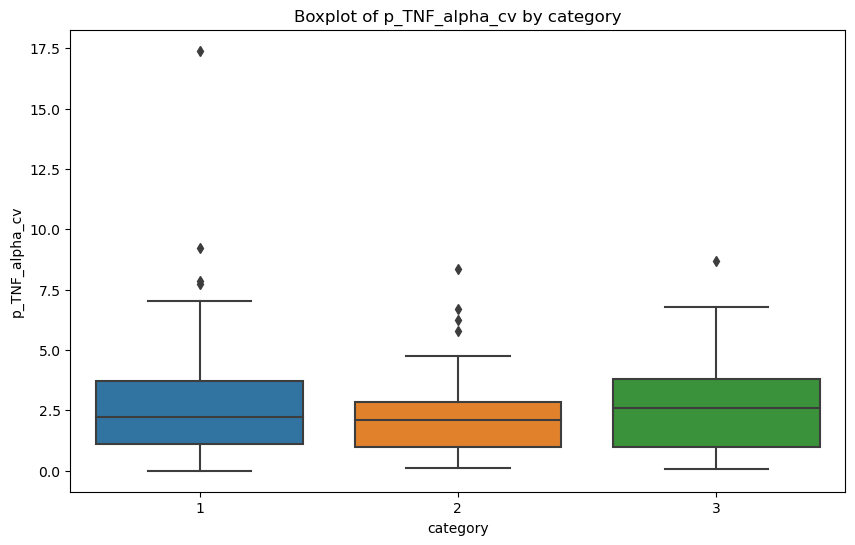

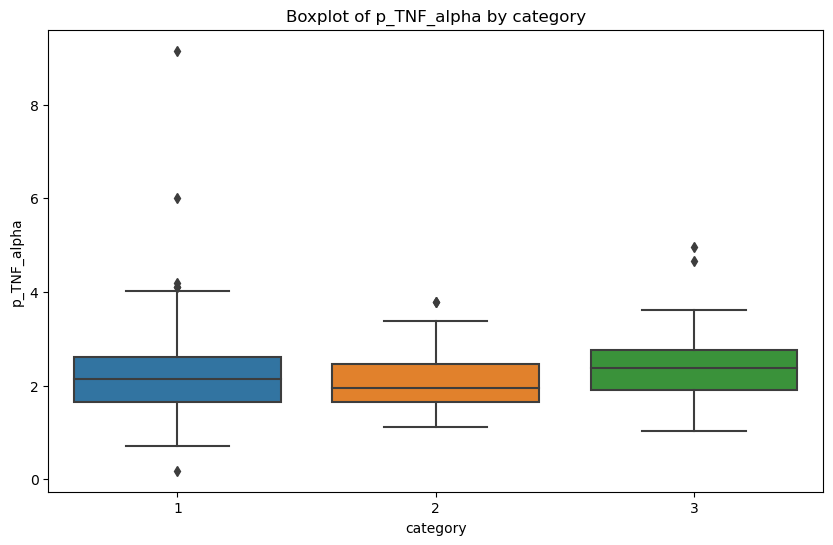

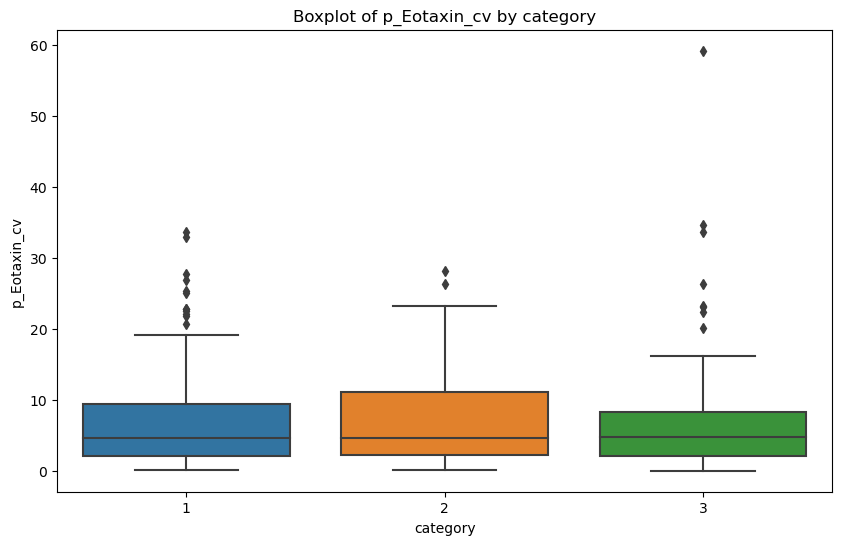

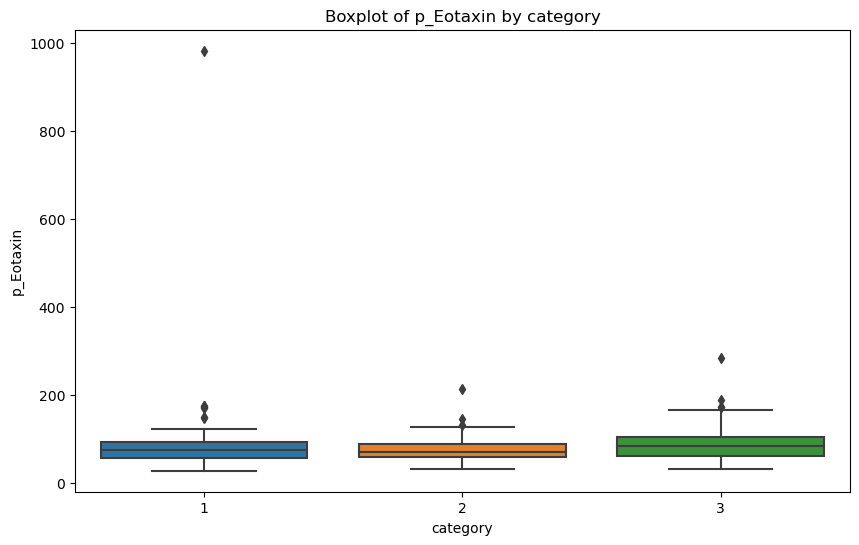

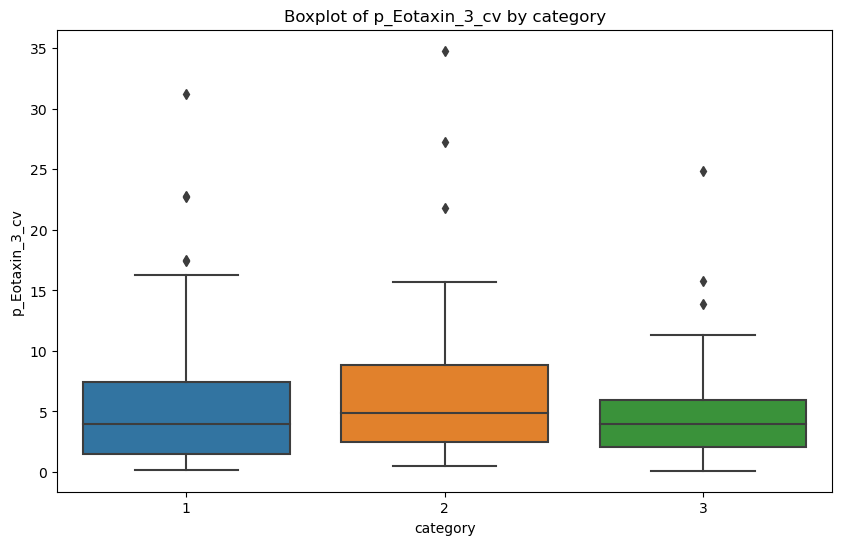

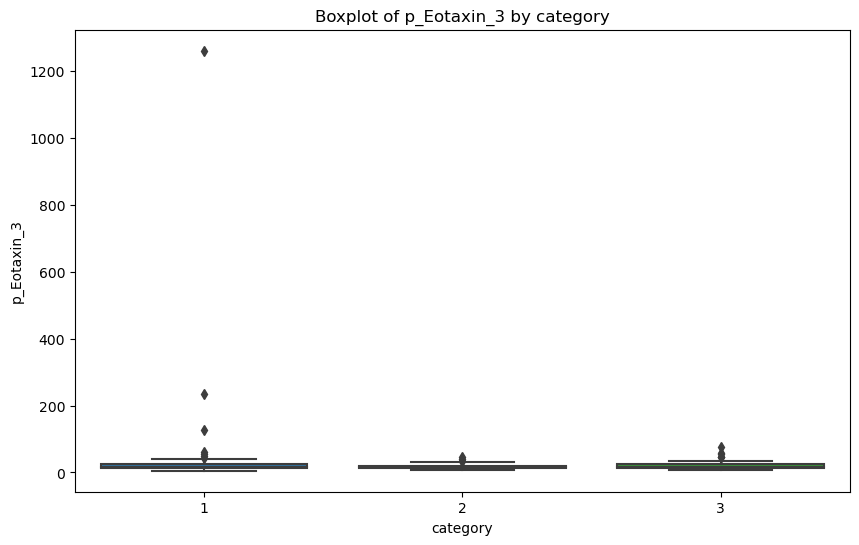

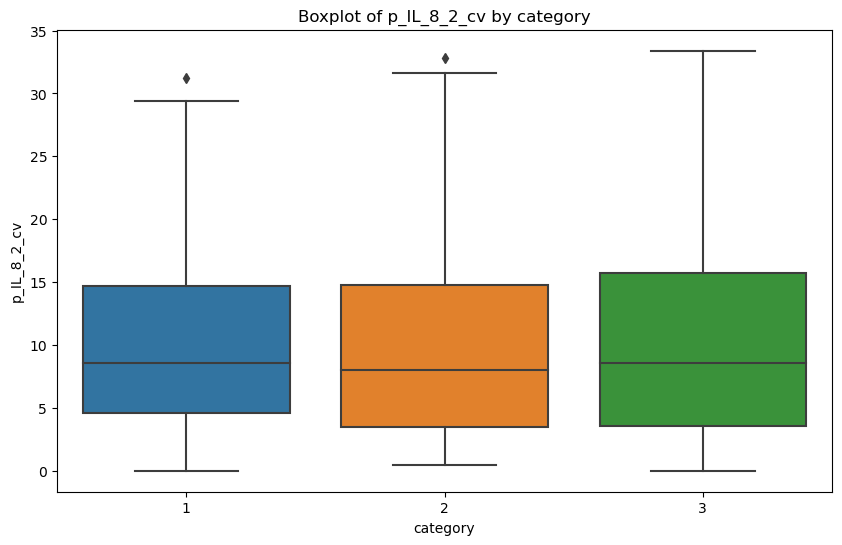

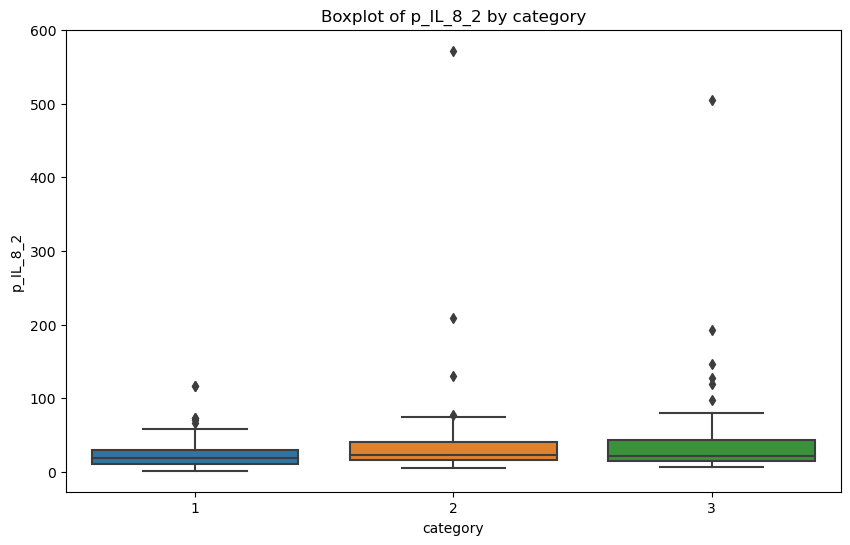

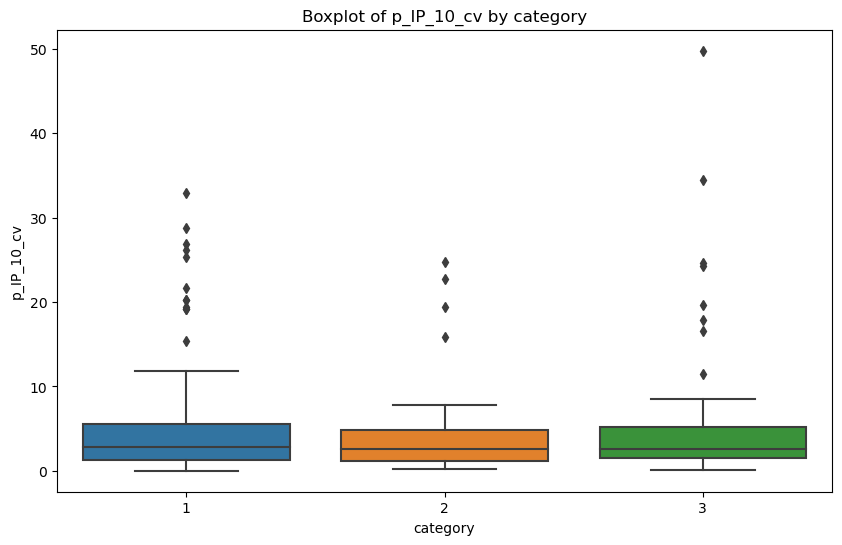

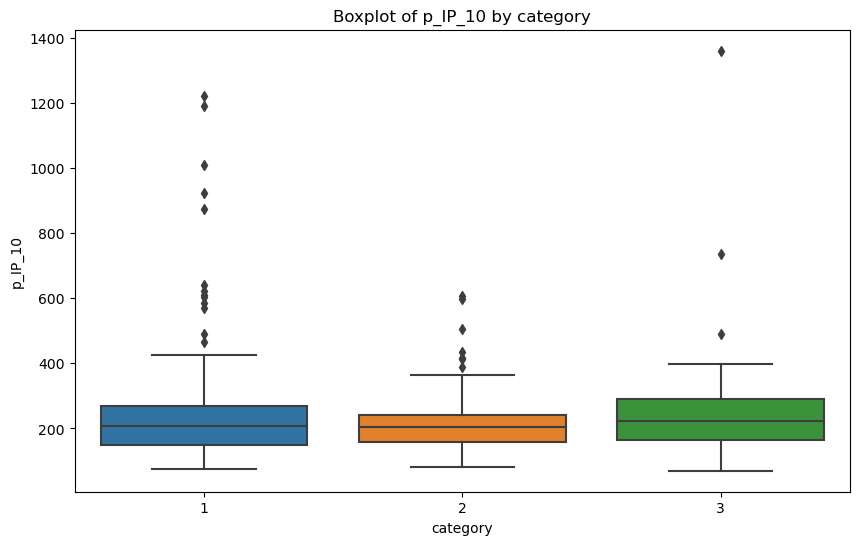

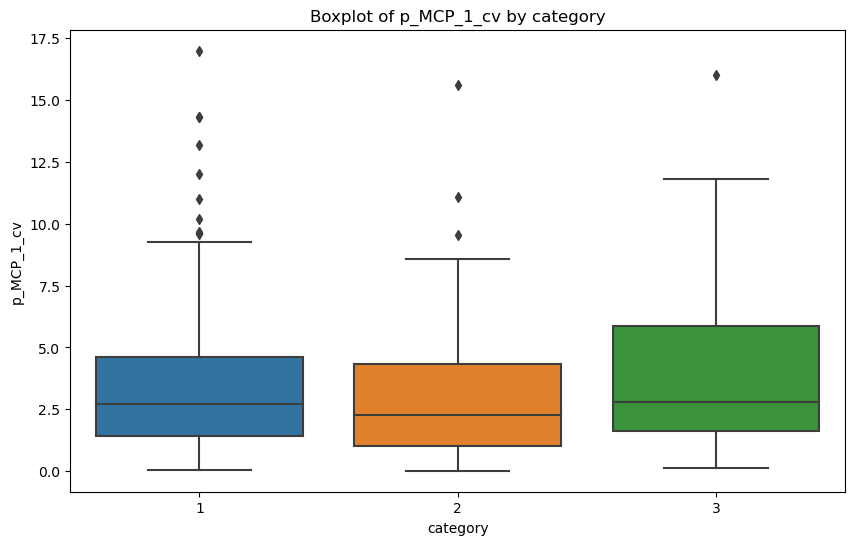

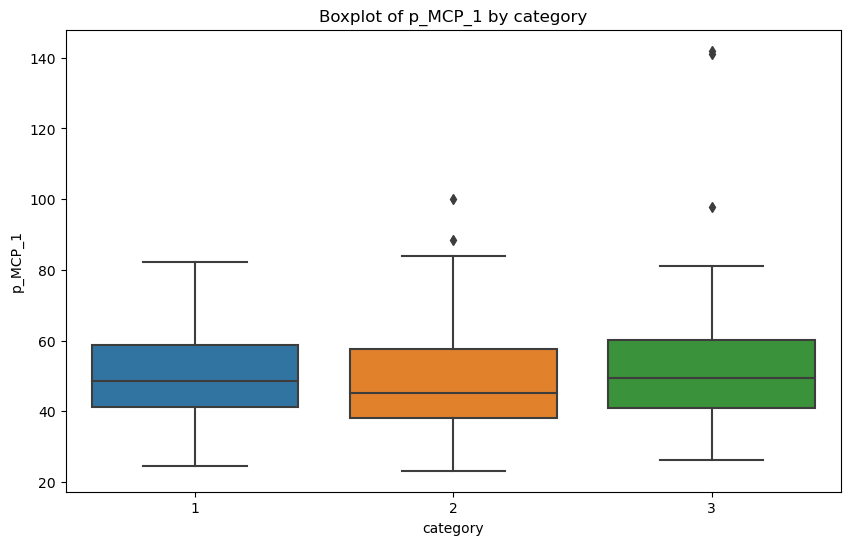

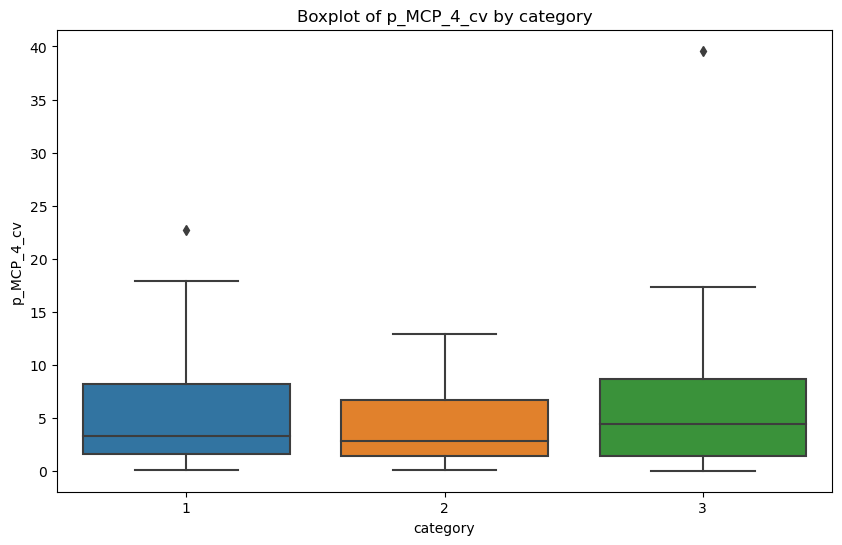

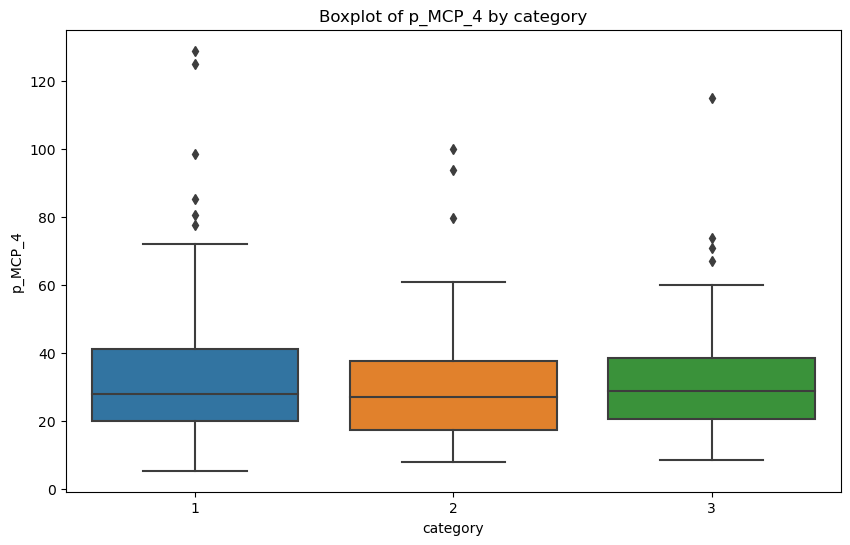

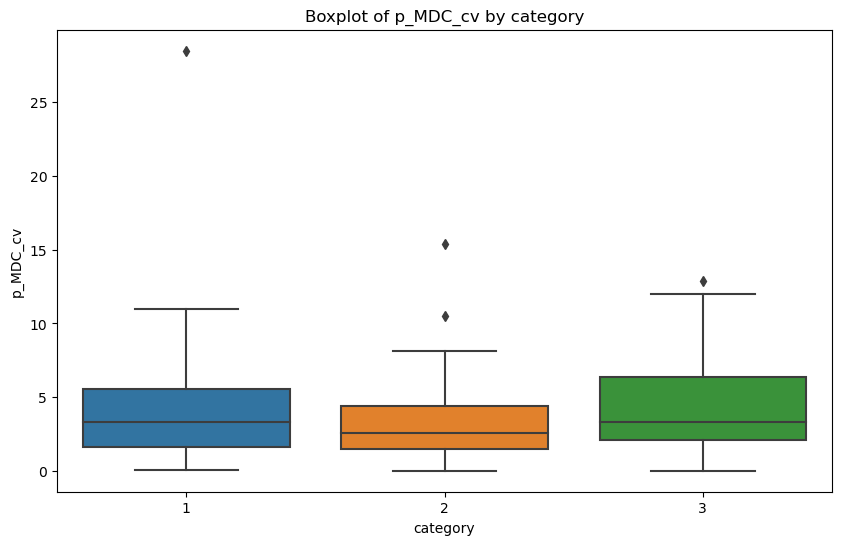

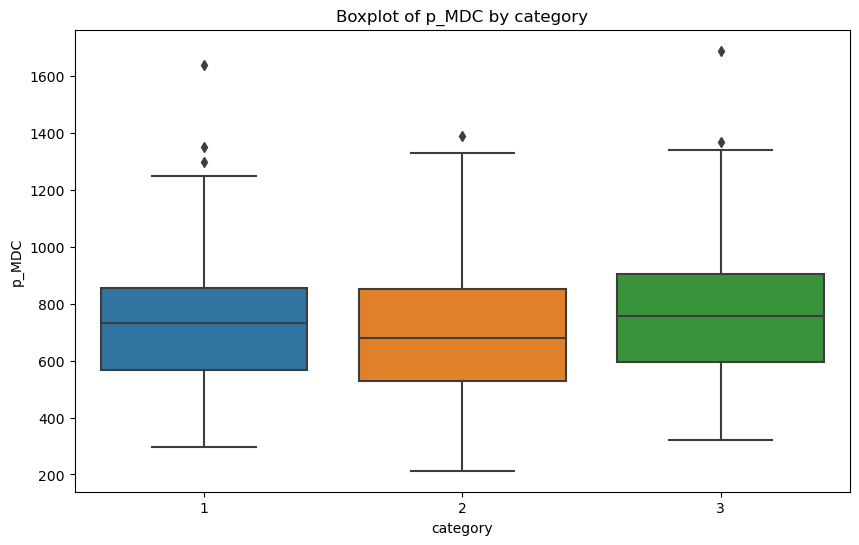

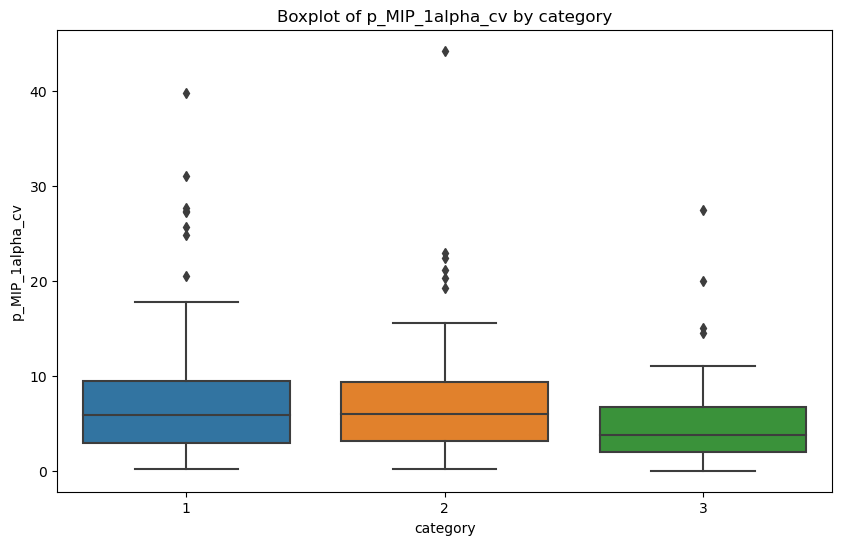

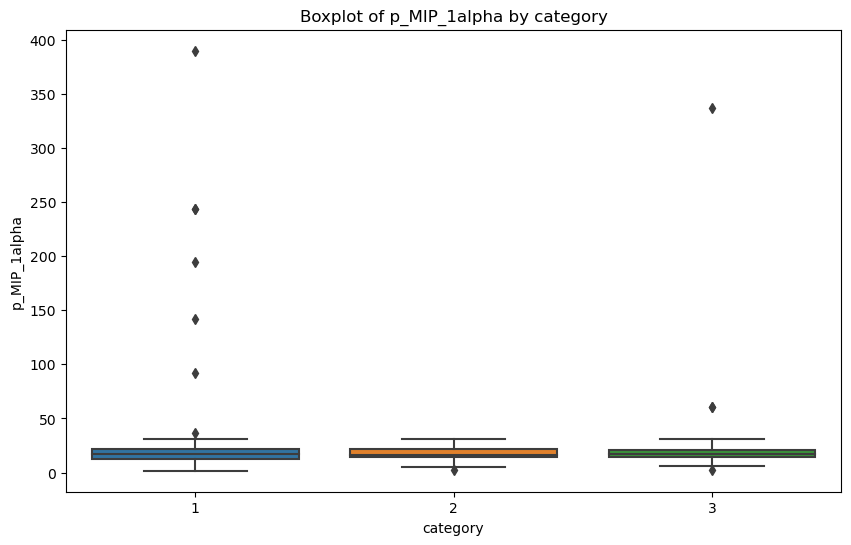

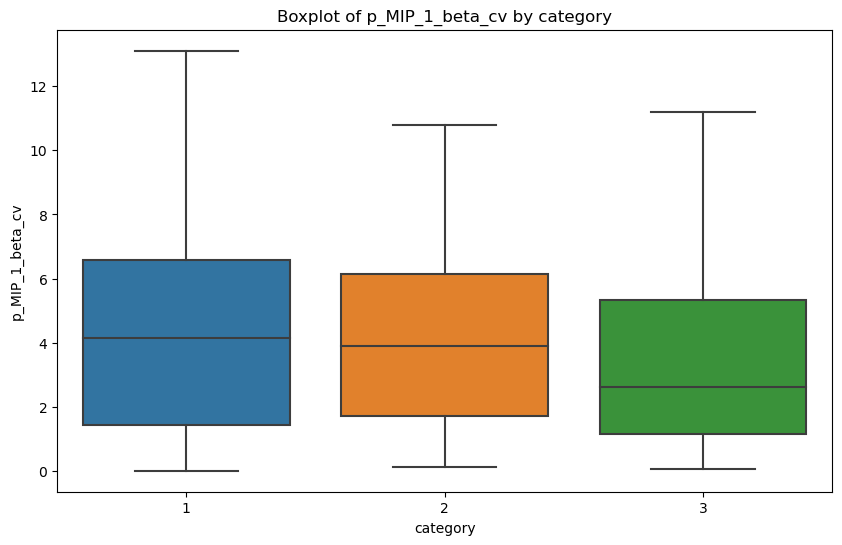

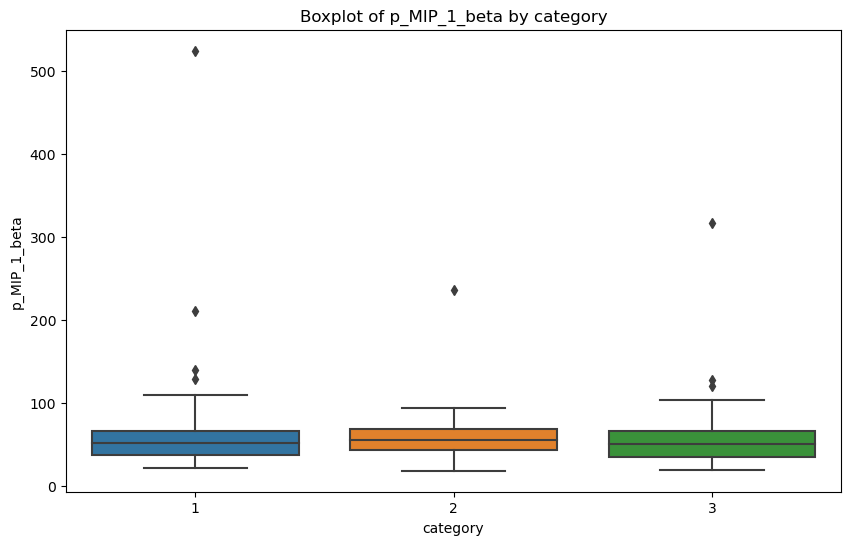

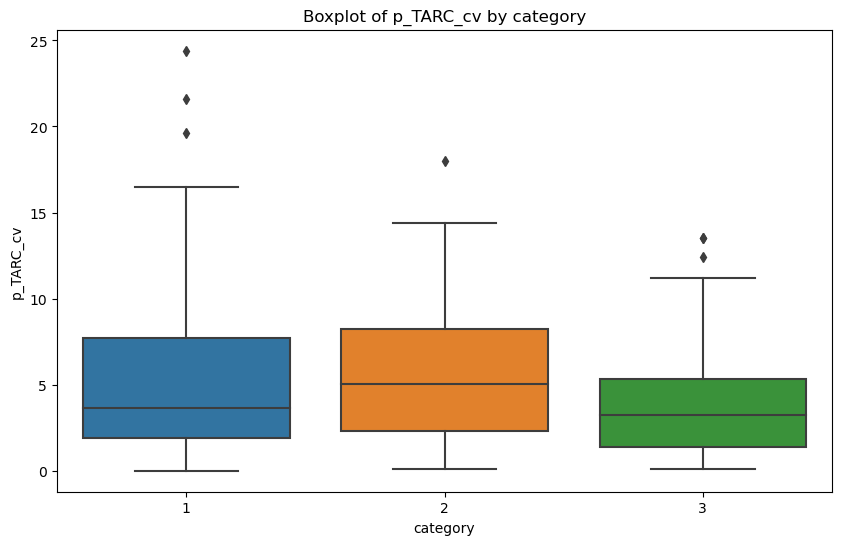

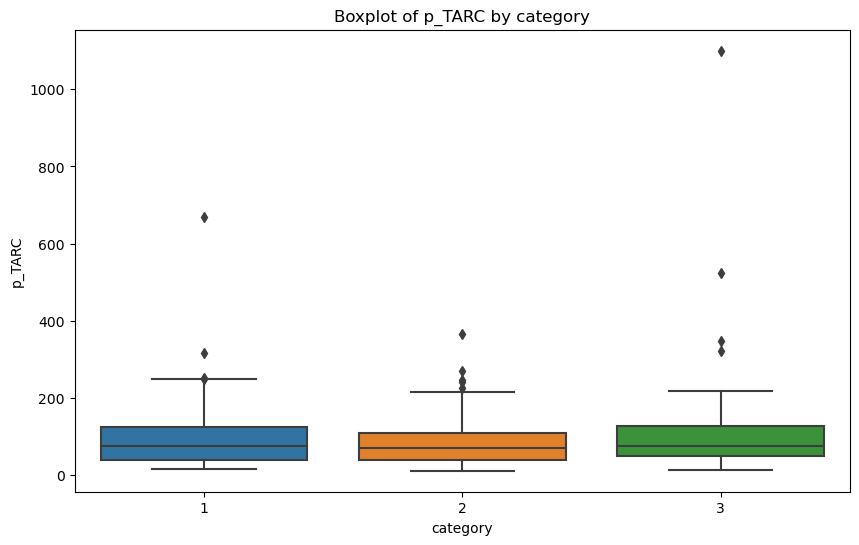

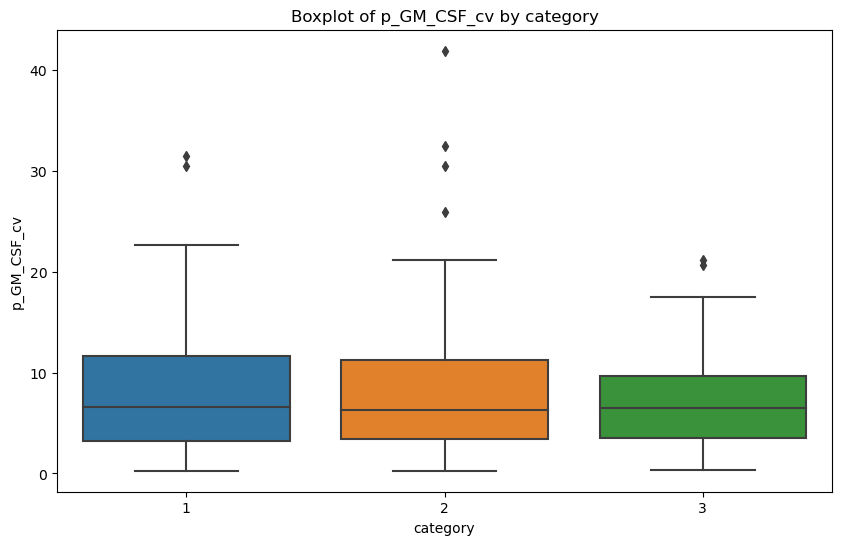

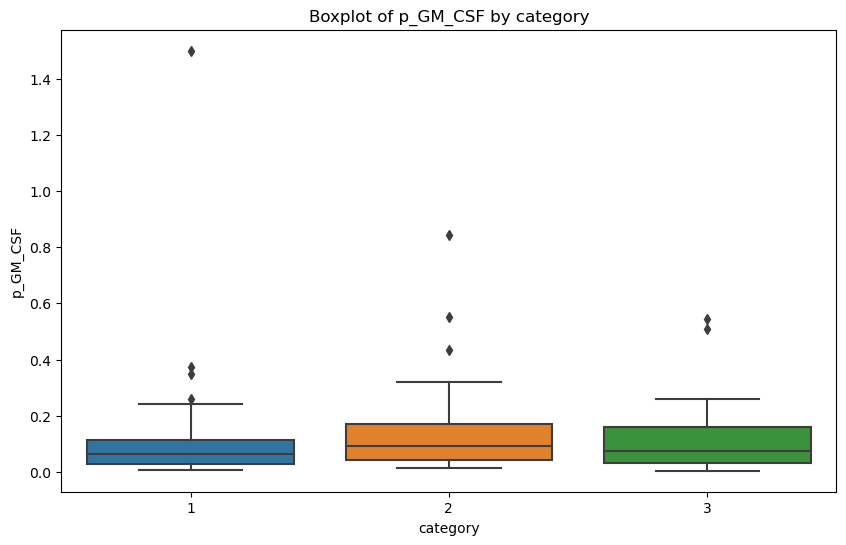

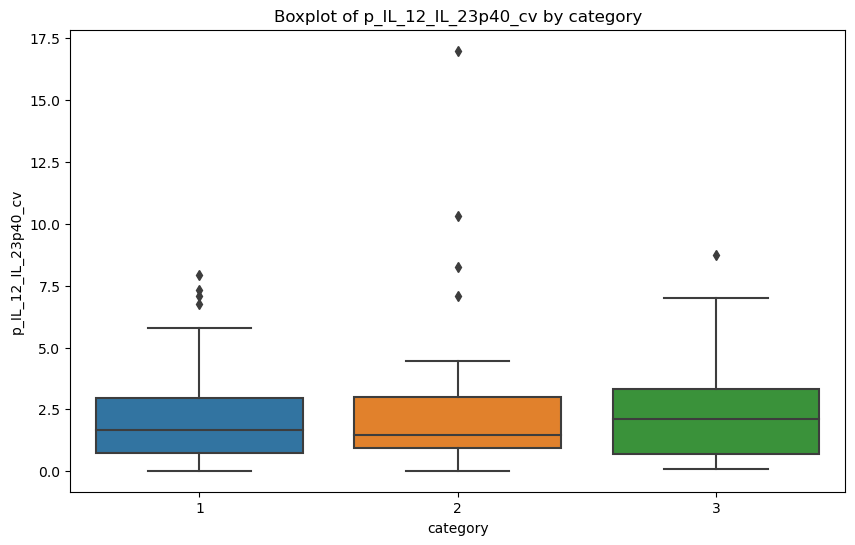

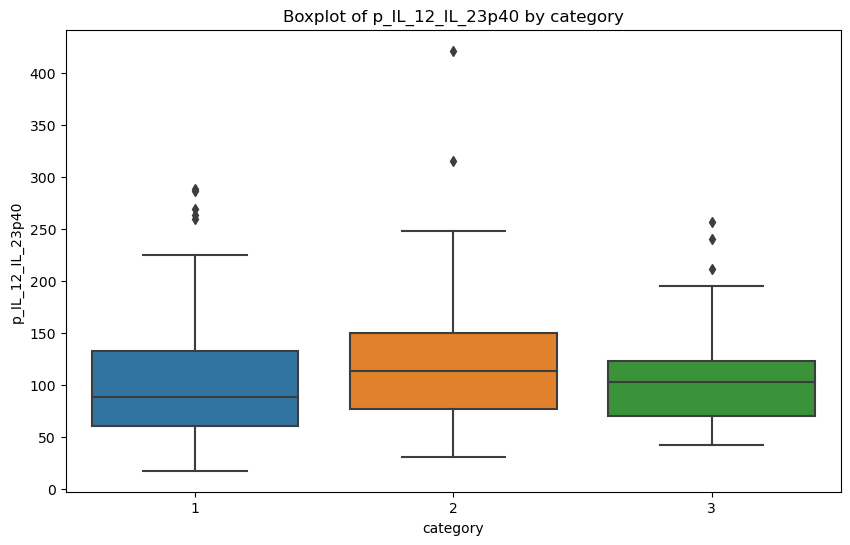

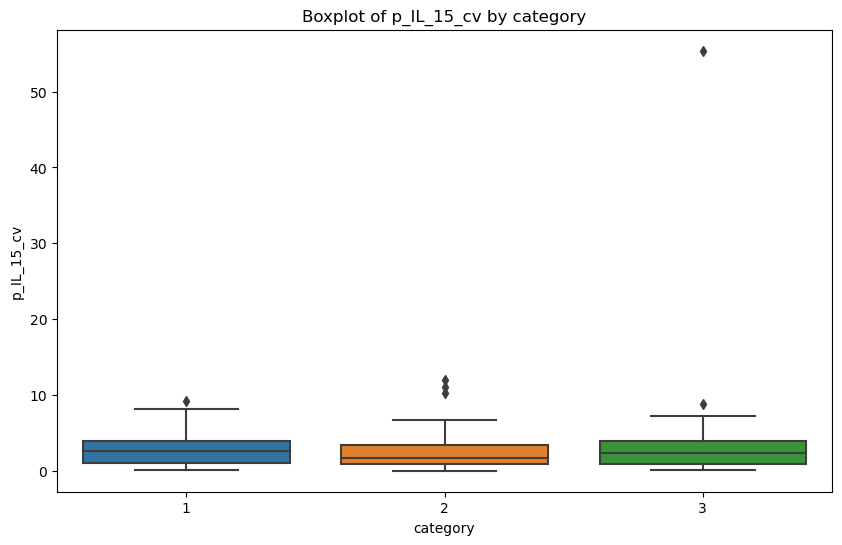

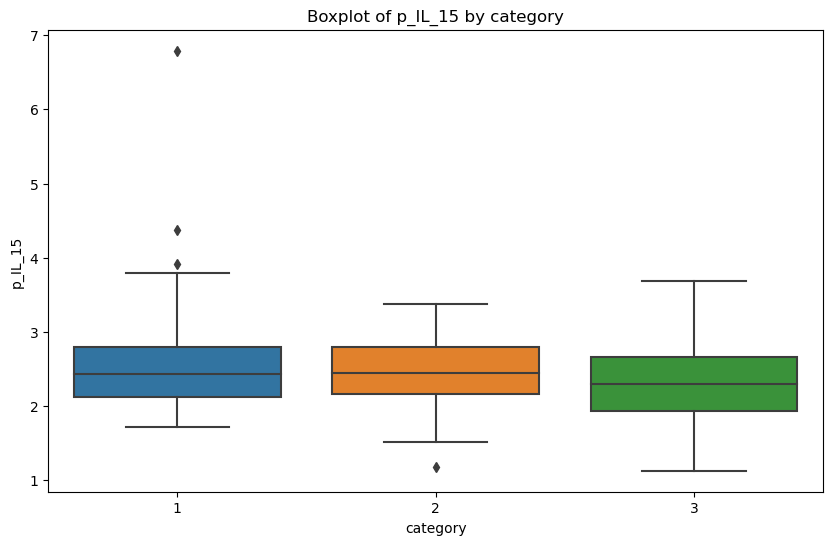

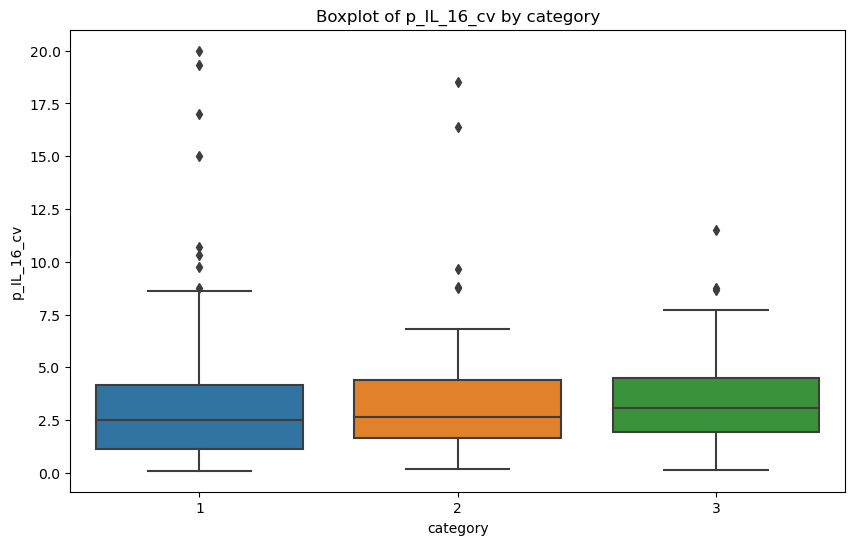

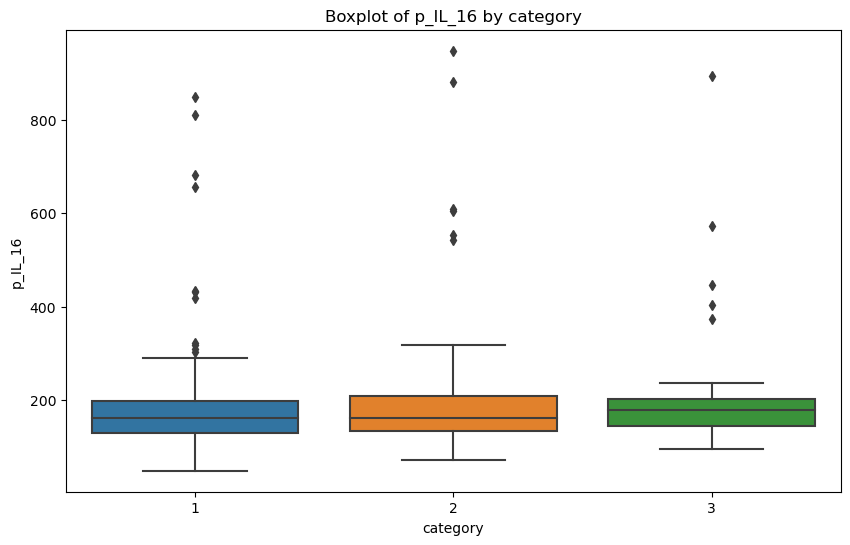

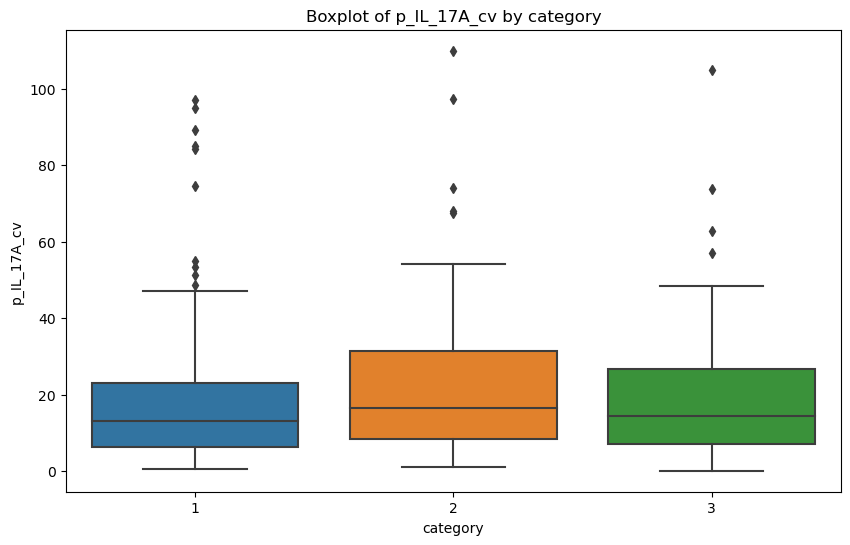

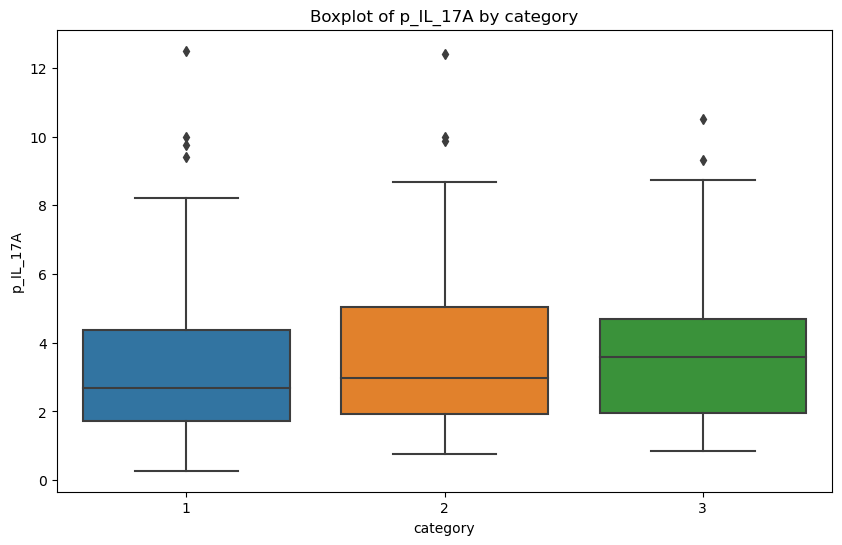

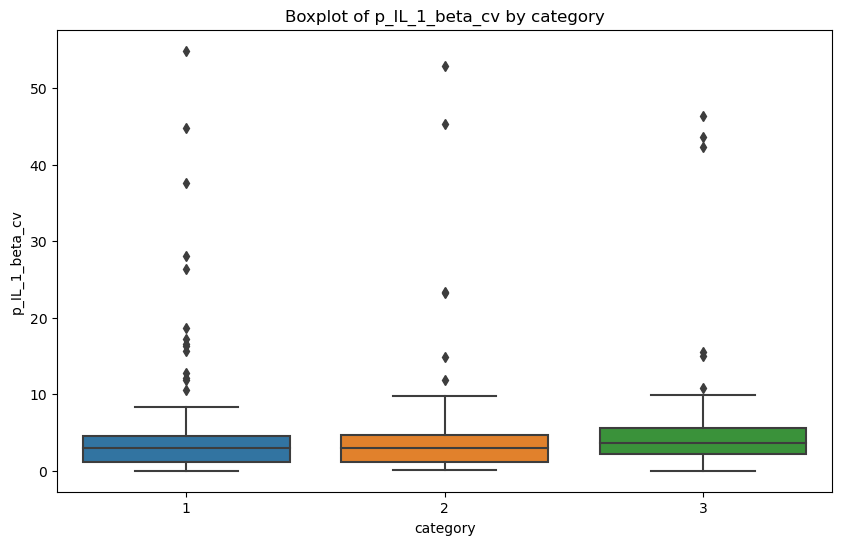

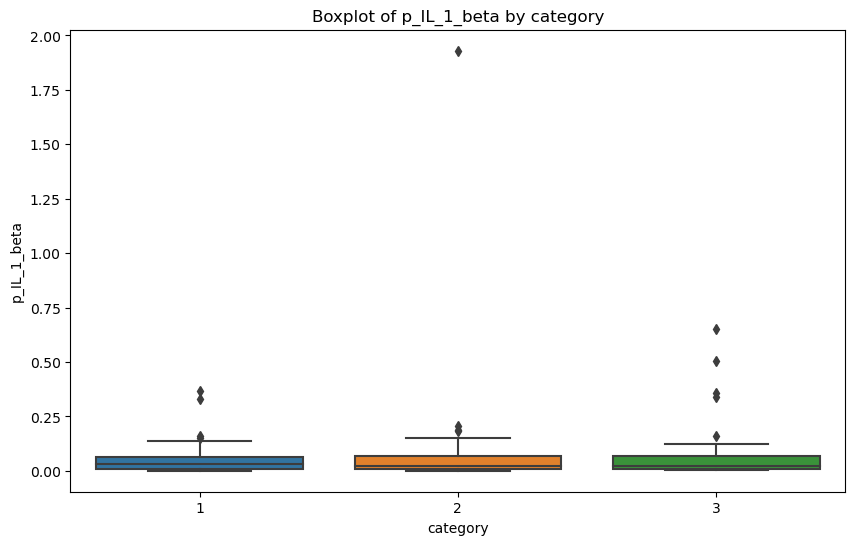

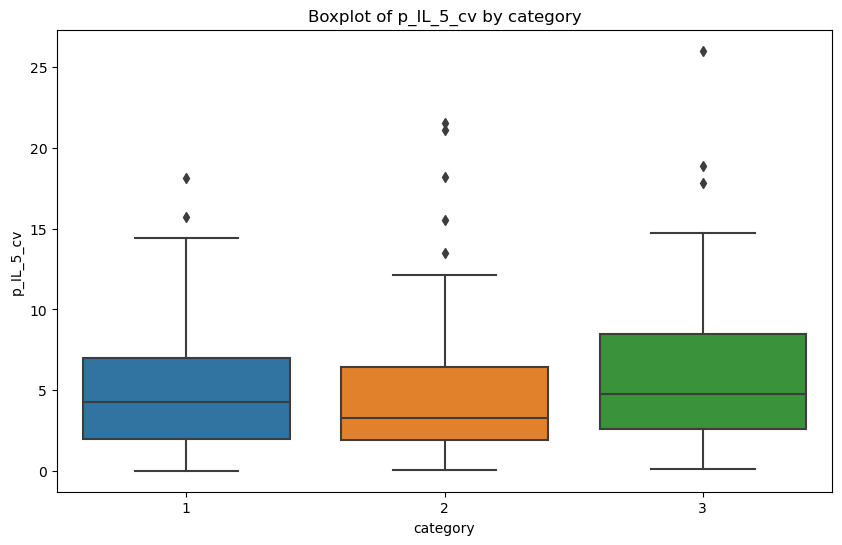

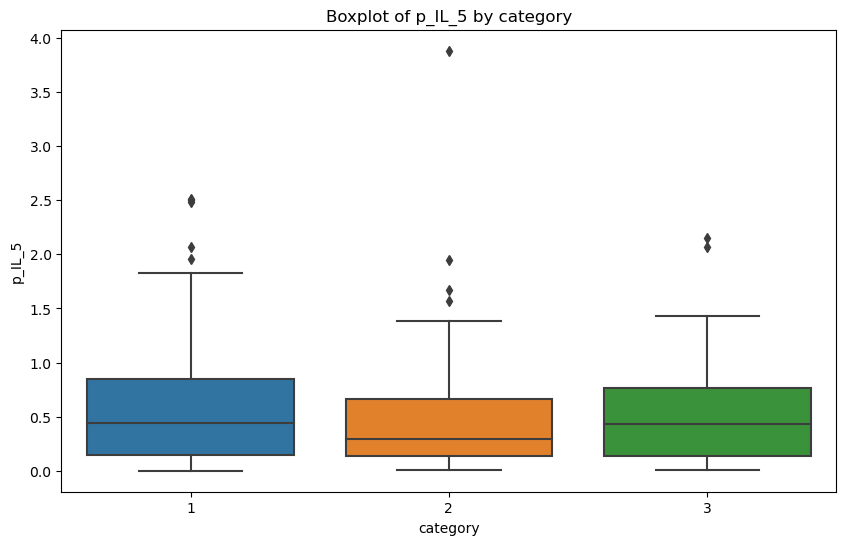

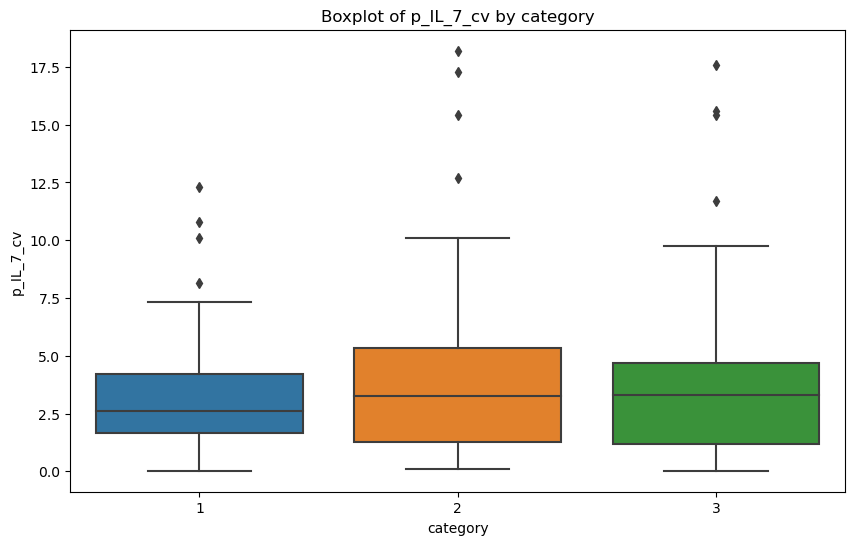

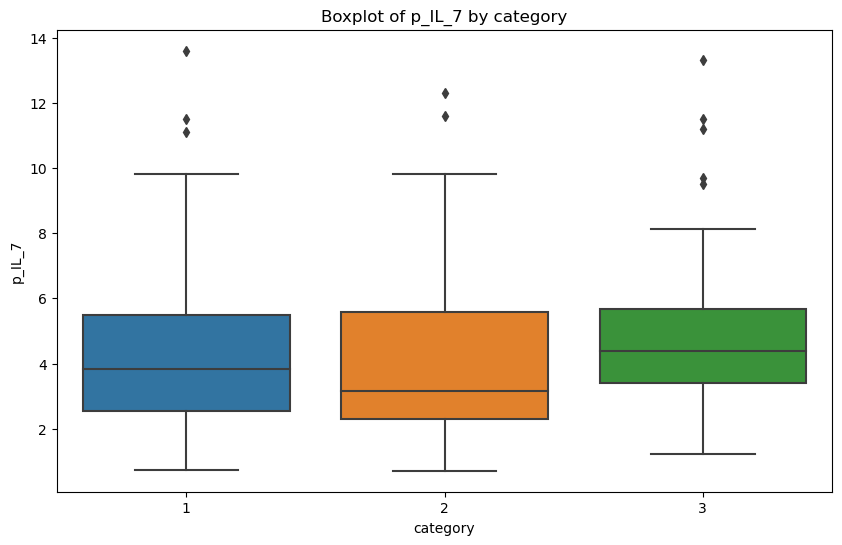

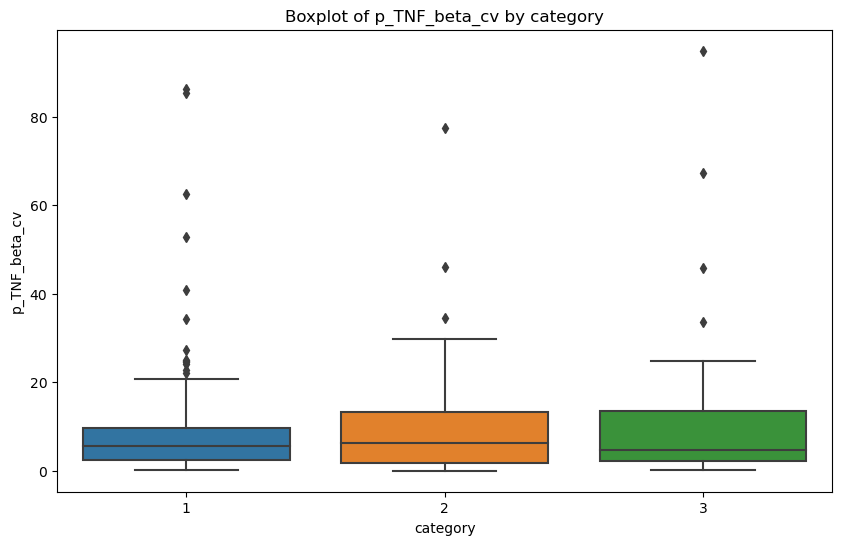

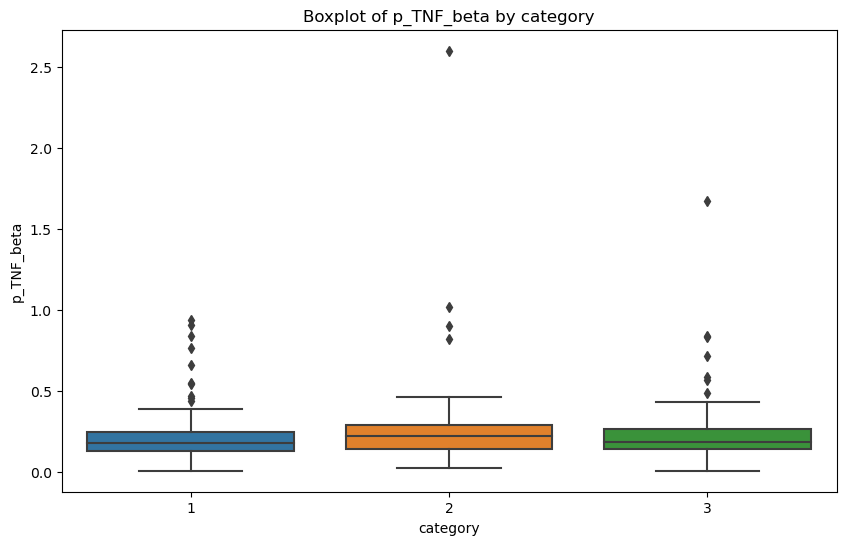

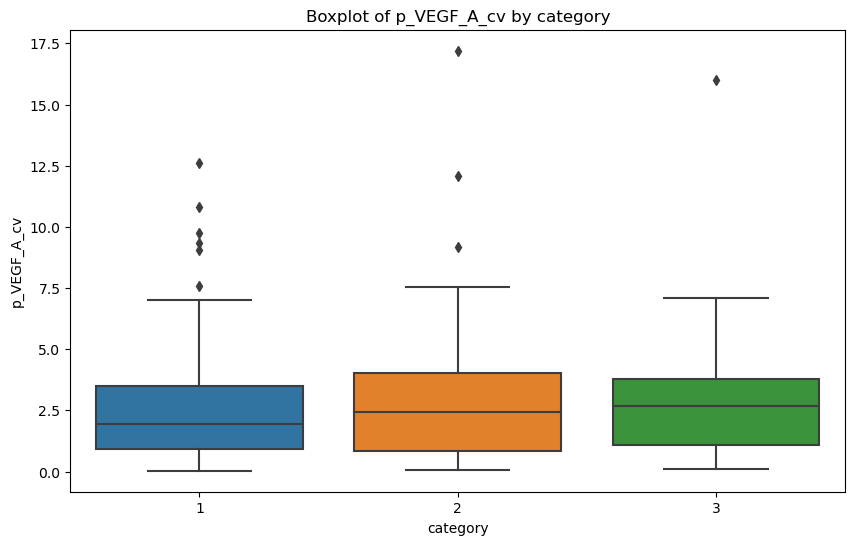

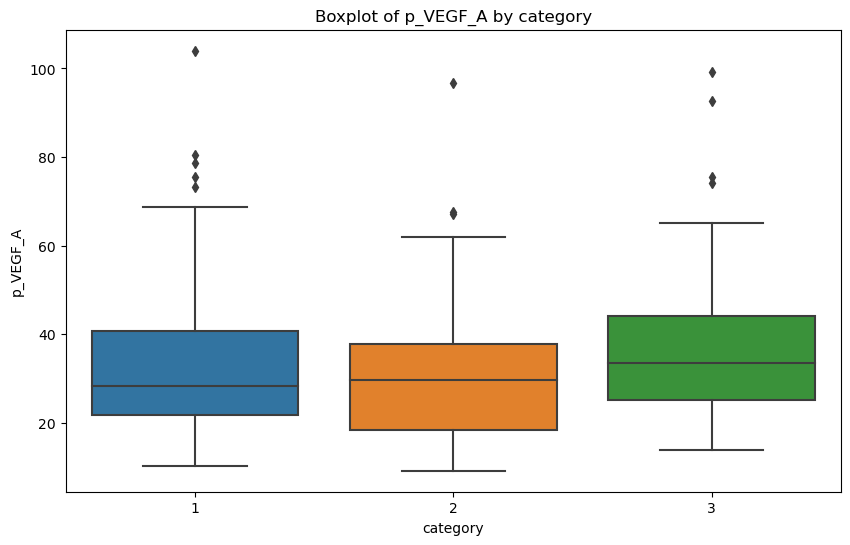

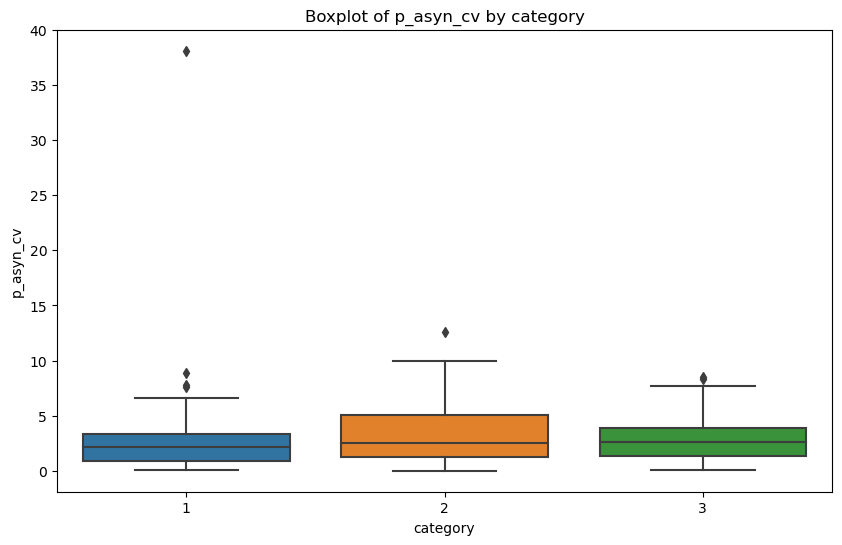

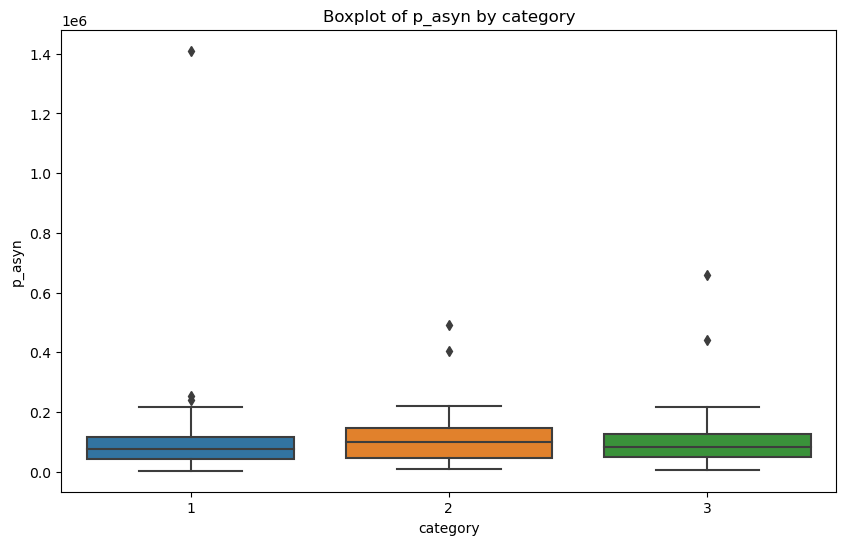

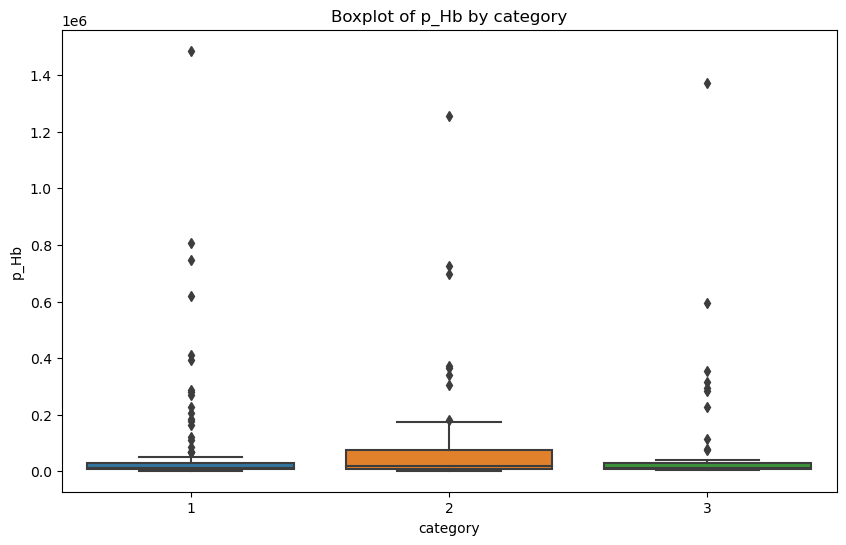

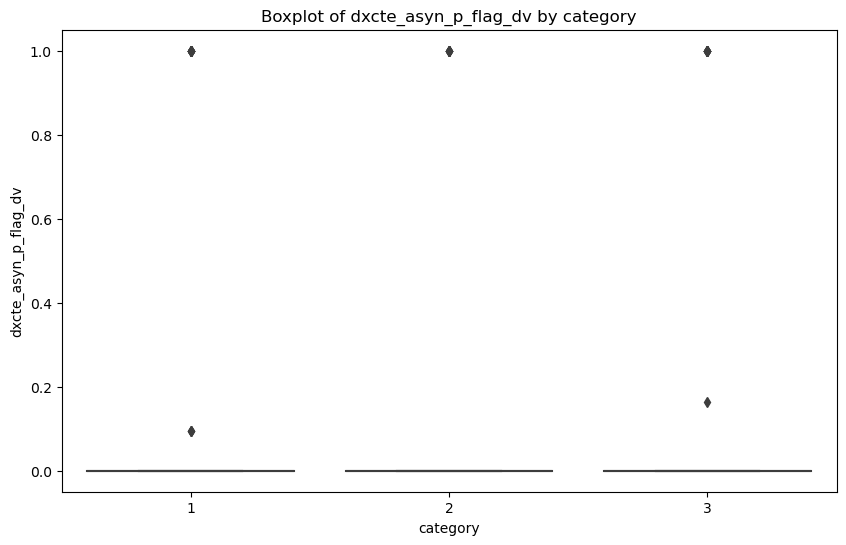

In [22]:
bloodbiomk2['category'] = briefa['category']

correlation_matrix = bloodbiomk2.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

# Alternatively, scatter plots for each feature vs y (checkin_bin)
for feature in bloodbiomk2.columns[:-1]:  # Exclude the label column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='category', y=feature, data=bloodbiomk2)
    plt.title(f'Boxplot of {feature} by category')
    plt.xlabel('category')
    plt.ylabel(feature)
    plt.show()


In [26]:
doc = Document()
doc.add_heading('BloodBiomark2 and Briefa Correlation Analysis', level=1)

for feature in bloodbiomk2.columns[:-1]:  
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='category', y=feature, data=bloodbiomk2)
    plt.title(f'Boxplot of {feature} by category')
    
    plt.savefig('temp_plot.png', bbox_inches='tight')
    plt.close()  # Close the plot to free memory

    doc.add_picture('temp_plot.png', width=Inches(5.5))
    doc.add_paragraph(f'Boxplot of {feature} by category')

doc.save('bloodbiomk2_briefa_correlation_analysis.docx')

In [27]:
bloodbiomk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Columns: 119 entries, Qalb to category
dtypes: float64(118), int64(1)
memory usage: 219.5 KB


In [28]:
pd.DataFrame(X_test_scaled)

0         1         2         3         4         5         6    \
0   0.310284  0.358982  0.294830  0.008433  0.034417  0.008259  0.000000   
1   0.299667  0.284554  0.016560  0.003427  0.028726  0.006599  0.059556   
2   0.410544  0.268392  0.043979  0.097301  0.015528  0.010708  0.084000   
3   0.284601  0.429887  0.185780  0.008340  0.033604  0.005381  0.038000   
4   0.133429  0.385926  0.222362  0.003754  0.000000  0.005197  0.163333   
..       ...       ...       ...       ...       ...       ...       ...   
66  0.128309  0.457895  0.345000  0.087951  0.046070  0.006150  0.047778   
67  0.284601  0.429887  0.484362  0.006797  0.084282  0.008667  0.082000   
68  0.576850  0.221867  0.148152  0.003034  0.015312  0.002034  0.104444   
69  0.202641  0.449214  0.064535  0.000556  0.222222  0.001993  0.204222   
70  0.310284  0.358982  0.116099  0.101976  0.252575  0.007919  0.015422   

         7         8         9    ...       108       109       110       111  \
0   0.122478  0.062393  0.495018  ...  0.063554  0.115615  0.031978  0.073735   
1   0.073274  0.034473  0.544912  ...  0.239619  0.426198  0.014363  0.090702   
2   0.486726  0.152422  0.658306  ...  0.064654  0.423092  0.054868  0.110369   
3   0.033593  0.504274  0.520721  ...  0.065755  0.062815  0.055396  0.145461   
4   0.056637  0.670940  0.250087  ...  0.193402  0.077568  0.041261  0.057539   
..       ...       ...       ...  ...       ...       ...       ...       ...   
66  0.014903  0.108262  0.197170  ...  0.111972  0.499185  0.149803  0.077977   
67  0.049558  0.036752  0.186586  ...  0.003582  0.382716  0.018898  0.054068   
68  0.076106  0.072222  0.197170  ...  0.278133  0.235966  0.070374  0.120781   
69  0.054867  0.284900  0.177515  ...  0.278683  0.170743  0.042527  0.052140   
70  0.082478  0.075641  0.337778  ...  0.229165  0.237518  0.353386  0.273102   

         112       113       114       115       116  117  
0   0.041727  0.232506  0.067756  0.046929  0.000794  0.0  
1   0.183866  0.406321  0.039141  0.115997 -0.000389  0.0  
2   0.148914  1.054176  0.089021  0.166006  0.005809  0.0  
3   0.206002  0.066591  0.113699  0.068275  0.009850  0.0  
4   0.374938  0.135440  0.083508  0.063548  0.001414  0.0  
..       ...       ...       ...       ...       ...  ...  
66  0.025358  0.291196  0.133389  0.274257  0.012667  0.0  
67  0.001206  0.247178  0.187207  0.100598 -0.001082  0.0  
68  0.212993  0.072235  0.175394  0.078490  0.007701  0.0  
69  0.006600  0.244921  0.125513  0.035647  0.004447  0.0  
70  0.333578  0.183973  0.053580  0.117064  0.003265  0.0  

[71 rows x 118 columns]

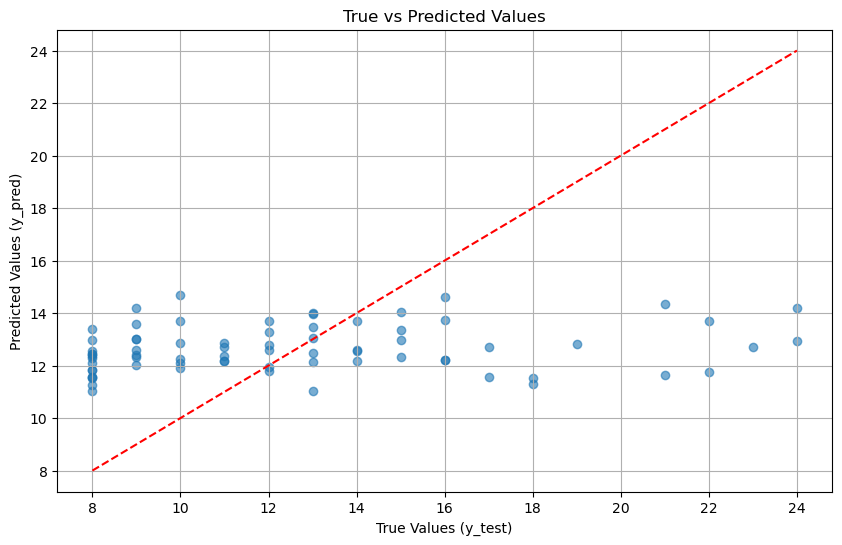

In [29]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined in your loop
# Example for one of the columns, you can adapt this to your loop or specific case

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect predictions
plt.title('True vs Predicted Values')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid()
plt.show()

In [30]:
y_pred_series = pd.Series(y_pred)

print(y_pred_series.describe())

count    71.000000
mean     12.648169
std       0.876692
min      11.030000
25%      12.095000
50%      12.540000
75%      13.165000
max      14.680000
dtype: float64


C:\Users\fargor\AppData\Local\Temp\ipykernel_23800\3013215355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bloodbiomk2['p_IL_23_cv'])


<Axes: xlabel='p_IL_23_cv', ylabel='Density'>

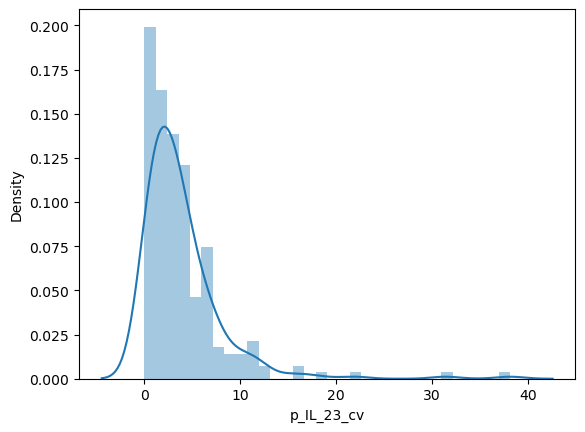

In [34]:
sns.distplot(bloodbiomk2['p_IL_23_cv'])

In [27]:
y_pred_series.head()

0    11.56
1    12.86
2    12.16
3    12.15
4    13.40
dtype: float64

In [54]:
# Determine and store the correlation between biomk2 features and briefa various variables
all_correlations = {} 
save_path = r'Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers'


for column in briefa.columns:
    combined_df = pd.concat([bloodbiomk2, briefa[column]], axis=1)
    
    correlation = combined_df.corr().iloc[:, -1]  

    sorted_correlation = correlation.sort_values(ascending=False)  
    
    all_correlations[column] = sorted_correlation

    print(f"Correlation with {column}:")
    print(sorted_correlation)
    print("\n")
    
        
    correlation_df = pd.DataFrame(all_correlations)

    file_path = os.path.join(save_path, 'bloodbiomk2_briefa_correlations.csv')

    correlation_df.to_csv(file_path, index=True)


Correlation with mi:
mi             1.000000
p_CRP          0.113986
p_Eotaxin_3    0.096829
p_SAA          0.095902
p_MDC_cv       0.089375
                 ...   
p_VCAM_1_cv   -0.115340
p_IL_1RA_cv   -0.124792
p_ICAM_1_cv   -0.127917
p_IL_17A_F    -0.130003
category      -0.363527
Name: mi, Length: 120, dtype: float64


Correlation with tmi:
tmi            1.000000
p_Eotaxin_3    0.120208
p_CRP          0.113742
p_SAA          0.095974
p_bFGF         0.087467
                 ...   
p_IL_7_cv     -0.122861
p_IL_1RA_cv   -0.124019
p_ICAM_1_cv   -0.128334
p_IL_17A_F    -0.132631
category      -0.374768
Name: tmi, Length: 120, dtype: float64


Correlation with gec:
gec               1.000000
p_CRP             0.117487
p_SAA             0.115100
p_MDC_cv          0.084289
p_Eotaxin_3       0.082195
                    ...   
p_VCAM_1_cv      -0.125770
p_INF_gamma_cv   -0.127086
p_IL_8_2         -0.131025
p_IL_1RA_cv      -0.137118
category         -0.377238
Name: gec, Length: 120, dtype

C:\Users\fargor\AppData\Local\Temp\ipykernel_23800\1443176650.py:20: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  correlation_df = pd.DataFrame(all_correlations)


ValueError: cannot reindex on an axis with duplicate labels

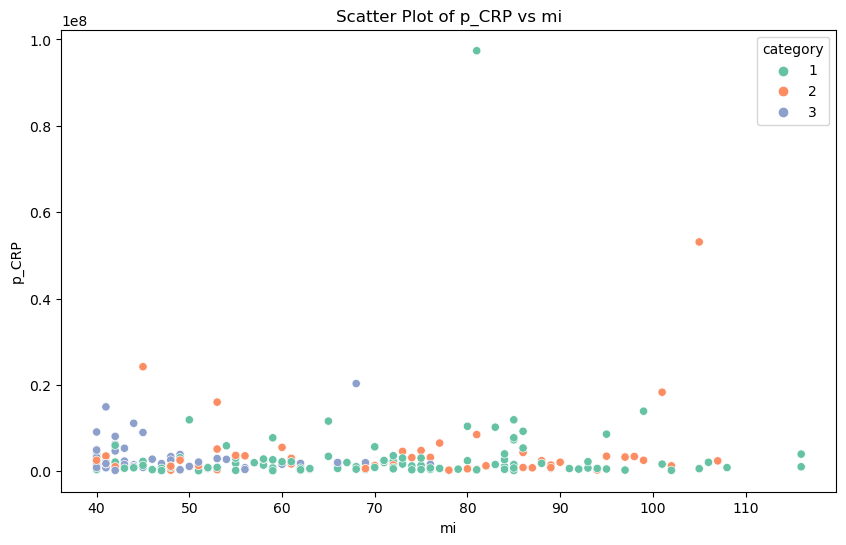

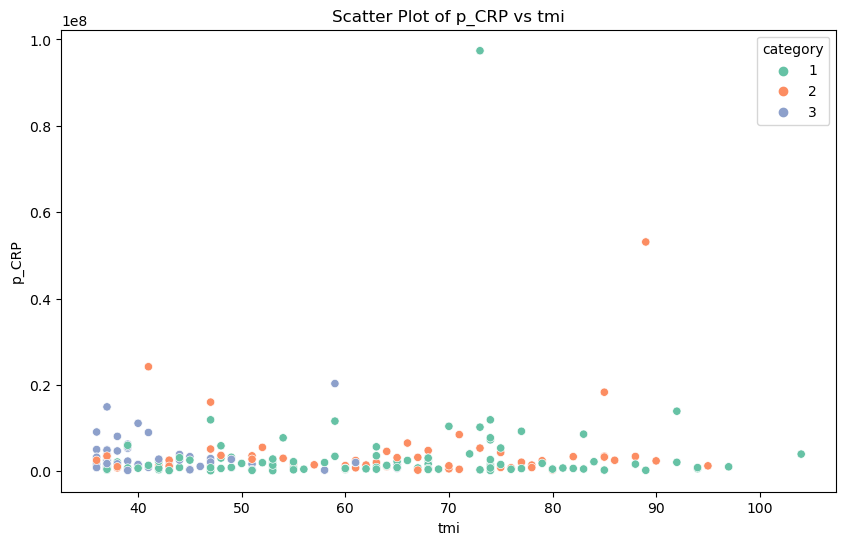

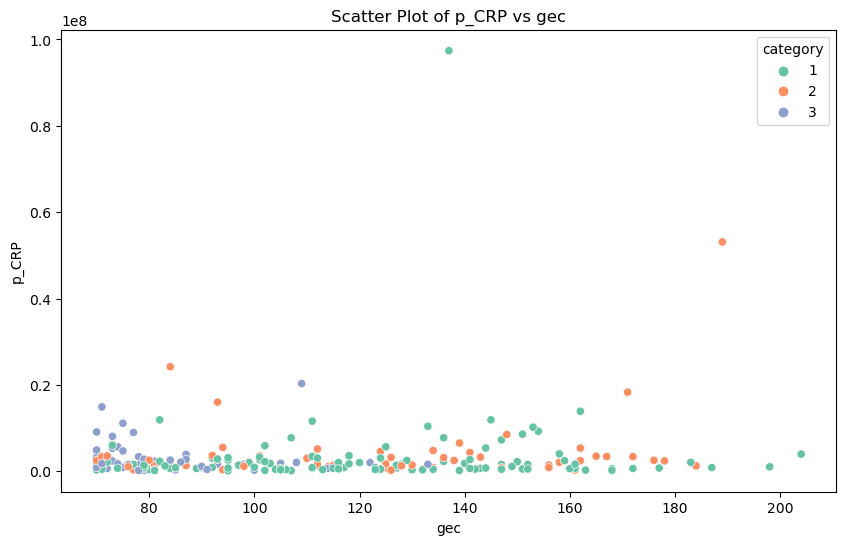

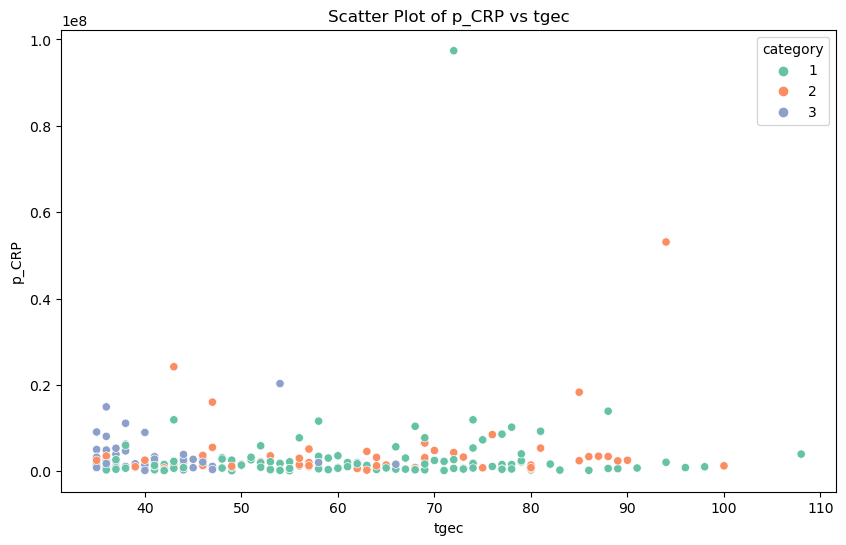

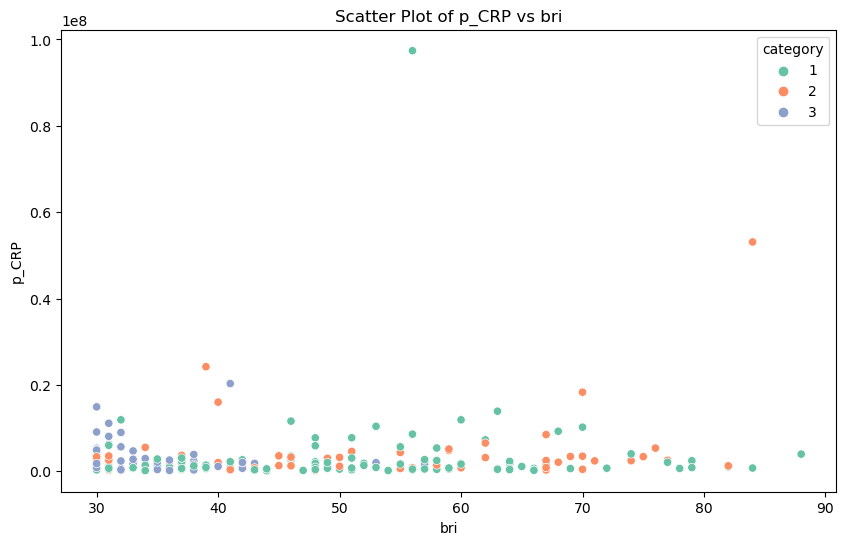

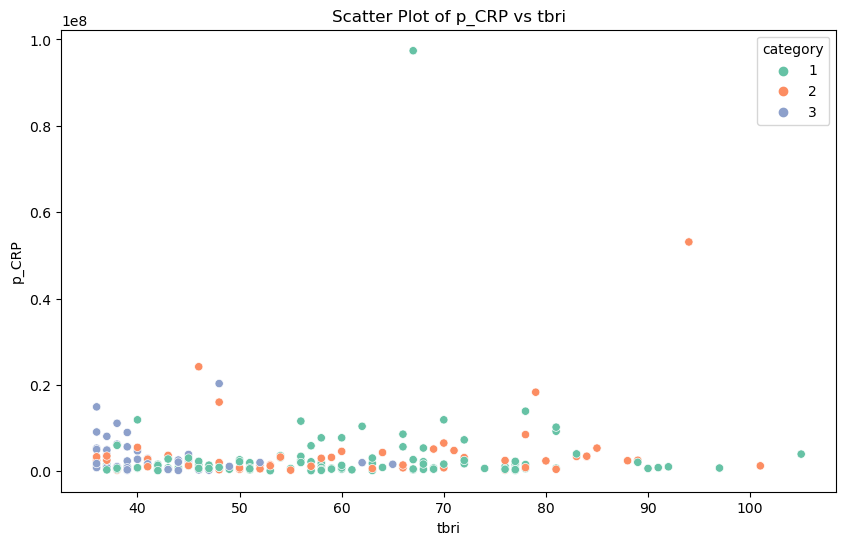

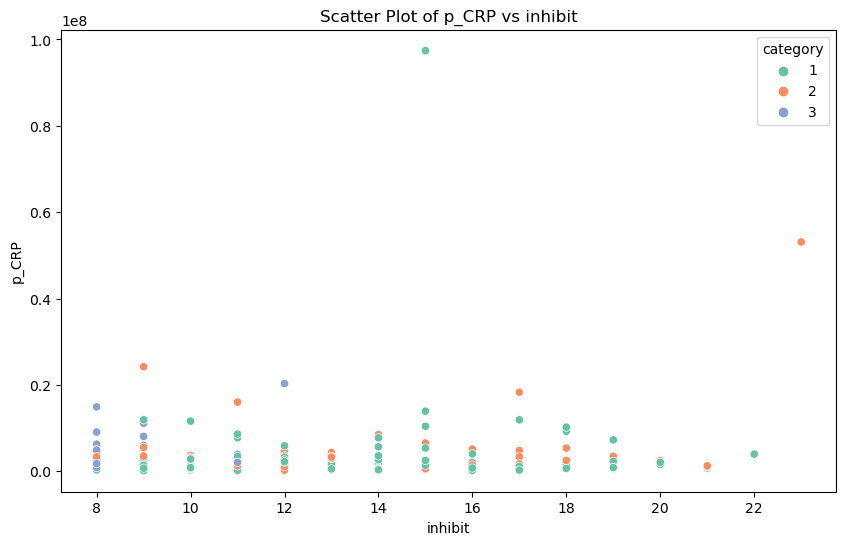

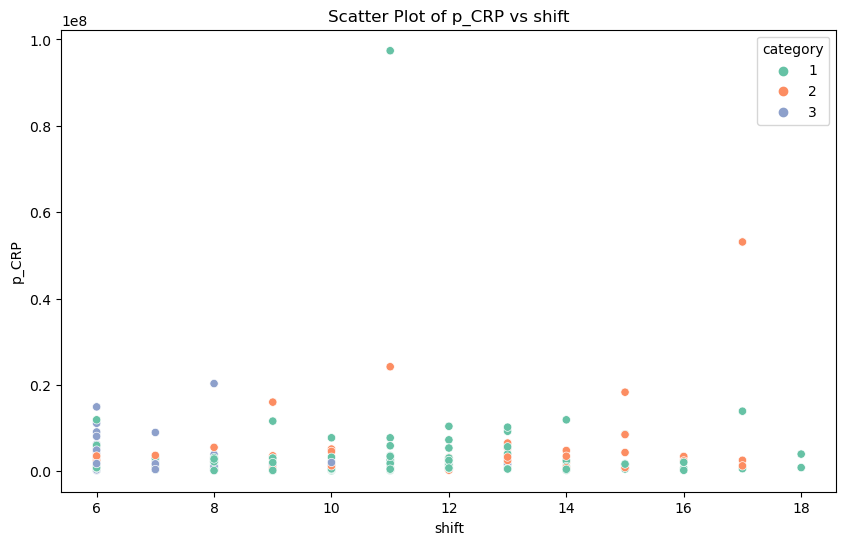

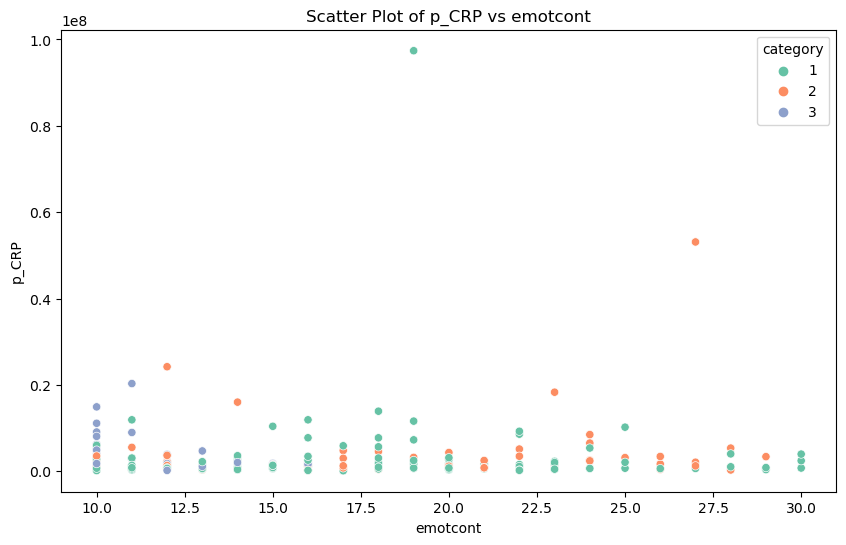

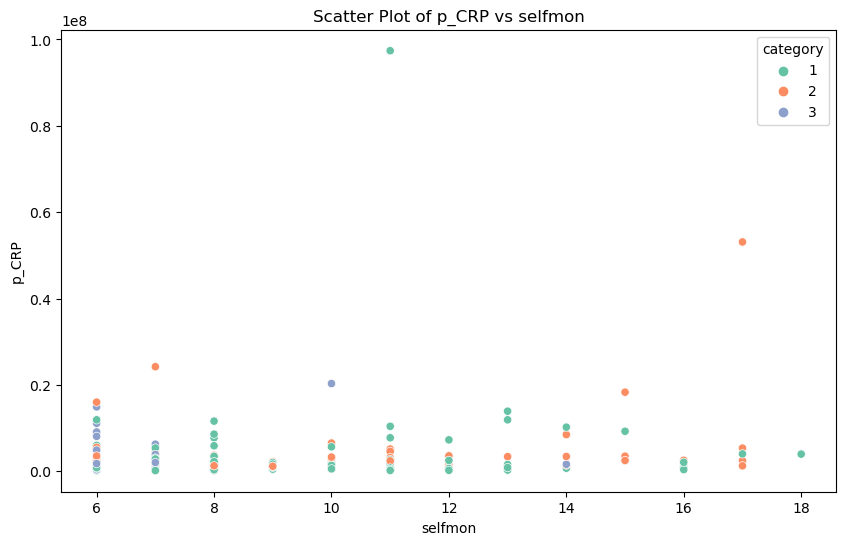

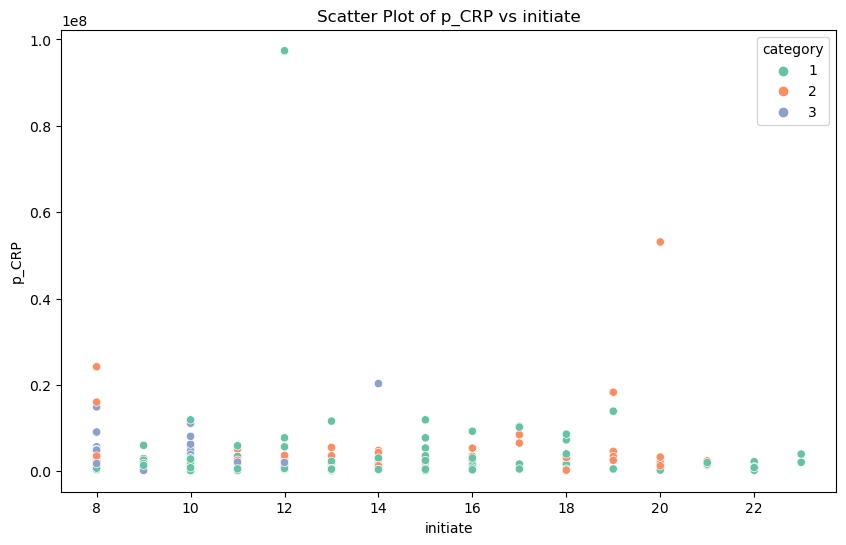

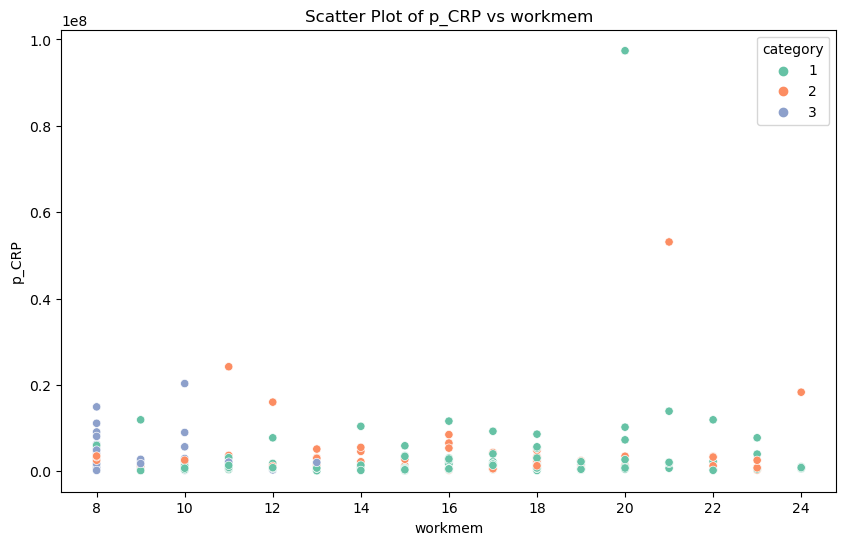

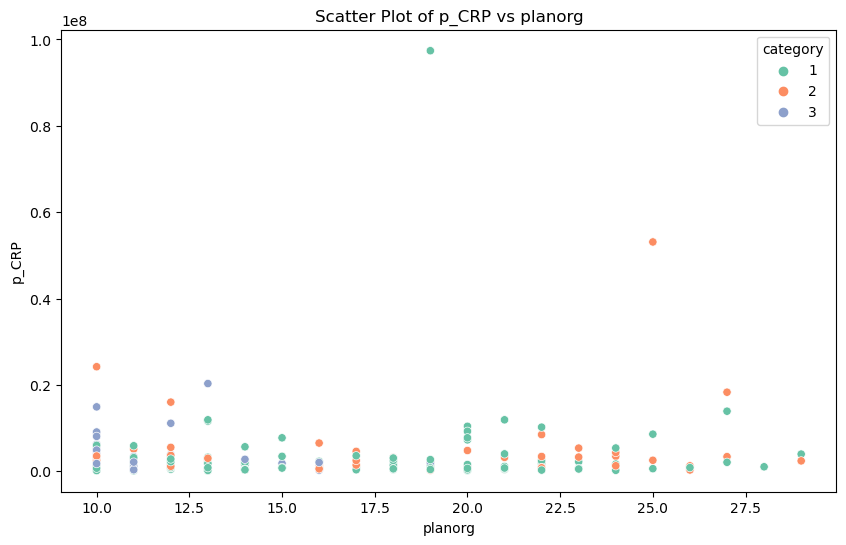

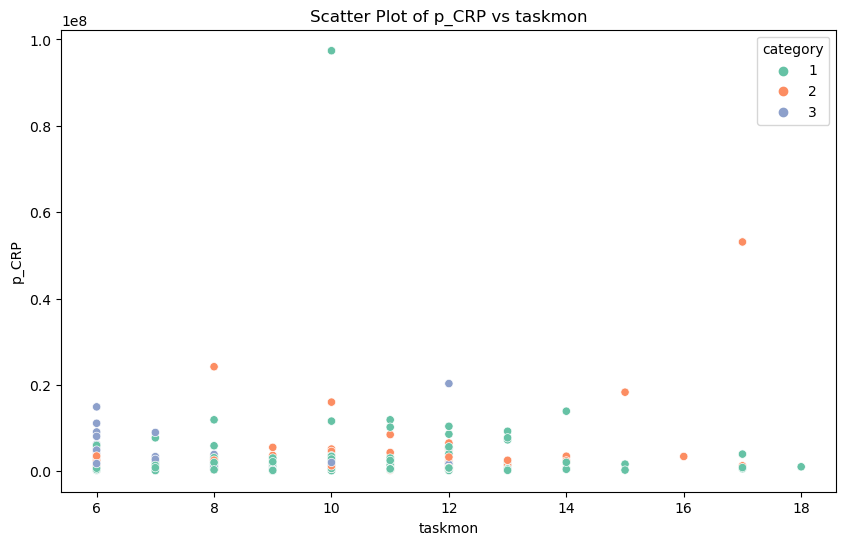

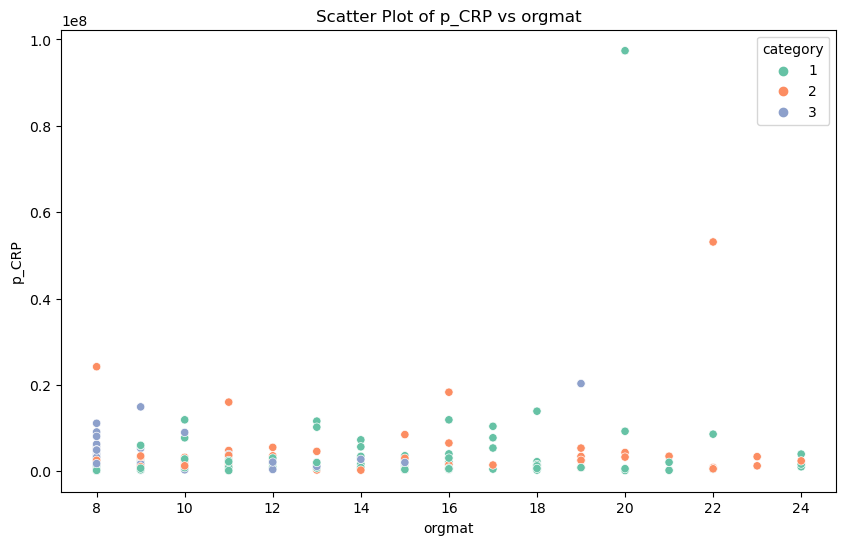

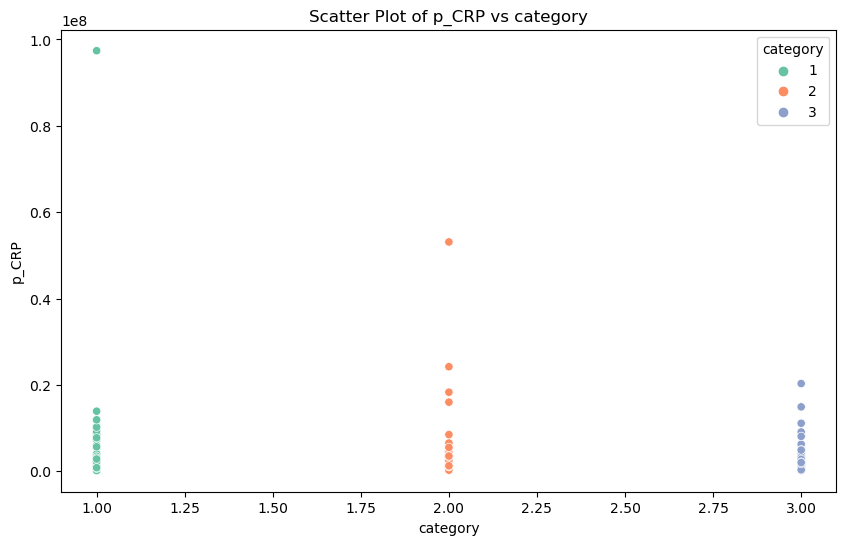

In [82]:
# Plot the scatterplot for various variables
doc = Document()
doc.add_heading('BloodBiomark2 and Briefa Scatterplot', level=1)

selected_feature = 'p_CRP'  # This came from briefa (y to be predicted)

# Loop through each column from briefa in combined_df to create scatter plots
for column in briefa.columns:  # Ensure this iterates over briefa columns only
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=column, 
        y=selected_feature, 
        hue='category',  # This assumes 'category' is appropriately set in combined_df
        data=combined_df,
        palette='Set2',  # Adjust the color palette as needed
        legend='full'
    )
    plt.title(f'Scatter Plot of {selected_feature} vs {column}')
    plt.xlabel(column)
    plt.ylabel(selected_feature)
    plt.show()
    
    

    doc.add_picture('temp_plot.png', width=Inches(5.5))
    doc.add_paragraph(f'Boxplot of {feature} by category')

doc.save('bloodbiomk2_briefa_scatterplot.docx')

  #  sns.scatterplot(x='mi',y='p_CRP',data=combined_df)  

In [78]:
combined_df.head()

p_CRP   mi  tmi  gec  tgec  bri  tbri  inhibit  shift  emotcont  \
0   1060000.0   75   64  114    57   39    46       12      9        11   
1  18300000.0  101   85  171    85   70    79       17     15        23   
2   2080000.0   90   77  158    79   68    77       15     14        27   
3   1560000.0   43   40   81    42   38    46        9      8        15   
4   2340000.0   43   39   81    41   38    45        9     11        12   

   selfmon  initiate  workmem  planorg  taskmon  orgmat  category  
0        7        14       17       20       13      11         2  
1       15        19       24       27       15      16         2  
2       12        20       22       22       14      12         2  
3        6         9        8       11        7       8         1  
4        6        10        8       10        7       8         3

In [71]:
briefa.head()

mi  tmi  gec  tgec  bri  tbri  inhibit  shift  emotcont  selfmon  \
0   75   64  114    57   39    46       12      9        11        7   
1  101   85  171    85   70    79       17     15        23       15   
2   90   77  158    79   68    77       15     14        27       12   
3   43   40   81    42   38    46        9      8        15        6   
4   43   39   81    41   38    45        9     11        12        6   

   initiate  workmem  planorg  taskmon  orgmat  category  
0        14       17       20       13      11         2  
1        19       24       27       15      16         2  
2        20       22       22       14      12         2  
3         9        8       11        7       8         1  
4        10        8       10        7       8         3

In [72]:
bloodbiomk2.head()

Qalb     s_alb  p_IL_17A_F_cv  p_IL_17A_F  p_IL_17B_cv  p_IL_17B  \
0  7.852013  3.912500           5.43       2.190         1.63      1.18   
1  6.994813  3.556088           6.84       3.460         4.52      2.30   
2  6.994813  3.556088           2.49       0.126         2.63      2.30   
3  7.867197  3.414635           1.05       8.280         5.71      2.95   
4  7.429948  3.378848          18.90       1.180         2.58      1.16   

   p_IL_17C_cv  p_IL_17C  p_IL_17D_cv  p_IL_17D  ...  p_IL_7  p_TNF_beta_cv  \
0         7.39      1.59        14.40     28.40  ...    3.06          6.040   
1         3.30      2.23         8.79     34.30  ...   12.30          0.331   
2         7.44     17.50        27.00      9.01  ...    1.87         15.400   
3         9.27      1.94         6.47     35.30  ...    9.81          1.860   
4         3.81      6.84        26.20     26.10  ...    8.12          0.306   

   p_TNF_beta  p_VEGF_A_cv  p_VEGF_A  p_asyn_cv    p_asyn       p_Hb  \
0      0.1210        0.943      16.6       0.51  178000.0   37538.80   
1      0.2850        2.640      55.8      12.60  170000.0   26355.70   
2      0.8180        5.680      25.3       0.14   79500.0  148871.00   
3      0.0472        0.192      62.5       5.33  117000.0   20893.80   
4      0.1560        5.370      99.2       4.54  101000.0    8102.65   

   dxcte_asyn_p_flag_dv  category  
0                   0.0         2  
1                   0.0         2  
2                   0.0         2  
3                   0.0         1  
4                   0.0         3  

[5 rows x 119 columns]

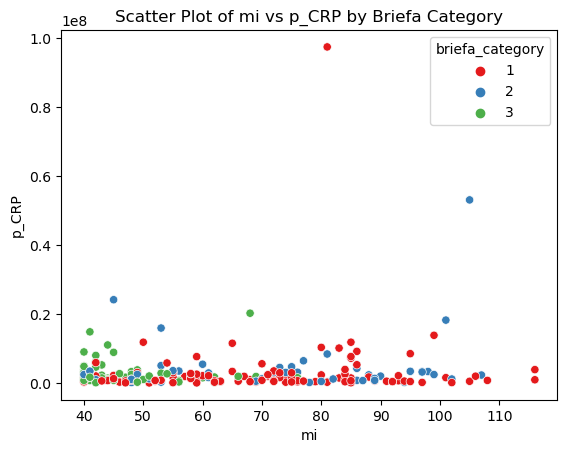

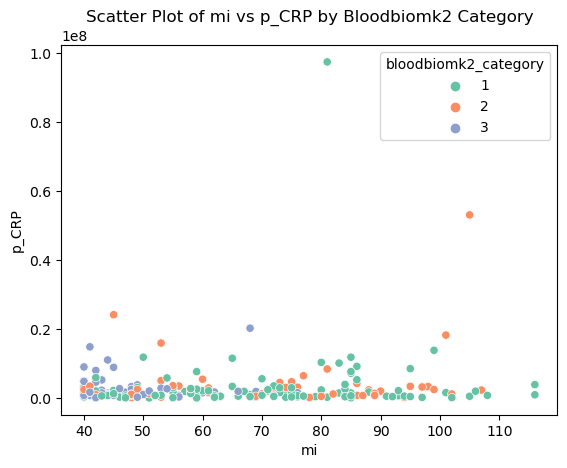

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming loading of bloodbiomk2 and briefa happens here

# Example feature and target selections
y_column = 'mi'  # Column from briefa for x-axis
x_feature = 'p_CRP'  # Feature from bloodbiomk2 for y-axis

# Extract category columns (assuming the last columns are categorical)
briefa_category = briefa.iloc[:, -1]  # Last column of briefa
bloodbiomk2_category = bloodbiomk2.iloc[:, -1]  # Last column of bloodbiomk2

# Combine the data
combined_df = pd.concat([
    briefa[[y_column, briefa.columns[-1]]],  # Include the y value and category from briefa
    bloodbiomk2[[x_feature, bloodbiomk2.columns[-1]]]  # Include the feature and category from bloodbiomk2
], axis=1)

# Rename category columns if they are the same
combined_df.columns = [y_column, 'briefa_category', x_feature, 'bloodbiomk2_category']

# Drop missing values (if any)
combined_df.dropna(inplace=True)

# Create the scatter plot for briefa categories
sns.scatterplot(x=y_column, y=x_feature, hue='briefa_category', data=combined_df, palette='Set1')
plt.title(f'Scatter Plot of {y_column} vs {x_feature} by Briefa Category')
plt.xlabel(y_column)
plt.ylabel(x_feature)
plt.show()

# Create the scatter plot for bloodbiomk2 categories
sns.scatterplot(x=y_column, y=x_feature, hue='bloodbiomk2_category', data=combined_df, palette='Set2')
plt.title(f'Scatter Plot of {y_column} vs {x_feature} by Bloodbiomk2 Category')
plt.xlabel(y_column)
plt.ylabel(x_feature)
plt.show()


In [59]:
briefa.head()

mi  tmi  gec  tgec  bri  tbri  inhibit  shift  emotcont  selfmon  \
0   75   64  114    57   39    46       12      9        11        7   
1  101   85  171    85   70    79       17     15        23       15   
2   90   77  158    79   68    77       15     14        27       12   
3   43   40   81    42   38    46        9      8        15        6   
4   43   39   81    41   38    45        9     11        12        6   

   initiate  workmem  planorg  taskmon  orgmat  category  
0        14       17       20       13      11         2  
1        19       24       27       15      16         2  
2        20       22       22       14      12         2  
3         9        8       11        7       8         1  
4        10        8       10        7       8         3

In [29]:
# # Create a DataFrame to store predictions
# predicted_values = pd.DataFrame(index=briefa.index)

# for column, model in models.items():
#     predicted_values[column] = model.predict(X_scaled)

# print(predicted_values.head())


In [30]:
# sns.distplot(briefa['mi'])

In [31]:
# # Create a list of column names (labels) in the briefa DataFrame
# labels = briefa.columns

# num_labels = len(labels)
# num_cols = 3  
# num_rows = (num_labels + num_cols - 1) // num_cols  # Compute number of rows needed

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)

# axes = axes.flatten()

# for i, label in enumerate(labels):
#     sns.histplot(briefa[label], ax=axes[i], kde=True)  # Using histplot with KDE for a distribution plot
#     axes[i].set_title(label)
#     axes[i].set_xlabel('')
#     axes[i].set_ylabel('')

# # Hide any unused subplots
# for j in range(num_labels, len(axes)):
#     axes[j].axis('off')

# plt.show()

In [33]:
# # cAlling categories, so we can plot the labels based on the categories (NFL, College players, Healthy Control)
# categories_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\categories.csv"
# categories_df = pd.read_csv(categories_file_path)
# new_column = categories_df['checkin_bin']
# briefa['category'] = new_column
# print(briefa.head())

In [34]:
# sns.histplot(data=briefa, x='mi', hue='category', multiple='stack', palette='Set1')
# plt.legend(title='Category', labels=['1-N', '2-CP', '3-HC'])
# plt.show()

In [35]:
# # Create a list of column names (labels) in the briefa DataFrame
# labels = briefa.columns

# num_labels = len(labels)
# num_cols = 3  
# num_rows = (num_labels + num_cols - 1) // num_cols  # Compute number of rows needed

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)

# axes = axes.flatten()

# for i, label in enumerate(labels):
#     sns.histplot(briefa[label], ax=axes[i], kde=True)  # Using histplot with KDE for a distribution plot
#     axes[i].set_title(label)
#     axes[i].set_xlabel('')
#     axes[i].set_ylabel('')

# # Hide any unused subplots
# for j in range(num_labels, len(axes)):
#     axes[j].axis('off')

# plt.show()

In [37]:
## Plotting the distribution of one of the labels in Y based on various categories
# category_col = 'category'

# for column in briefa.columns:
#     if column != category_col:
#         plt.figure(figsize=(10, 6))
#         sns.histplot(data=briefa, x=column, hue=category_col, palette='Set1', multiple='stack', bins=30)
#         plt.legend(title=category_col, labels=['1-NFL', '2-CP', '3-HC'])
#         plt.title(f'Distribution of {column} by {category_col}')
#         plt.xlabel(column)
#         plt.ylabel('Frequency')
#         plt.show()  
#         plt.savefig()
        


In [36]:
## Plot the previous thing for every single label that we want to predict 
# columns_to_plot = briefa.columns

# num_columns = 3
# num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns  # Calculate number of rows

# fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
# axes = axes.flatten() 

# for i, column in enumerate(columns_to_plot):
#     sns.histplot(data=briefa, x=column, hue='category', palette={1: 'blue', 2: 'green', 3: 'red'},
#                  multiple='stack', ax=axes[i])
#     axes[i].set_title(column)

# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()
